# *PROJEKT KOŃCOWY*

## 1. WCZYTANIE I OBRÓBKA DANYCH

### IMPORT BIBLIOTEK

In [257]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from scipy import stats
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn import datasets
from sklearn import metrics
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib as mpl
from cycler import cycler

### ŁADOWNIE ZBIORU

In [2]:
df = pd.read_csv("Loan_data.csv")
df

C:\Users\michn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,NaN,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42532,72998,NaN,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42533,72176,NaN,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623,NaN,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### OBRÓBKA DANYCH

In [3]:
#sprawdzenie czy kolumna id nie ma duplikatów, jeśli nie to można ją spokojnie usunąć
df[df['id'].duplicated()].id

Series([], Name: id, dtype: object)

In [4]:
df1=df.drop(['id'],axis=1)

In [5]:
#Usunięcie kolumn, pustych oraz z dużą ilością brakujących danych
df1=df.dropna(axis=1, how='all',thresh=10000)
df1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,NaN,...,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N
42532,72998,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,Halping hands company inc.,...,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N
42533,72176,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,NaN,...,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N
42534,71623,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,NaN,...,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N


In [6]:
#usunięcie kolumn z opisowych, które nie przydadzą się w tym badaniu
df1.drop(['emp_title','url','desc','verification_status','purpose','title','zip_code','addr_state'],axis=1,inplace=True)

C:\Users\michn\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
#sprawdzenie, czy występują jeszcze kolumny, w których jest dużo brakujących danych
df1.isna().sum()

id                                0
loan_amnt                         1
funded_amnt                       1
funded_amnt_inv                   1
term                              1
int_rate                          1
installment                       1
grade                             1
sub_grade                         1
emp_length                     1113
home_ownership                    1
annual_inc                        5
issue_d                           1
loan_status                       1
pymnt_plan                        1
dti                               1
delinq_2yrs                      30
earliest_cr_line                 30
fico_range_low                    1
fico_range_high                   1
inq_last_6mths                   30
mths_since_last_delinq        26927
open_acc                         30
pub_rec                          30
revol_bal                         1
revol_util                       91
total_acc                        30
initial_list_status         

In [8]:
#Usuwam kolejną kolumnę, w której mam duża ilość brakujących danych
df1.drop(['mths_since_last_delinq'],axis=1,inplace=True)

<AxesSubplot:>

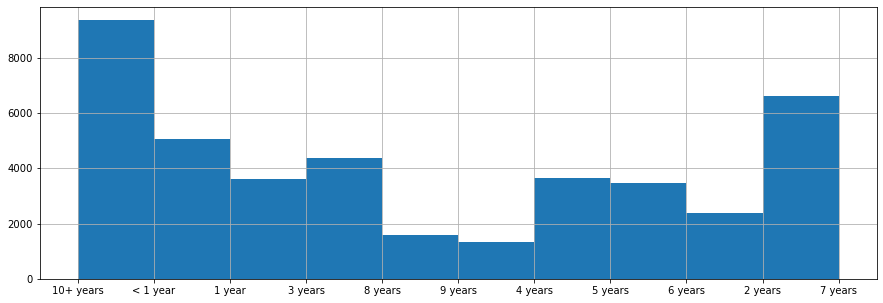

In [9]:
#Sprawdzenie rozładu długości zatrudnienia. Dane są mocno zróżnicowane, więc brakujące uzupełnię średnią.
df1.emp_length.hist(figsize=(15,5))

In [10]:
#Usuwam litery i znaki z wartości w kolumnie

In [11]:
df1['emp_length']=df1['emp_length'].replace('years','',regex=True)

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/964475976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emp_length']=df1['emp_length'].replace('years','',regex=True)


In [12]:
df1['emp_length']=df1['emp_length'].replace('year','',regex=True)

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/1202416703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emp_length']=df1['emp_length'].replace('year','',regex=True)


In [13]:
df1['emp_length']=df1['emp_length'].replace('10+',10,regex=True)

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/2858167977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emp_length']=df1['emp_length'].replace('10+',10,regex=True)


In [14]:
df1['emp_length']=pd.to_numeric(df1['emp_length'].replace('< 1','0.5',regex=True))

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/3679033933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emp_length']=pd.to_numeric(df1['emp_length'].replace('< 1','0.5',regex=True))


In [15]:
df1['emp_length'].mean()

4.984187528667649

In [16]:
#Uzupełniam brakujące dane średnią w wartości całkowitej
df1['emp_length'].fillna(round(df1['emp_length'].mean(),0),inplace=True)
df1

C:\Users\michn\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10.0,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,0.5,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10.0,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10.0,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1.0,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,0.5,...,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N
42532,72998,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,0.5,...,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N
42533,72176,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,0.5,...,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N
42534,71623,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,0.5,...,1.0,Individual,NaN,NaN,NaN,NaN,NaN,N,Cash,N


In [17]:
#sprawdzam, jakich danych jeszcze brakuje
df1.isna().sum()

id                               0
loan_amnt                        1
funded_amnt                      1
funded_amnt_inv                  1
term                             1
int_rate                         1
installment                      1
grade                            1
sub_grade                        1
emp_length                       0
home_ownership                   1
annual_inc                       5
issue_d                          1
loan_status                      1
pymnt_plan                       1
dti                              1
delinq_2yrs                     30
earliest_cr_line                30
fico_range_low                   1
fico_range_high                  1
inq_last_6mths                  30
open_acc                        30
pub_rec                         30
revol_bal                        1
revol_util                      91
total_acc                       30
initial_list_status              1
out_prncp                        1
out_prncp_inv       

<AxesSubplot:>

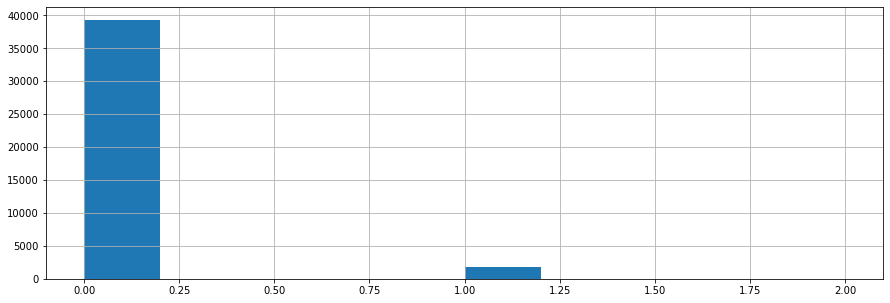

In [18]:
#Duża ilość brakujących danych występuje także w kolumnie pub_rec_bankruptcies. Dlatego jej też się przyjrzę bliżej
df1.pub_rec_bankruptcies.hist(figsize=(15,5))

In [19]:
#Zdecydowana przewaga '0', także brakujące dane uzupełnię jako '0'
df1.pub_rec_bankruptcies.fillna(0,inplace=True)

C:\Users\michn\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
#Usuwam wiersze z brakującymi danymi
df1.dropna(axis=0,how='any',inplace=True)

C:\Users\michn\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
#Sprawdzam, czy jeszcze występują jakieś brakujące dane
df1.isna().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
issue_d                       0
loan_status                   0
pymnt_plan                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

In [22]:
#sprawdzam, czy są kolumny z unikalnymi wartościami. Takie kolummny nie będą miały wartości przy badanich
df1.nunique()

id                            42251
loan_amnt                       898
funded_amnt                    1051
funded_amnt_inv                9234
term                              2
int_rate                        394
installment                   16340
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5574
issue_d                          53
loan_status                       4
pymnt_plan                        1
dti                            2894
delinq_2yrs                      11
earliest_cr_line                530
fico_range_low                   44
fico_range_high                  44
inq_last_6mths                   28
open_acc                         44
pub_rec                           6
revol_bal                     22666
revol_util                     1118
total_acc                        83
initial_list_status               1
out_prncp                   

In [23]:
#Usuwam kolumny z jedną unikalną wartością
df1.drop(['id','pymnt_plan','initial_list_status','out_prncp','out_prncp_inv','collections_12_mths_ex_med','policy_code','application_type',
         'chargeoff_within_12_mths','delinq_amnt','tax_liens','hardship_flag','disbursement_method'],axis=1,inplace=True)

C:\Users\michn\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
#usuwam kolumny 'last', ponieważ dane w nich zawarte pochodzą z okresu przyszłego w stosunku do momentu udzielenia pożyczki
df1.drop(df1.columns[df1.columns.str.startswith('last')],axis=1,inplace=True)

In [25]:
#to samo robię z kolumnami 'total'
df1.drop(df1.columns[df1.columns.str.startswith('tot')],axis=1,inplace=True)

In [26]:
#zostały jeszcze dwie kolumny z danymi z przyszłości, więc też je usuwam
df1.drop(['inq_last_6mths','open_acc','recoveries','delinq_2yrs'],axis=1,inplace=True)

In [27]:
df1.shape

(42251, 24)

In [28]:
#Sprawdzam typy kolumn
df1.dtypes

loan_amnt                  float64
funded_amnt                float64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
issue_d                     object
loan_status                 object
dti                        float64
earliest_cr_line            object
fico_range_low             float64
fico_range_high            float64
pub_rec                    float64
revol_bal                  float64
revol_util                  object
collection_recovery_fee    float64
acc_now_delinq             float64
pub_rec_bankruptcies       float64
debt_settlement_flag        object
dtype: object

In [29]:
#sprawdzam status pożyczek, usuwam komentarze i zmieniam na wartości liczbowe, 
df.loan_status.value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [30]:
df1['loan_status']=df['loan_status'].replace('Does not meet the credit policy. Status:','',regex=True)

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/3569767603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan_status']=df['loan_status'].replace('Does not meet the credit policy. Status:','',regex=True)


In [31]:
df1['loan_status'].value_counts()

Fully Paid     35945
Charged Off     6306
Name: loan_status, dtype: int64

In [32]:
df1['loan_status'] = df1['loan_status'].map({('Fully Paid'): 1, 
                                             ('Charged Off'): 0})

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/2843689336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan_status'] = df1['loan_status'].map({('Fully Paid'): 1,


In [33]:
#usuwam zbędne znaki
df1['int_rate']=df1['int_rate'].replace('%','',regex=True).astype('float64')

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/3952023019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['int_rate']=df1['int_rate'].replace('%','',regex=True).astype('float64')


In [34]:
df1['revol_util']=df1['revol_util'].replace('%','',regex=True).astype('float64')

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/159577221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['revol_util']=df1['revol_util'].replace('%','',regex=True).astype('float64')


In [35]:
df1['term']=df1['term'].replace('months','',regex=True).astype('int64')

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/3947202024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['term']=df1['term'].replace('months','',regex=True).astype('int64')


In [36]:
df1.shape

(42251, 24)

### Po wstępnej obróbce danych zostało mi 42251 wierszy i 24 kolumny

# 2. EDA, EKSPLORACJA DANYCH

## Przyjrzenie się danym

In [37]:
df1.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,fico_range_low,fico_range_high,pub_rec,revol_bal,revol_util,collection_recovery_fee,acc_now_delinq,pub_rec_bankruptcies
count,42251.000000,42251.000000,42251.000000,42251.000000,42251.000000,42251.000000,42251.000000,4.225100e+04,42251.000000,42251.000000,42251.000000,42251.000000,42251.000000,4.225100e+04,42251.000000,42251.000000,42251.000000,42251.000000
mean,11120.590045,10851.716527,10185.196901,42.237012,12.160914,323.407209,4.995988,6.918219e+04,0.850749,13.394109,713.128802,717.128802,0.058010,1.432112e+04,49.130853,14.281819,0.000047,0.043762
std,7410.841984,7146.667871,7124.103632,10.525711,3.709402,208.905394,3.440617,6.410029e+04,0.356340,6.721829,36.137120,36.137120,0.245519,2.193920e+04,28.359019,162.072549,0.006880,0.205492
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.670000,0.500000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,5150.000000,4975.000000,36.000000,9.620000,166.010000,2.000000,4.000000e+04,1.000000,8.220000,685.000000,689.000000,0.000000,3.681000e+03,25.720000,0.000000,0.000000,0.000000
50%,9800.000000,9600.000000,8522.290608,36.000000,11.990000,278.530000,4.000000,5.900000e+04,1.000000,13.490000,710.000000,714.000000,0.000000,8.864000e+03,49.700000,0.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14050.000000,60.000000,14.720000,429.450000,9.000000,8.250000e+04,1.000000,18.700000,740.000000,744.000000,0.000000,1.728900e+04,72.700000,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,1.000000,29.990000,825.000000,829.000000,5.000000,1.207359e+06,119.000000,7002.190000,1.000000,2.000000


In [38]:
cor=df1.corr()
cor

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,fico_range_low,fico_range_high,pub_rec,revol_bal,revol_util,collection_recovery_fee,acc_now_delinq,pub_rec_bankruptcies
loan_amnt,1.000000,0.981724,0.930672,0.354961,0.293772,0.930590,0.154462,0.276019,-0.044614,0.063572,0.132581,0.132581,-0.051518,0.254330,0.065445,0.073261,-0.007771,-0.035512
funded_amnt,0.981724,1.000000,0.948575,0.334277,0.296653,0.956331,0.153978,0.272307,-0.041705,0.063246,0.124794,0.124794,-0.052451,0.250706,0.069065,0.075408,-0.007800,-0.036870
funded_amnt_inv,0.930672,0.948575,1.000000,0.362548,0.282048,0.891215,0.168315,0.253301,-0.012873,0.068485,0.143463,0.143463,-0.055306,0.213392,0.069885,0.056467,-0.008859,-0.037718
term,0.354961,0.334277,0.362548,1.000000,0.429829,0.096099,0.114261,0.043742,-0.135733,0.075828,-0.000947,-0.000947,0.005285,0.029543,0.064728,0.032585,-0.004077,0.015098
int_rate,0.293772,0.296653,0.282048,0.429829,1.000000,0.272599,-0.000299,0.055788,-0.198950,0.119554,-0.703241,-0.703241,0.100458,0.083079,0.456997,0.072453,-0.002320,0.084739
installment,0.930590,0.956331,0.891215,0.096099,0.272599,1.000000,0.124795,0.278489,-0.022562,0.053577,0.063380,0.063380,-0.045676,0.265190,0.094788,0.076594,-0.007678,-0.032768
emp_length,0.154462,0.153978,0.168315,0.114261,-0.000299,0.124795,1.000000,0.114759,-0.013790,0.055770,0.088379,0.088379,0.058583,0.124667,0.012826,0.007611,0.005007,0.060607
annual_inc,0.276019,0.272307,0.253301,0.043742,0.055788,0.278489,0.114759,1.000000,0.037002,-0.116358,0.050427,0.050427,-0.016205,0.281113,0.022497,0.017835,-0.002753,-0.014581
loan_status,-0.044614,-0.041705,-0.012873,-0.135733,-0.198950,-0.022562,-0.013790,0.037002,1.000000,-0.043337,0.140133,0.140133,-0.053346,-0.018443,-0.095484,-0.210388,0.002882,-0.050436
dti,0.063572,0.063246,0.068485,0.075828,0.119554,0.053577,0.055770,-0.116358,-0.043337,1.000000,-0.192034,-0.192034,-0.003084,0.192171,0.279147,0.008775,-0.012446,0.009419


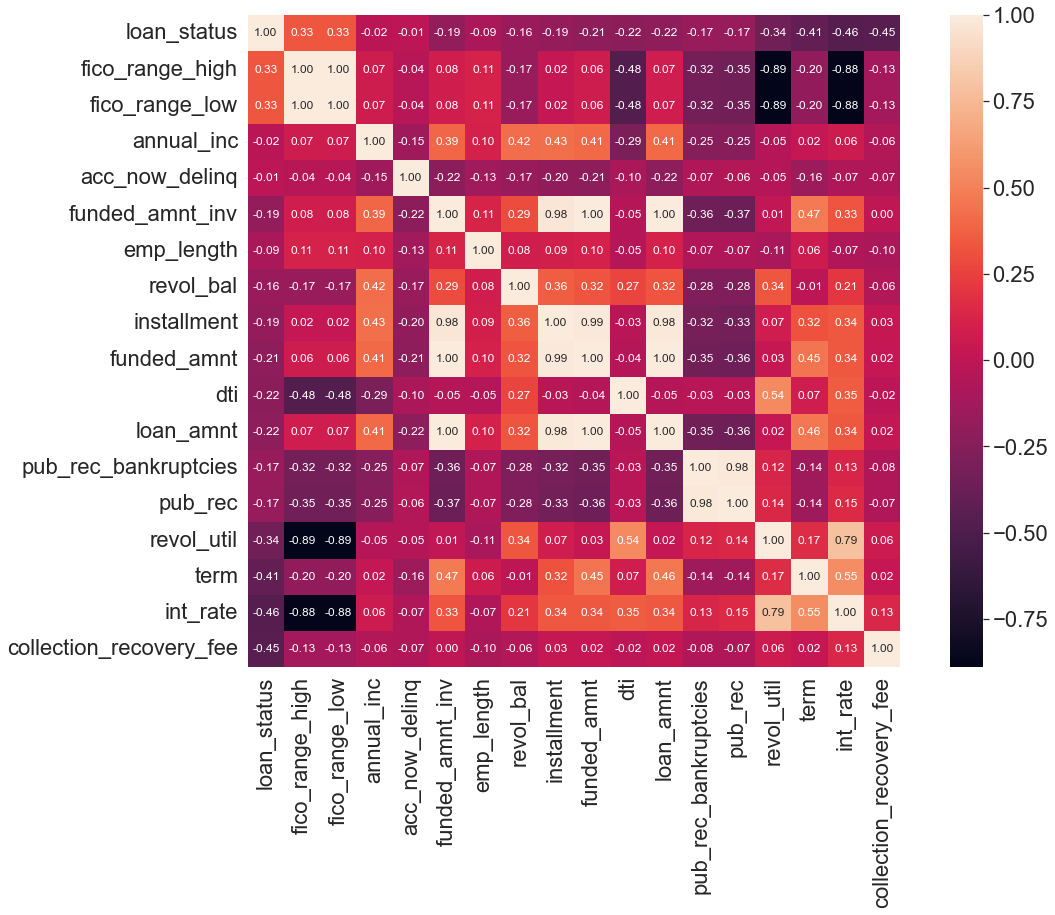

In [39]:
k = 29
corrmat = df1.corr()
cols = corrmat.nlargest(k, 'loan_status')['loan_status'].index
cm = np.corrcoef(corrmat[cols].values.T)
sns.set(font_scale=2)
fig = plt.gcf() 
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 3) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values,)

#### Najbardziej dodatnio skorelowane są zmienne fico, a ujemnie powiązane z recovery

In [40]:
#usuwam kolumny, które są skorelowane ze sobą (poza loan_status), powielają one dane
df1.drop(['fico_range_low','funded_amnt_inv','collection_recovery_fee','pub_rec_bankruptcies','funded_amnt_inv','installment'],axis=1,inplace=True)

C:\Users\michn\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
df1.shape

(42251, 19)

## 2.1 Przyjrzymy się teraz danym z kolumny fico_range_high i sprawdzimy, czy występuje zależność między tymi danymi a spłatą pożyczki

### Sprawdzam rozkład danych w tej kolumnie

In [42]:
print('Range of values: ', df1['fico_range_high'].max()-df1['fico_range_high'].min())

Range of values:  215.0


In [43]:
print('Minimum: ', df1['fico_range_high'].min())
print('Maximum: ',df1['fico_range_high'].max())
print('Mean value: ', df1['fico_range_high'].mean())
print('Median value: ',df1['fico_range_high'].median())
print('Standard deviation: ', df1['fico_range_high'].std())

Minimum:  614.0
Maximum:  829.0
Mean value:  717.1288016851672
Median value:  714.0
Standard deviation:  36.13711988249547


In [44]:
Q1=df1['fico_range_high'].quantile(q=0.25)
Q3=df1['fico_range_high'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df1['fico_range_high']))

1st Quartile (Q1) is:  689.0
3st Quartile (Q3) is:  744.0
Interquartile range (IQR) is  55.0


In [45]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fico_range_high: ', L_outliers)
print('Upper outliers in fico_range_high: ', U_outliers)

Lower outliers in fico_range_high:  606.5
Upper outliers in fico_range_high:  826.5


C:\Users\michn\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


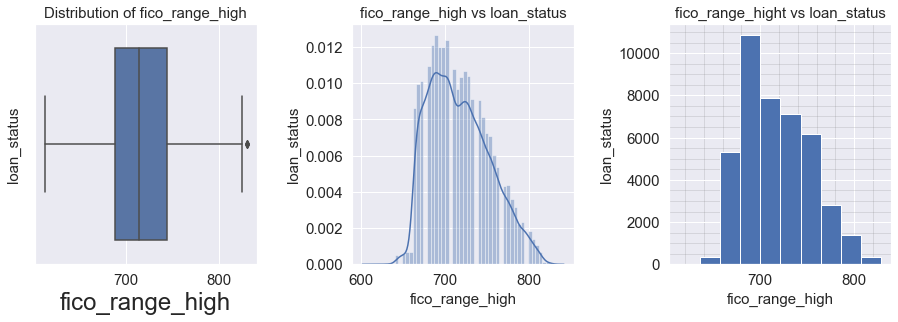

In [46]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fico_range_high',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('loan_status', fontsize=15)
ax1.set_title('Distribution of fico_range_high', fontsize=15)
ax1.tick_params(labelsize=15)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.2)

#distplot
sns.distplot(df1['fico_range_high'],ax=ax2)
ax2.set_xlabel('fico_range_high', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('fico_range_high vs loan_status', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['fico_range_high'])
ax3.set_xlabel('fico_range_high', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('fico_range_hight vs loan_status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [47]:
fico1=df1.drop(df1[df1.loan_status == 0].index)

In [48]:
fico0=df1.drop(df1[df1.loan_status == 1].index)

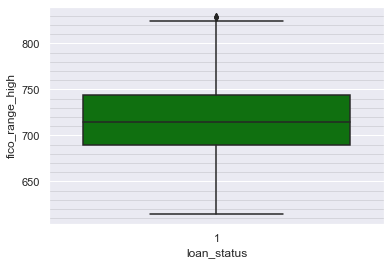

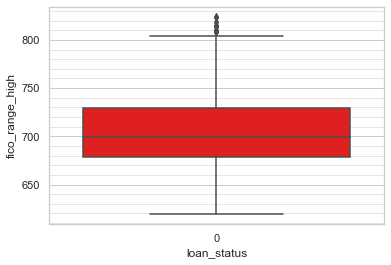

In [49]:
sns.set(style="darkgrid")
sns.boxplot(x=fico1['loan_status'],y=fico1['fico_range_high'],palette =['green'])
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.2)
plt.show()
sns.set(style="whitegrid")
sns.boxplot(x=fico0['loan_status'],y=fico0['fico_range_high'],palette = ['red'])
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.2)
plt.show()

In [50]:
print(fico0.fico_range_high.mean())
print(fico1.fico_range_high.mean())
print(round(100-100*(fico0.fico_range_high.mean())/(fico1.fico_range_high.mean()),1),r'%')

705.0386933079607
719.2498261232438
2.0 %


### *Z powyższych wykresów możemy wywnioskować, że najwięcej osób uzyskało oceny w granicach 690-740 punktów. Nie ma wyraźnej zależności ilość punktów - spłacony kredyt. Można jednak zauważyć, że osoby z ilością punktów poniżej 690 częściej mają kłopot ze spłatą kredytu, a osoby z punktami powyżej 730 rzadziej. Średnia wartość punktów przy niespłaconym kredycie to 705 i jest o 2% niższa niż dla spłaconego 719 punktów*


## 2.2 Teraz sprawdzę, czy istnieje zależność pomiędzy wiekiem kredytowym, a spłatą pożyczki

<AxesSubplot:xlabel='term', ylabel='Density'>

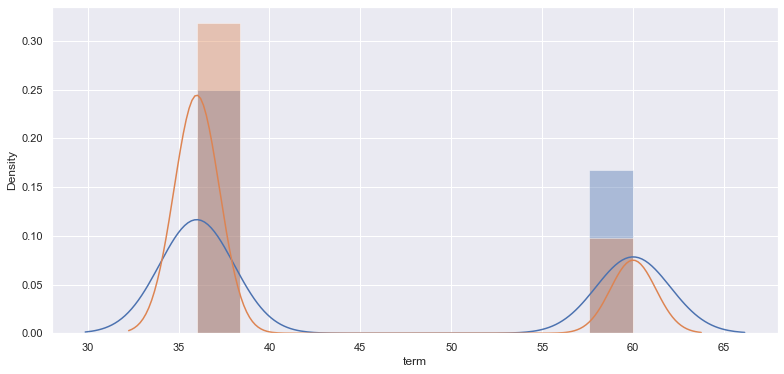

In [51]:
sns.set(rc = {'figure.figsize':(13,6)})
sns.distplot(df1[df1['loan_status']==0]['term'], bins=10)
sns.distplot(df1[df1['loan_status']==1]['term'], bins=10)

<AxesSubplot:xlabel='term', ylabel='Count'>

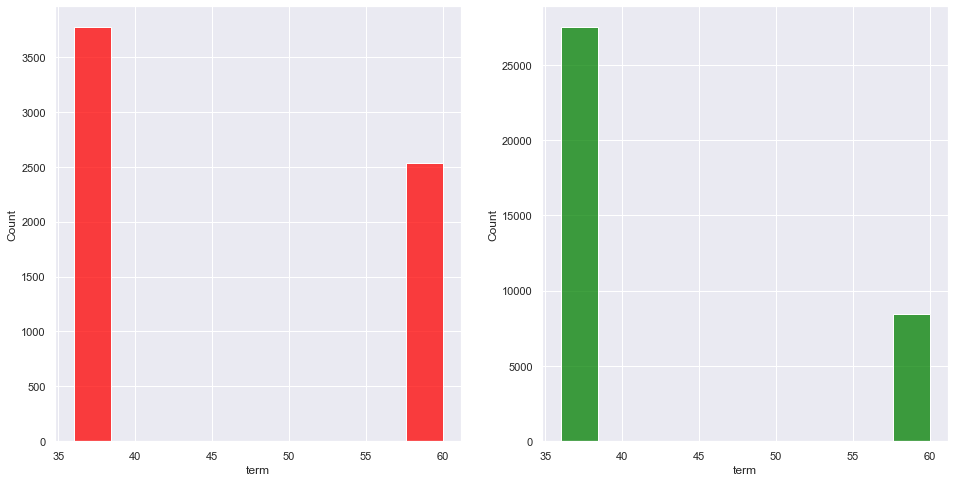

In [52]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
sns.histplot(df1[df1['loan_status']==0]['term'], bins=10,ax=ax1, color='red')
sns.histplot(df1[df1['loan_status']==1]['term'], bins=10,ax=ax2, color='green')

In [53]:
print(fico0.term.mean())
print(fico1.term.mean())
print(round(100-100*(fico0.term.mean())/(fico1.term.mean()),1),r'%')

45.64795432921028
41.638614550006956
-9.6 %


### *Z powyższych wykresów wynika, że w przypadku kredytów na 60 miesięcy, częściej występuje problem z ich spłatą. Średnia długość kredytu niespłaconego jest o 9.6% dłuższa niż spłaconego*

In [54]:
print(fico0.term.mean())
print(fico1.term.mean())
print(round(100-100*(fico0.term.mean())/(fico1.term.mean()),1),r'%')

45.64795432921028
41.638614550006956
-9.6 %


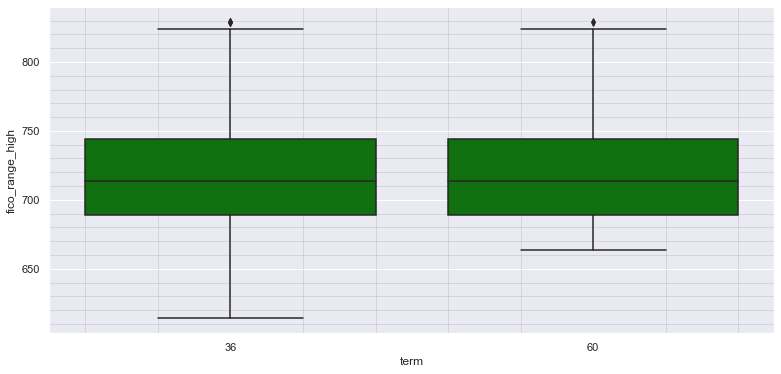

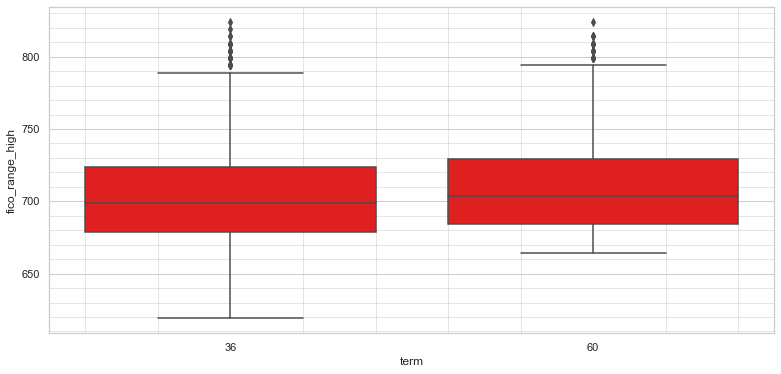

In [55]:
sns.set(style="darkgrid")
sns.boxplot(x=fico1['term'],y=fico1['fico_range_high'],palette =['green'])
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.2)
plt.show()
sns.set(style="whitegrid")
sns.boxplot(x=fico0['term'],y=fico0['fico_range_high'],palette = ['red'])
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.2)
plt.show()

### *W przypadku kredytów na okres 36 miesięcy, kredyty z wynikiem poniżej 690 często nie były spłacane, natomiast powyżej 725 raczej były. W przypadku kredytów na 60 miesięcy, zasada była dość podobna. Przy kredytach z fico poniżej 690, także były ryzykowne, a z wynikami powyżej 730, ryzyko było mniejsze. Aczkolwiek, nawet wyniki powyżej 800 punktów nie dawały gwarancji spłaty.*

## 2.3 W tym punkcie sprawdzę, czy istnieje zależność pomiędzy statusem własności domu, a spłatą kredytu

### Najpierw trzeba zamienić wartości opisowe na liczbowe

In [56]:
df1['home_ownership'].value_counts()

RENT        20015
MORTGAGE    18873
OWN          3227
OTHER         134
NONE            2
Name: home_ownership, dtype: int64

In [57]:
df1.loc[df1['home_ownership']=='NONE','home_ownership']='OTHER'

C:\Users\michn\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [58]:
df1['home_ownership'].value_counts()

RENT        20015
MORTGAGE    18873
OWN          3227
OTHER         136
Name: home_ownership, dtype: int64

### Wartości NONE przypisałem do OTHER, bo były tylko dwie takie wartości. Miało to na celu ogrniczenie ilości zmiennych.

In [59]:
df1['home_ownership'] = df1['home_ownership'].map({('RENT'): 0, 
                                             ('MORTGAGE'): 1,
                                                 ('OWN'):2,
                                                   ('OTHER'):3})

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/771787221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['home_ownership'] = df1['home_ownership'].map({('RENT'): 0,


In [60]:
fico0['home_ownership'] = fico0['home_ownership'].map({('RENT'): 0, 
                                             ('MORTGAGE'): 1,
                                                 ('OWN'):2,
                                                   ('OTHER'):3})

In [61]:
fico1['home_ownership'] = fico1['home_ownership'].map({('RENT'): 0, 
                                             ('MORTGAGE'): 1,
                                                 ('OWN'):2,
                                                   ('OTHER'):3})

### Teraz mogę przystąpić do analizy danych

<AxesSubplot:xlabel='home_ownership', ylabel='Density'>

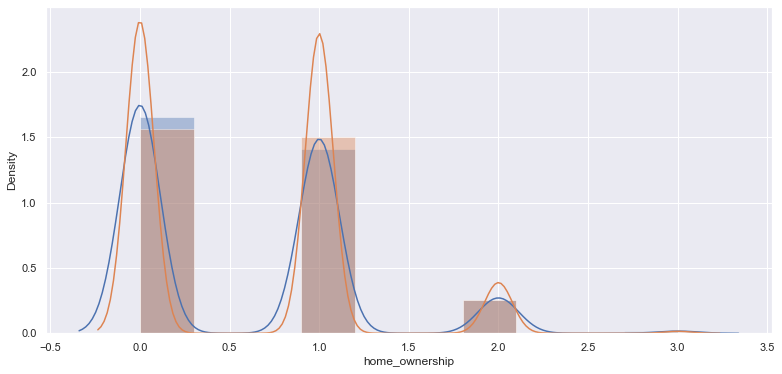

In [62]:
sns.set(rc = {'figure.figsize':(13,6)})
sns.distplot(df1[df1['loan_status']==0]['home_ownership'], bins=10)
sns.distplot(df1[df1['loan_status']==1]['home_ownership'], bins=10)

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

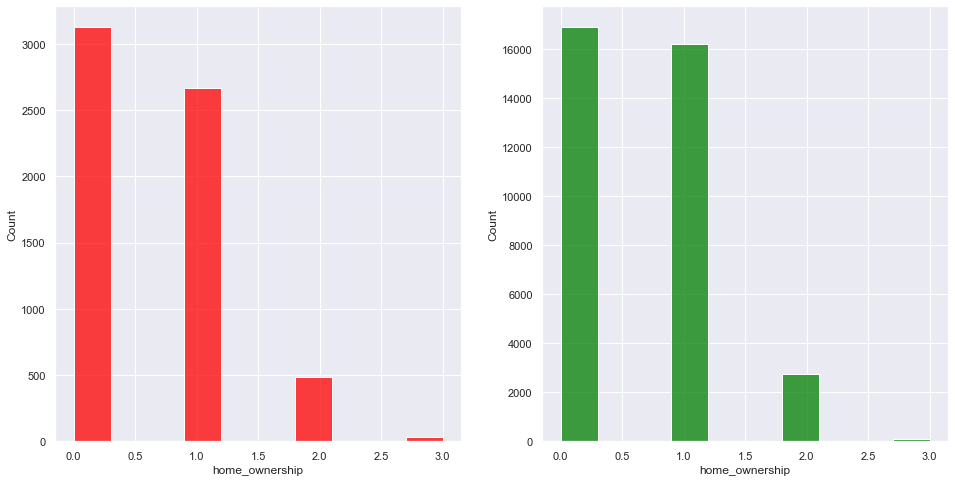

In [63]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
sns.histplot(df1[df1['loan_status']==0]['home_ownership'], bins=10,ax=ax1, color='red')
sns.histplot(df1[df1['loan_status']==1]['home_ownership'], bins=10,ax=ax2, color='green')


In [64]:
print(round(100-100*(fico0.home_ownership.value_counts())/(fico1.home_ownership.value_counts()),1),r'%')

0.0    81.5
1.0    83.6
2.0    82.3
3.0    72.4
Name: home_ownership, dtype: float64 %


### *Z powyższych wykresów i wyliczeń wynika, że jedynie nieokreślony rodzaj własności "Other" wpływa najmniej korzystnie na spłatę kredytów. Najlepsza spłacalność jest w przypadku hipoteki, ale różnice do wynajmu i własności nie są duże*

## 2.4. Sprawdzenie jak wielkość dochodu wpływa na spłatę zobowiązania

In [65]:
print('Range of values: ', df1['annual_inc'].max()-df1['annual_inc'].min())

Range of values:  5998104.0


In [66]:
print('Minimum: ', df1['annual_inc'].min())
print('Maximum: ',df1['annual_inc'].max())
print('Mean value: ', df1['annual_inc'].mean())
print('Median value: ',df1['annual_inc'].median())
print('Standard deviation: ', df1['annual_inc'].std())

Minimum:  1896.0
Maximum:  6000000.0
Mean value:  69182.18801519496
Median value:  59000.0
Standard deviation:  64100.2918930431


In [67]:
Q1inc=df1['annual_inc'].quantile(q=0.25)
Q3inc=df1['annual_inc'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1inc)
print('3st Quartile (Q3) is: ', Q3inc)
print('Interquartile range (IQR) is ', stats.iqr(df1['annual_inc']))

1st Quartile (Q1) is:  40000.0
3st Quartile (Q3) is:  82500.0
Interquartile range (IQR) is  42500.0


In [68]:
L_outliers_inc=Q1inc-1.5*(Q3inc-Q1inc)
U_outliers_inc=Q3inc+1.5*(Q3inc-Q1inc)
print('Lower outliers in annual_inc: ', L_outliers_inc)
print('Upper outliers in annual_inc: ', U_outliers_inc)

Lower outliers in annual_inc:  -23750.0
Upper outliers in annual_inc:  146250.0


In [69]:
fico0inc=fico0[(fico0['annual_inc']<146250)]
fico1inc=fico1[(fico1['annual_inc']<146250)]

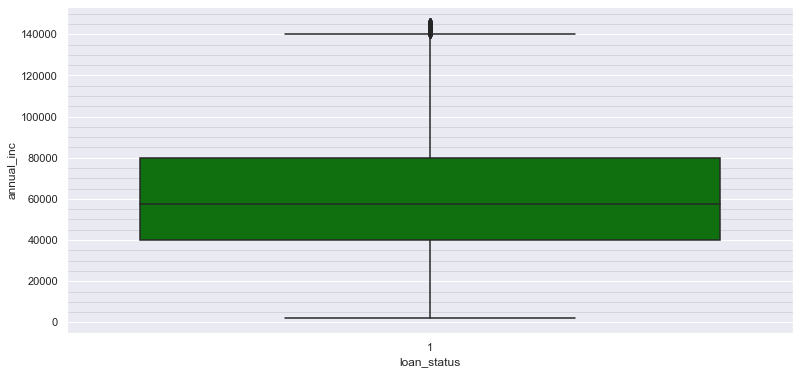

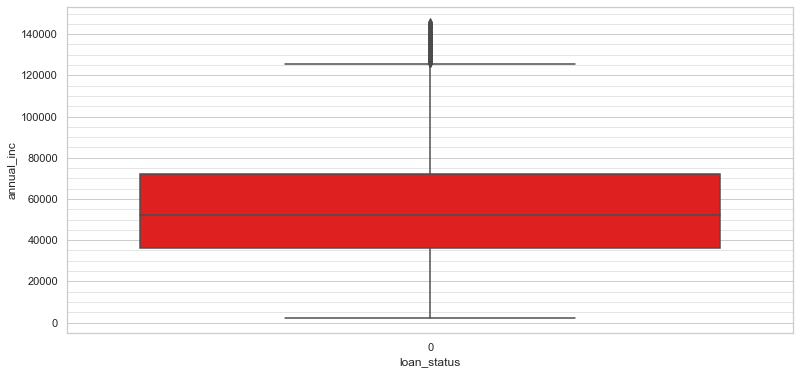

In [70]:
sns.set(style="darkgrid")
sns.boxplot(x=fico1inc['loan_status'],y=fico1inc['annual_inc'],palette =['green'])
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.2)
plt.show()
sns.set(style="whitegrid")
sns.boxplot(x=fico0inc['loan_status'],y=fico0inc['annual_inc'],palette = ['red'])
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.2)
plt.show()

In [71]:
df1inc=df1[(df1['annual_inc']<146250)]

In [72]:
print(fico0inc.annual_inc.mean())
print(fico1inc.annual_inc.mean())

56854.5524120271
62052.70644202643


In [73]:
print('Minimum: ', df1inc['annual_inc'].min())
print('Maximum: ',df1inc['annual_inc'].max())
print('Mean value: ', df1inc['annual_inc'].mean())
print('Median value: ',df1inc['annual_inc'].median())
print('Standard deviation: ', df1inc['annual_inc'].std())

Minimum:  1896.0
Maximum:  146000.0
Mean value:  61270.80672920651
Median value:  56000.0
Standard deviation:  28286.99585854373


<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

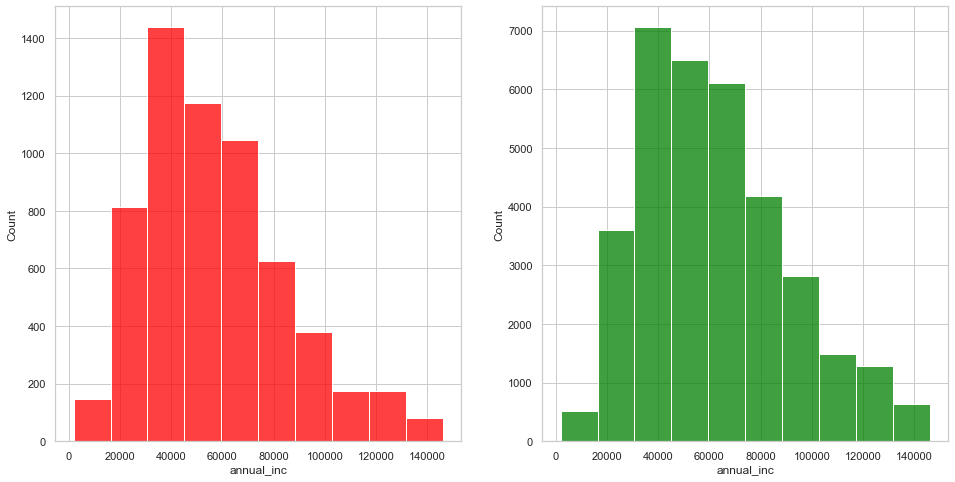

In [74]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
sns.histplot(df1inc[df1inc['loan_status']==0]['annual_inc'], bins=10,ax=ax1, color='red')
sns.histplot(df1inc[df1inc['loan_status']==1]['annual_inc'], bins=10,ax=ax2, color='green')

In [75]:
fico0inclow=fico0inc[(fico0inc['annual_inc']<=40000)]
fico1inclow=fico1inc[(fico1inc['annual_inc']<=40000)]
fico0inchigh=fico0inc[(fico0inc['annual_inc']>40000)]
fico1inchigh=fico1inc[(fico1inc['annual_inc']>40000)]

In [76]:
print(round(100*(fico0inclow.annual_inc.count())/(fico1inclow.annual_inc.count()+fico0inclow.annual_inc.count()),1),r'%')
print(round(100*(fico0inchigh.annual_inc.count())/(fico1inchigh.annual_inc.count()+fico0inchigh.annual_inc.count()),1),r'%')


18.3 %
13.9 %


### *Z powyższych wykresów wynika, że w przypadku dochodów w granicach 40 tys. częściej zdarzają się przypadku niespłacenia kredytu. Wraz ze wzrostem dochodu spłacalność wygląda lepiej. Przy dochodach poniżej 40tys. było 18.3% niespłaconych kredytów, a przy wyższych dochodach 13.9%*

## 2.5 Czy długość zatrudnienia wpływa na spłatę kredytu?

In [77]:
df1.emp_length.value_counts()

10.0    9346
0.5     4983
2.0     4711
5.0     4544
3.0     4342
4.0     3628
1.0     3551
6.0     2365
7.0     1867
8.0     1582
9.0     1332
Name: emp_length, dtype: int64

In [78]:
#średni okres zatrudnienia w przypadku kredytów spłaconych i niespłaconych
print(fico0.emp_length.mean())
print(fico1.emp_length.mean())

5.109261021249604
4.9761162887745165


<AxesSubplot:xlabel='emp_length', ylabel='Density'>

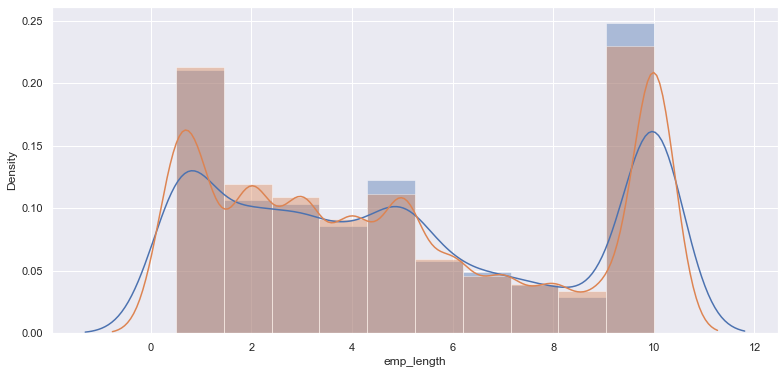

In [79]:
sns.set(rc = {'figure.figsize':(13,6)})
sns.distplot(df1[df1['loan_status']==0]['emp_length'], bins=10)
sns.distplot(df1[df1['loan_status']==1]['emp_length'], bins=10)

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

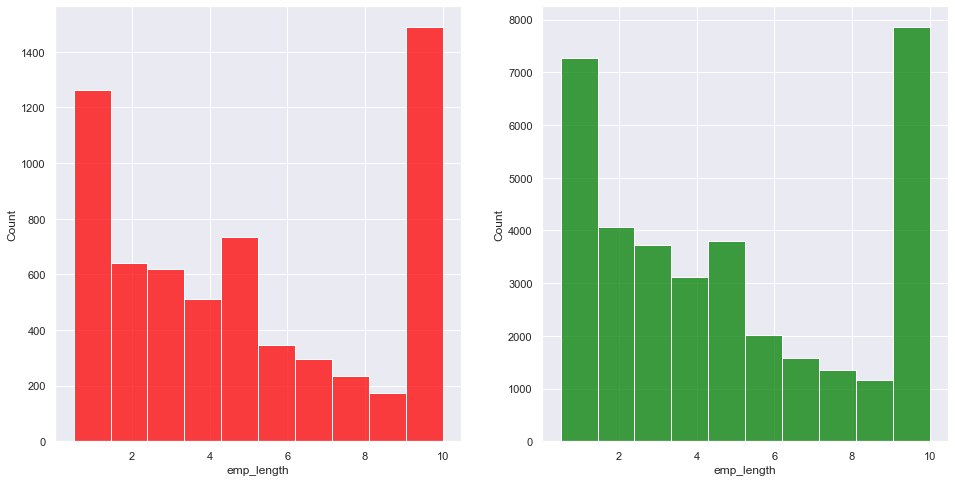

In [80]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
sns.histplot(df1[df1['loan_status']==0]['emp_length'], bins=10,ax=ax1, color='red')
sns.histplot(df1[df1['loan_status']==1]['emp_length'], bins=10,ax=ax2, color='green')

### *Długość zatrudnienia nie ma istotnego znaczenia dla spłaty kredytu. Średnia długość zatrudnienia dla kredytów spłaconych i niespłaconych jest prawie taka sama. Z powyższych wykresów wynika, że delikatnie lepiej wygląda spłacalność kredytów wśród osób z długością zatrudnienia 2-4 lata. W przypadku zatrudnienia na 5 i więcej lat wzrasta odsetek ilości kredytów niespłaconych. Najgorzej wygląda sytuacja wśród zatrudnionych na 5 oraz 10 i więcej lat*

## 2.6 Czy wielkość pożyczki ma wpływ na jej spłatę.

In [81]:
print('Range of values: ', df1['funded_amnt'].max()-df1['funded_amnt'].min())

Range of values:  34500.0


In [82]:
print('Minimum: ', df1['funded_amnt'].min())
print('Maximum: ',df1['funded_amnt'].max())
print('Mean value: ', df1['funded_amnt'].mean())
print('Median value: ',df1['funded_amnt'].median())
print('Standard deviation: ', df1['funded_amnt'].std())

Minimum:  500.0
Maximum:  35000.0
Mean value:  10851.716527419469
Median value:  9600.0
Standard deviation:  7146.667870696799


In [83]:
Q1loan=df1['funded_amnt'].quantile(q=0.25)
Q3loan=df1['funded_amnt'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1loan)
print('3st Quartile (Q3) is: ', Q3loan)
print('Interquartile range (IQR) is ', stats.iqr(df1['funded_amnt']))

1st Quartile (Q1) is:  5150.0
3st Quartile (Q3) is:  15000.0
Interquartile range (IQR) is  9850.0


In [84]:
L_outliers_loan=Q1loan-1.5*(Q3loan-Q1loan)
U_outliers_loan=Q3loan+1.5*(Q3loan-Q1loan)
print('Lower outliers in loan amount: ', L_outliers_loan)
print('Upper outliers in loan amount: ', U_outliers_loan)

Lower outliers in loan amount:  -9625.0
Upper outliers in loan amount:  29775.0


### Pozbywam się outliers-ów, aby nie zaburzały winków

In [85]:
fico0loan=fico0[(fico0['funded_amnt']<29800)]
fico1loan=fico1[(fico1['funded_amnt']<29800)]
df1loan=df1[(df1['funded_amnt']<29800)]

In [86]:
print(fico0loan.funded_amnt.mean())
print(fico1loan.funded_amnt.mean())

10820.818301082321
10208.801884643854


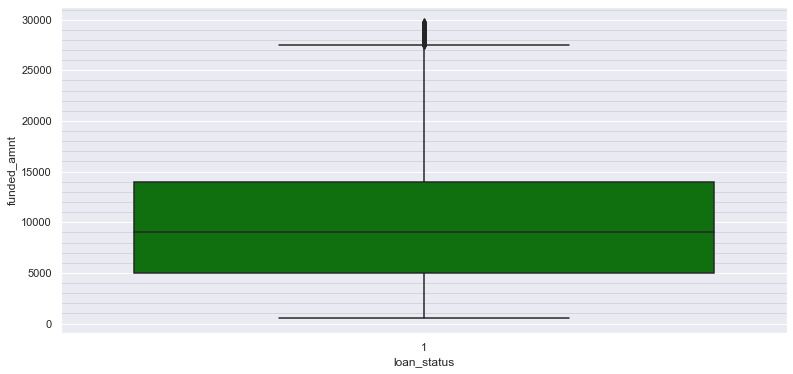

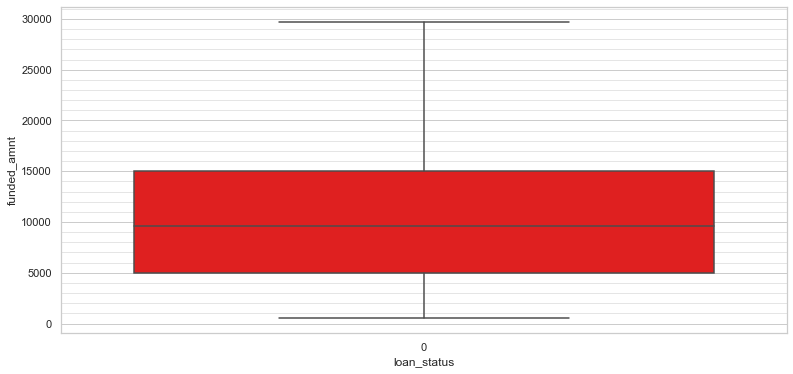

In [87]:
sns.set(style="darkgrid")
sns.boxplot(x=fico1inc['loan_status'],y=fico1loan['funded_amnt'],palette =['green'])
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.2)
plt.show()
sns.set(style="whitegrid")
sns.boxplot(x=fico0inc['loan_status'],y=fico0loan['funded_amnt'],palette = ['red'])
plt.minorticks_on()
plt.grid(b=True, which='minor', color='gray', linestyle='-', alpha=0.2)
plt.show()

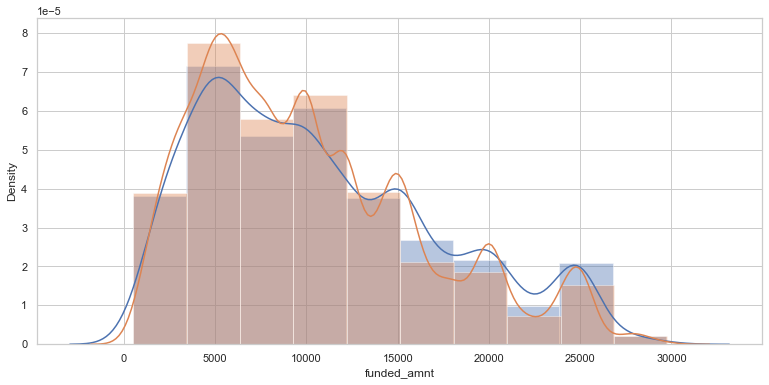

In [88]:
sns.distplot(df1loan[df1loan['loan_status']==0]['funded_amnt'], bins=10)
sns.distplot(df1loan[df1loan['loan_status']==1]['funded_amnt'], bins=10)
plt.show()

<AxesSubplot:xlabel='funded_amnt', ylabel='Count'>

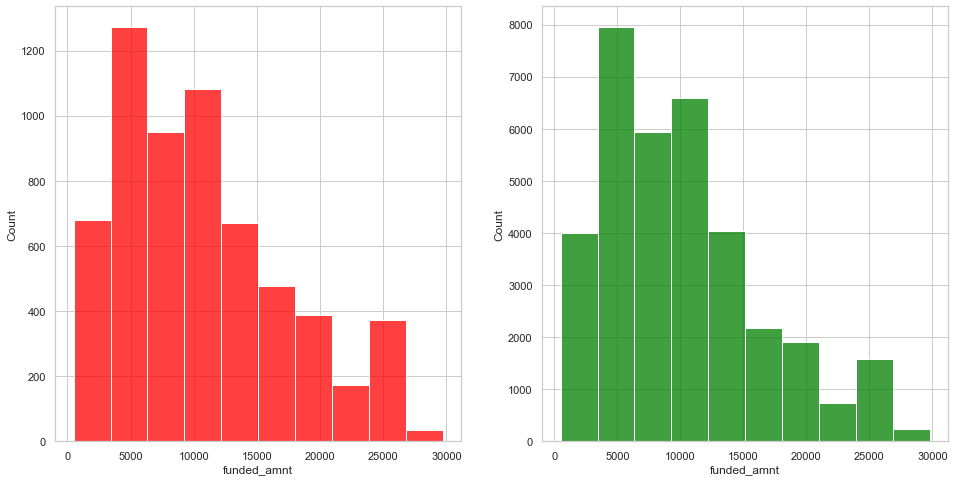

In [89]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,8))
sns.histplot(df1loan[df1loan['loan_status']==0]['funded_amnt'], bins=10,ax=ax1, color='red')
sns.histplot(df1loan[df1loan['loan_status']==1]['funded_amnt'], bins=10,ax=ax2, color='green')

In [90]:
fico0loanlow=fico0inc[(fico0inc['funded_amnt']<=15000)]
fico1loanlow=fico1inc[(fico1inc['funded_amnt']<=15000)]
fico0loanhigh=fico0inc[(fico0inc['funded_amnt']>15000)]
fico1loanhigh=fico1inc[(fico1inc['funded_amnt']>15000)]

In [91]:
print(round(100*(fico0loanlow.funded_amnt.count())/(fico1loanlow.funded_amnt.count()+fico0loanlow.funded_amnt.count()),1),r'%')
print(round(100*(fico0loanhigh.funded_amnt.count())/(fico1loanhigh.funded_amnt.count()+fico0loanhigh.funded_amnt.count()),1),r'%')

14.1 %
18.7 %


### *Z powyższych wykresów oraz obliczeń wynika, że przy kwotach pożyczek od 15tys. w górę wzrasta ilość niespłaconych kredytów. 14.1% kredytów do 15tys. nie zostało spłaconych, a w przypadku wyższych kredytów było to 18.7%*

## *Podsumowanie*
## *1. Pożyczki z wynikami Fico poniżej 690 niosły ze sobą znacznie większe ryzyko, niż te z ilością punktów powyżej 730*
## *2. Pożyczki o dłuższym okresie spłaty także niosły za sobą nieco większe ryzyko*
## *3. W przypadku jeśli status własności domu był - "wynajem", niosło to za sobą większe ryzyko niż "hipoteka" lub "własność"*
## *4. Osoby o wyższych dochodach lepiej spłacały kredyty*
## *5. Osoby o krótszym stażu zatrudnienia, częściej spłacały pożyczki, niż te które były zatrudnione powyżej 5 lat*
## *6. Przy wyższych kwotach kredytu było wyższe ryzko braku ich spłaty.*

# 3. Future Engineering - utwórz 20 nowych zmiennych

### Utworzę kolumnę funded_per z oznaczeniem, czy dana pożyczka była wypłacona w żądanej kwocie, czy mniejszej, 1 = cała kwota, 0 = część

In [92]:
df1['funded_per']=np.nan

C:\Users\michn\AppData\Local\Temp/ipykernel_28752/1857236459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['funded_per']=np.nan


In [93]:
df1.loc[df1['funded_amnt']==df1['loan_amnt'],'funded_per']=1
df1.loc[df1['funded_amnt']<df1['loan_amnt'],'funded_per']=0  

C:\Users\michn\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [94]:
df1.funded_per.value_counts()

1.0    40260
0.0     1991
Name: funded_per, dtype: int64

### Tworzę nowe kolumny wg Grade-u

In [95]:
df1=pd.get_dummies(df1, columns=['grade'])

### Dodaję kolumnę, w której będzie informacja, czy klient podją współpracę z firmą windykacyjną

In [96]:
df1['debt_settelment_status']=np.nan

In [97]:
df1.loc[df1['debt_settlement_flag']=='Y','debt_settelment_status']=1
df1.loc[df1['debt_settlement_flag']=='N','debt_settelment_status']=0 

In [98]:
df1.debt_settelment_status.value_counts()

0.0    42092
1.0      159
Name: debt_settelment_status, dtype: int64

In [99]:
df1.shape

(42251, 27)

### Utworzę teraz nowe kolumny ze względu na home_ownership. Najpierw przywrócę wartości kolumn, a potem te kolumny rozdzielę i utworzę 4 nowe

In [100]:
df1['home_ownership'] = df1['home_ownership'].map({0:('RENT'), 
                                             1:('MORTGAGE'),
                                                 2:('OWN'),
                                                   3:('OTHER')})

In [101]:
df1=pd.get_dummies(df1, columns=['home_ownership'])

In [102]:
df1

,loan_amnt,funded_amnt,term,int_rate,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti,...,grade_C,grade_D,grade_E,grade_F,grade_G,debt_settelment_status,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,5000.0,36,10.65,B2,10.0,24000.0,Dec-2011,1,27.65,...,0,0,0,0,0,0.0,0,0,0,1
1,2500.0,2500.0,60,15.27,C4,0.5,30000.0,Dec-2011,0,1.00,...,1,0,0,0,0,0.0,0,0,0,1
2,2400.0,2400.0,36,15.96,C5,10.0,12252.0,Dec-2011,1,8.72,...,1,0,0,0,0,0.0,0,0,0,1
3,10000.0,10000.0,36,13.49,C1,10.0,49200.0,Dec-2011,1,20.00,...,1,0,0,0,0,0.0,0,0,0,1
4,3000.0,3000.0,60,12.69,B5,1.0,80000.0,Dec-2011,1,17.94,...,0,0,0,0,0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42444,1500.0,1500.0,36,11.86,D1,5.0,28000.0,Aug-2007,1,14.31,...,0,1,0,0,0,0.0,0,0,0,1
42445,3000.0,3000.0,36,8.38,A5,0.5,20000.0,Aug-2007,1,6.72,...,0,0,0,0,0,0.0,0,0,0,1
42446,4500.0,4500.0,36,8.07,A4,0.5,18240.0,Aug-2007,1,3.29,...,0,0,0,0,0,0.0,0,0,0,1
42448,15000.0,15000.0,36,12.17,D2,1.0,83200.0,Aug-2007,1,17.02,...,0,1,0,0,0,0.0,1,0,0,0


### Utworzę nową kolumnę z podziałem na pożyczki poniżej średnie i powyżej średniej wielkości pożyczki

In [103]:
df1['funded_lev']=np.nan

In [104]:
df1.loc[df1['loan_amnt']<=df1['loan_amnt'].mean(),'funded_lev']='low_loan'
df1.loc[df1['loan_amnt']>df1['loan_amnt'].mean(),'funded_lev']='high_loan'

In [105]:
df1=pd.get_dummies(df1, columns=['funded_lev'])

### Zrobię podział pracowników pod względem doświadczenia. Z wcześniejszych wyników wynikało, że Ci bardziej doświadczeni, mieli trochę większe problemy ze spłatą pożyczki

In [106]:
df1['emp_lev']=np.nan

In [107]:
df1.loc[df1['emp_length']<=4,'emp_lev']='not_experineced'
df1.loc[df1['emp_length']>4,'emp_lev']='experienced'

In [108]:
df1=pd.get_dummies(df1, columns=['emp_lev'])

### Podzielę jeszcze pożyczkobiorców wg dochodów

In [109]:
df1['inc_lev']=np.nan

In [110]:
df1.loc[df1['annual_inc']<=Q1inc,'inc_lev']='low'
df1.loc[(df1['annual_inc']<=Q3inc) & (df1['annual_inc']>Q1inc),'inc_lev']='medium'
df1.loc[df1['annual_inc']>Q3inc,'inc_lev']='high'

In [111]:
df1=pd.get_dummies(df1, columns=['inc_lev'])

### Utworzę kolumnę z rokiem, w którym została udzielona pożyczka

In [112]:
df1[['issue_dm','issue_dy']]=df1.issue_d.str.split('-',expand=True)
df1.issue_dy=df1.issue_dy.astype('int64')
df1.drop(['issue_dm'],axis=1,inplace=True)

### To samo zrobię dla kolumny earliest_cr_line

In [113]:
df1[['earliest_cr_m','earliest_cr_y']]=df1.earliest_cr_line.str.split('-',expand=True)
df1.earliest_cr_y=df1.earliest_cr_y.astype('int64')
df1.drop(['earliest_cr_m'],axis=1,inplace=True)

In [114]:
df1.dtypes

loan_amnt                  float64
funded_amnt                float64
term                         int64
int_rate                   float64
sub_grade                   object
emp_length                 float64
annual_inc                 float64
issue_d                     object
loan_status                  int64
dti                        float64
earliest_cr_line            object
fico_range_high            float64
pub_rec                    float64
revol_bal                  float64
revol_util                 float64
acc_now_delinq             float64
debt_settlement_flag        object
funded_per                 float64
grade_A                      uint8
grade_B                      uint8
grade_C                      uint8
grade_D                      uint8
grade_E                      uint8
grade_F                      uint8
grade_G                      uint8
debt_settelment_status     float64
home_ownership_MORTGAGE      uint8
home_ownership_OTHER         uint8
home_ownership_OWN  

## *Utworzyłem 22 nowe kolumny*

# 4. Modelowanie

## 4.1 Klasteryzacja

In [115]:
#Usuwam zmienne o typie object
df1=df1.drop(['debt_settlement_flag','sub_grade','issue_d','earliest_cr_line'],axis=1)

In [116]:
cor1=df1.corr()
cor1

,loan_amnt,funded_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,fico_range_high,pub_rec,...,home_ownership_RENT,funded_lev_high_loan,funded_lev_low_loan,emp_lev_experienced,emp_lev_not_experineced,inc_lev_high,inc_lev_low,inc_lev_medium,issue_dy,earliest_cr_y
loan_amnt,1.000000,0.981724,0.354961,0.293772,0.154462,0.276019,-0.044614,0.063572,0.132581,-0.051518,...,-0.158639,0.807446,-0.807446,0.120972,-0.120972,0.335305,-0.325242,-0.008606,0.137208,-0.189854
funded_amnt,0.981724,1.000000,0.334277,0.296653,0.153978,0.272307,-0.041705,0.063246,0.124794,-0.052451,...,-0.153803,0.798100,-0.798100,0.120963,-0.120963,0.331319,-0.322766,-0.007299,0.146730,-0.183606
term,0.354961,0.334277,1.000000,0.429829,0.114261,0.043742,-0.135733,0.075828,-0.000947,0.005285,...,-0.096346,0.312815,-0.312815,0.099544,-0.099544,0.052484,-0.086496,0.029476,0.280283,-0.046568
int_rate,0.293772,0.296653,0.429829,1.000000,-0.000299,0.055788,-0.198950,0.119554,-0.703241,0.100458,...,0.062197,0.241666,-0.241666,-0.012485,0.012485,0.063970,-0.048970,-0.012971,0.003142,0.114277
emp_length,0.154462,0.153978,0.114261,-0.000299,1.000000,0.114759,-0.013790,0.055770,0.088379,0.058583,...,-0.252822,0.128793,-0.128793,0.866601,-0.866601,0.122903,-0.190965,0.058992,0.131089,-0.273816
annual_inc,0.276019,0.272307,0.043742,0.055788,0.114759,1.000000,0.037002,-0.116358,0.050427,-0.016205,...,-0.178279,0.209498,-0.209498,0.082965,-0.082965,0.530017,-0.351137,-0.154761,0.013820,-0.188239
loan_status,-0.044614,-0.041705,-0.135733,-0.198950,-0.013790,0.037002,1.000000,-0.043337,0.140133,-0.053346,...,-0.018589,-0.033620,0.033620,-0.017583,0.017583,0.050991,-0.054580,0.003125,0.024897,-0.017501
dti,0.063572,0.063246,0.075828,0.119554,0.055770,-0.116358,-0.043337,1.000000,-0.192034,-0.003084,...,0.011212,0.073825,-0.073825,0.050268,-0.050268,-0.113443,0.026197,0.075531,0.068283,-0.054260
fico_range_high,0.132581,0.124794,-0.000947,-0.703241,0.088379,0.050427,0.140133,-0.192034,1.000000,-0.152134,...,-0.165164,0.101267,-0.101267,0.085725,-0.085725,0.066797,-0.061579,-0.004498,0.099906,-0.233662
pub_rec,-0.051518,-0.052451,0.005285,0.100458,0.058583,-0.016205,-0.053346,-0.003084,-0.152134,1.000000,...,-0.026852,-0.042488,0.042488,0.058939,-0.058939,-0.024785,-0.001112,0.022422,-0.019838,-0.051441


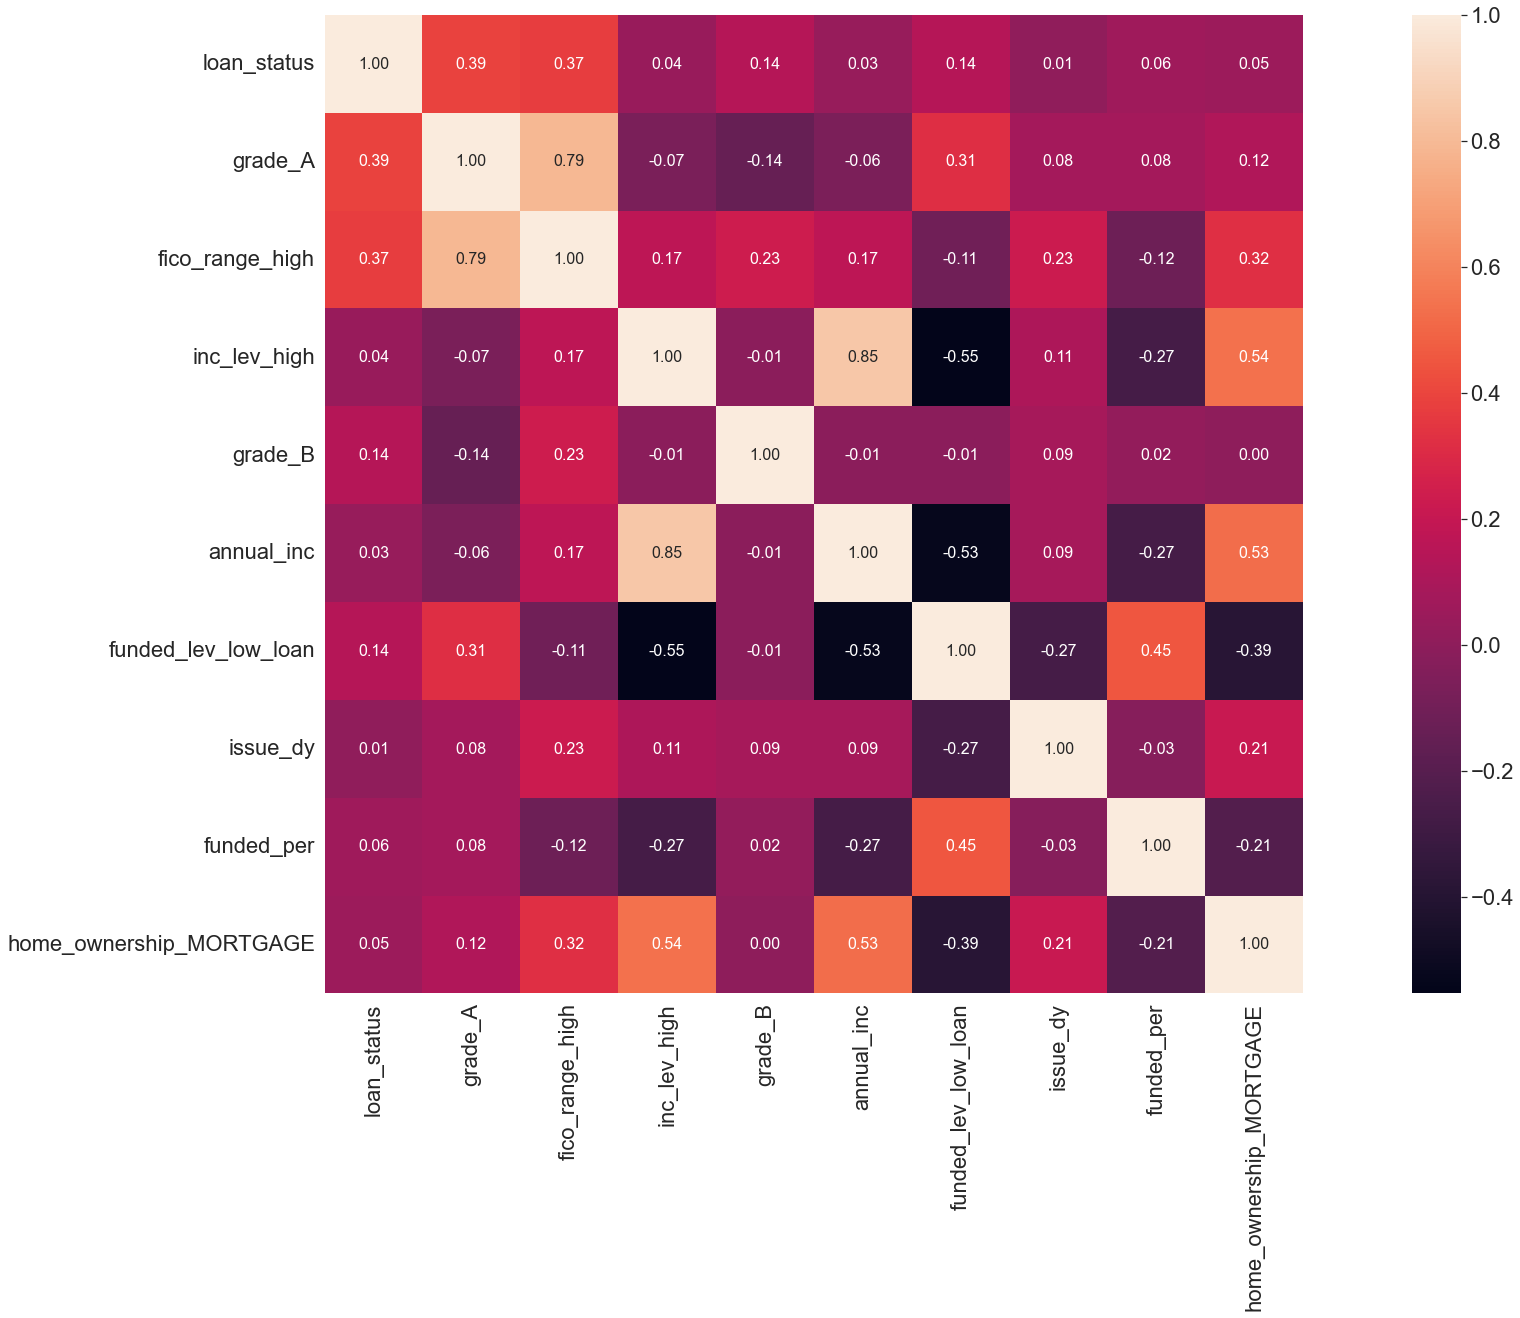

In [117]:
k = 10
corrmat = df1.corr()
cols = corrmat.nlargest(k, 'loan_status')['loan_status'].index
cm = np.corrcoef(corrmat[cols].values.T)
sns.set(font_scale=2)
fig = plt.gcf() 
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 3) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 16}, yticklabels=cols.values, xticklabels=cols.values,)

## Przed rozpoczęciem klasteryzacji wykonam standaryzację

In [118]:
from scipy import stats

z = np.abs(stats.zscore(df1))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

       loan_amnt  funded_amnt      term  int_rate  emp_length  annual_inc  \
0       0.825906     0.818813  0.592557  0.407325    1.454411    0.704875   
1       1.163254     1.168631  1.687601  0.838174    1.306754    0.611271   
2       1.176748     1.182623  0.592557  1.024190    1.454411    0.888153   
3       0.151211     0.119178  0.592557  0.358306    1.454411    0.311737   
4       1.095785     1.098667  1.687601  0.142635    1.161430    0.168766   
...          ...          ...       ...       ...         ...         ...   
42444   1.298193     1.308558  0.592557  0.081123    0.001166    0.642473   
42445   1.095785     1.098667  0.592557  1.019291    1.306754    0.767278   
42446   0.893376     0.888777  0.592557  1.102863    1.306754    0.794736   
42448   0.523484     0.580457  0.592557  0.002449    1.161430    0.218688   
42449   0.825906     0.818813  0.592557  0.337232    1.306754    0.416262   

       loan_status       dti  fico_range_high   pub_rec  ...  \
0         0

In [119]:
#Usuwam ouliers-y
df1_removed_outliers= df1[(z<3).all(axis=1)]

In [120]:
df2=df1_removed_outliers.copy()

In [121]:
X=df2.drop(['loan_status'],axis=1)
y=df2.loan_status

In [122]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [123]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [124]:
X_scaled.shape

(29237, 34)

In [125]:
y.shape

(29237,)

## Jako pierwszą metodę klasteryzacji użyję Kmeans

In [126]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_scaled)

KMeans(max_iter=1000, n_clusters=5)

In [127]:
kmeans.labels_

array([3, 4, 3, ..., 4, 2, 3])

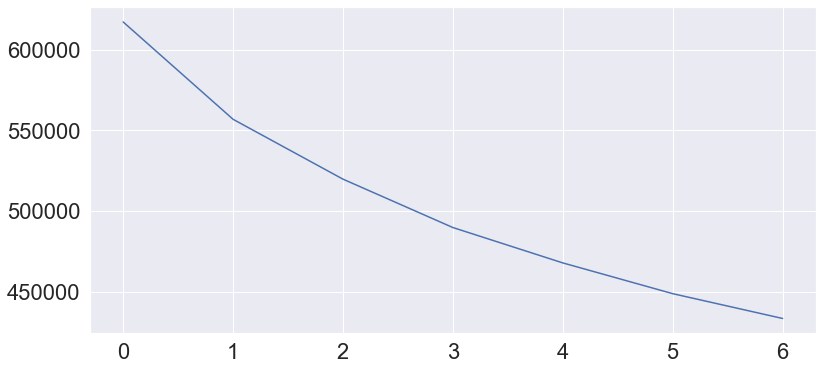

In [128]:
# metoda łokcia - elbow-curve
ssd = [] # Sum of squared distances
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [129]:
# Miara wewnętrzna - wskaźnik sylwetkowy
# średnią odległość pomiędzy obserwacjami wewnątrz grupy (a) i średnią odległość obserwacji do najbliższej „obcej” grupy (b).
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.16341079193167848
For n_clusters=3, the silhouette score is 0.1407104044538062
For n_clusters=4, the silhouette score is 0.12885901201280603
For n_clusters=5, the silhouette score is 0.13534373722805357
For n_clusters=6, the silhouette score is 0.13155266714508063
For n_clusters=7, the silhouette score is 0.1294929263734261
For n_clusters=8, the silhouette score is 0.1341374216549086


In [130]:
#Ustalam ilość klastrów na 2, na podstawie wyników i wykresu
kmeans = KMeans(n_clusters=2, max_iter=1000)
kmeans.fit(X_scaled)

KMeans(max_iter=1000, n_clusters=2)

In [131]:
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 1])

In [132]:
df2['K-Means_Cluster_ID']=kmeans.labels_

In [133]:
df2.head()

,loan_amnt,funded_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,fico_range_high,pub_rec,...,funded_lev_high_loan,funded_lev_low_loan,emp_lev_experienced,emp_lev_not_experineced,inc_lev_high,inc_lev_low,inc_lev_medium,issue_dy,earliest_cr_y,K-Means_Cluster_ID
0,5000.0,5000.0,36,10.65,10.0,24000.0,1,27.65,739.0,0.0,...,0,1,1,0,0,1,0,2011,1985,1
1,2500.0,2500.0,60,15.27,0.5,30000.0,0,1.00,744.0,0.0,...,0,1,0,1,0,1,0,2011,1999,1
2,2400.0,2400.0,36,15.96,10.0,12252.0,1,8.72,739.0,0.0,...,0,1,1,0,0,1,0,2011,2001,1
3,10000.0,10000.0,36,13.49,10.0,49200.0,1,20.00,694.0,0.0,...,0,1,1,0,0,0,1,2011,1996,1
4,3000.0,3000.0,60,12.69,1.0,80000.0,1,17.94,699.0,0.0,...,0,1,0,1,0,0,1,2011,1996,1


<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='funded_amnt'>

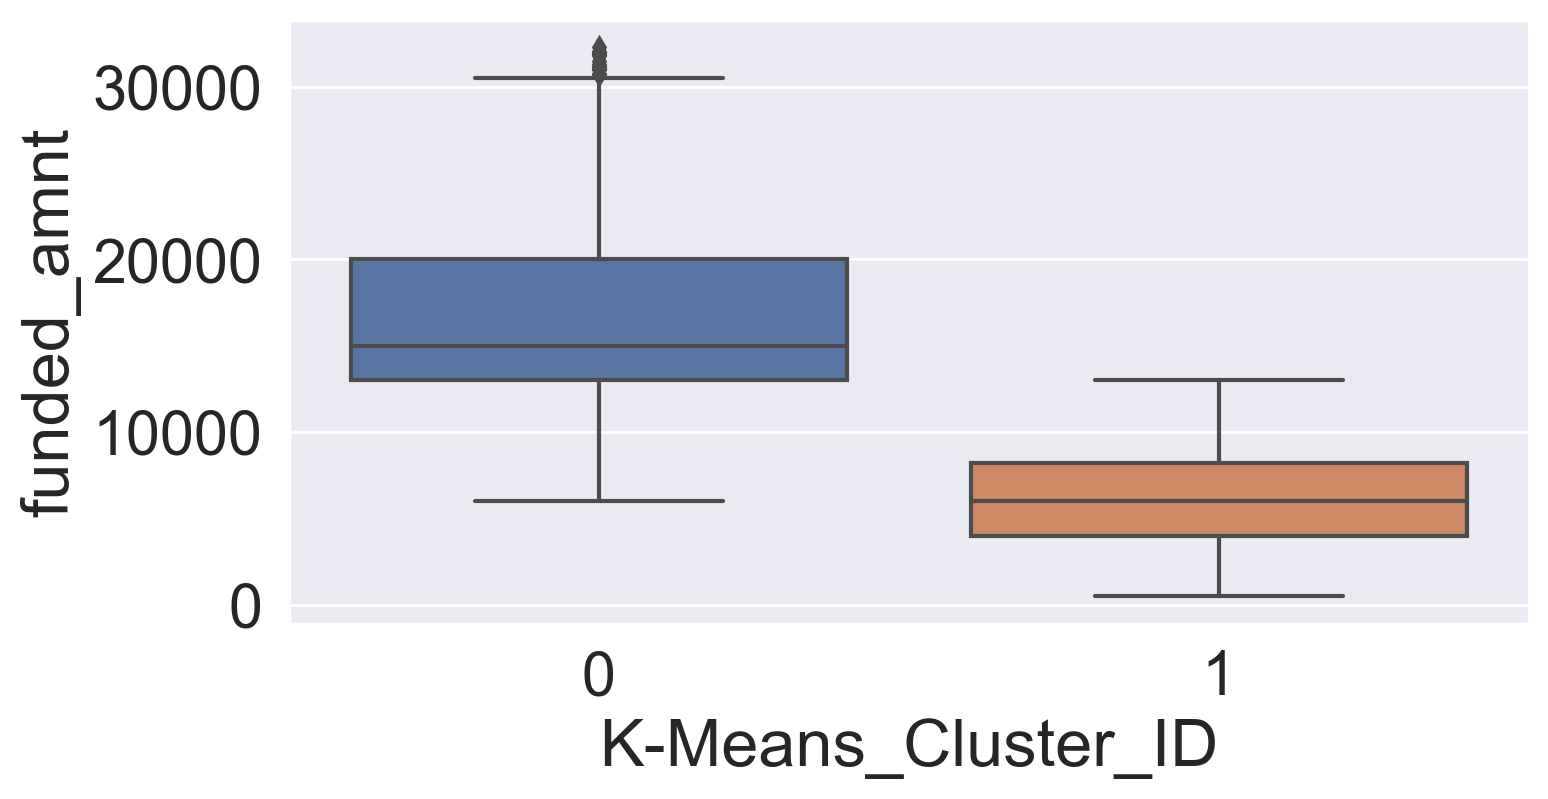

In [134]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='funded_amnt', data=df2)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='fico_range_high'>

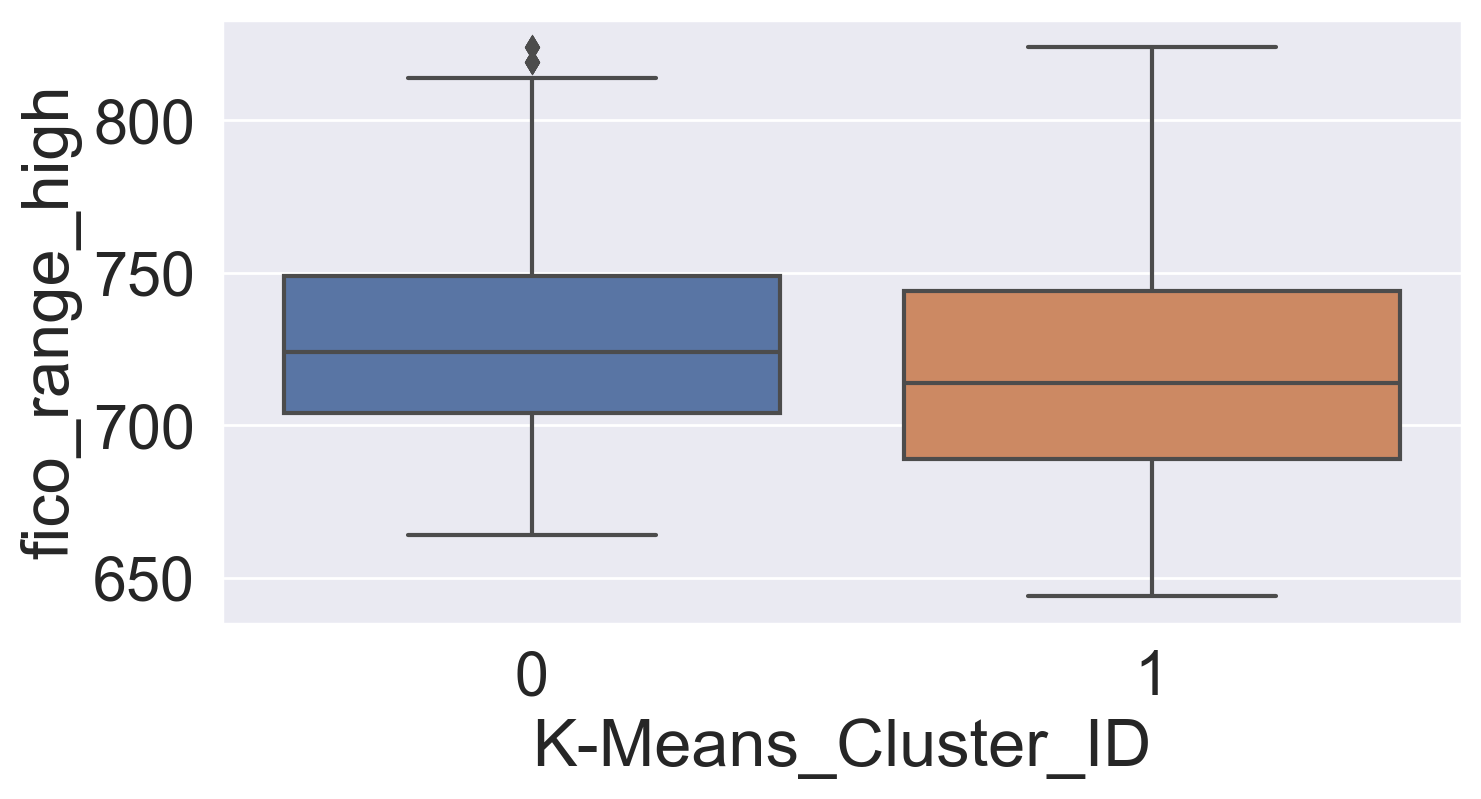

In [135]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='fico_range_high', data=df2)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='emp_length'>

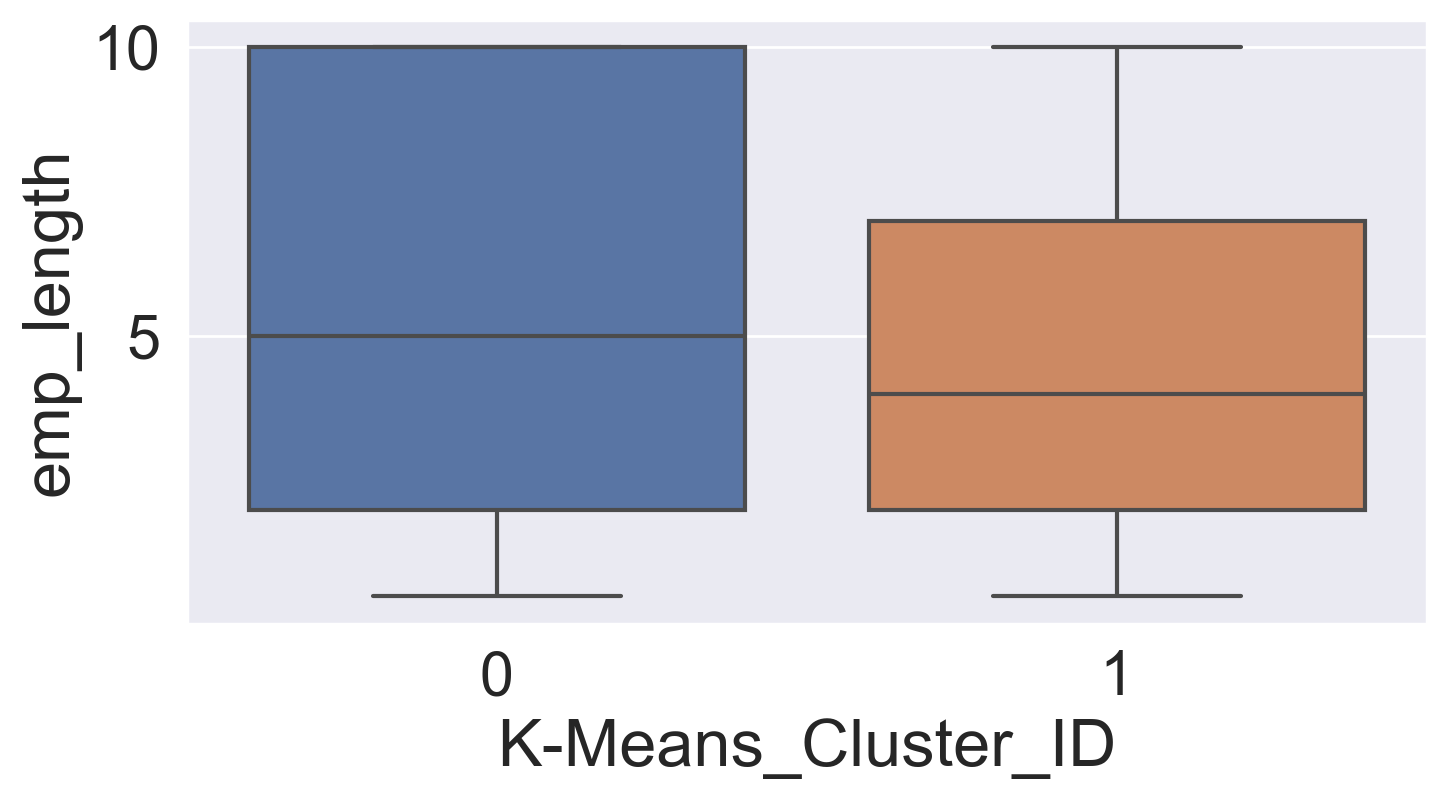

In [136]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='emp_length', data=df2)

### Wynik nie wyglądają najlepiej, ale przetestuję tę metodę w badanich

## Klasteryzacja hierarchiczna

In [137]:
# Sprawdzę na próbce 5000 sampli, czy ta klasteryzacja może się przydać.
X_scaled_h = X_scaled_df.sample(5000)

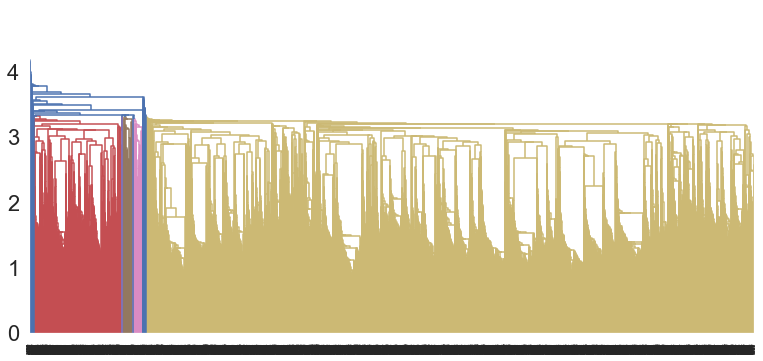

In [138]:
sl_mergings = linkage(X_scaled_h, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

### Utworzyła się duża ilość klastrów, tak więc ten rodzaj klasteryzacji się nie przyda przy modelowaniu.

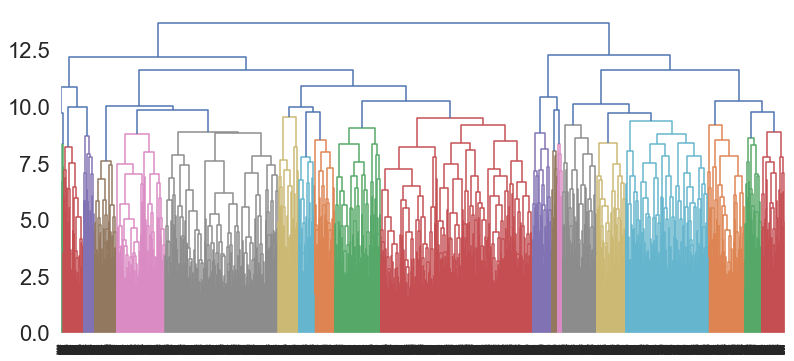

In [139]:
# complete linkage
cl_mergings = linkage(X_scaled_h, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

### Tak samo jak wcześniej ta metoda klasteryzaji nie przyda się w tym wypadku

### DBSCAN

In [140]:
clt = DBSCAN(eps=1, metric='euclidean', min_samples=10, n_jobs=-1)
model = clt.fit(X_scaled)

In [141]:
clt.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [142]:
clt.labels_[0:100]

array([-1, -1, -1, -1, -1,  0, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1,
        4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,  4, -1, -1,
       -1, -1, -1, -1, 14, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1],
      dtype=int64)

C:\Users\michn\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


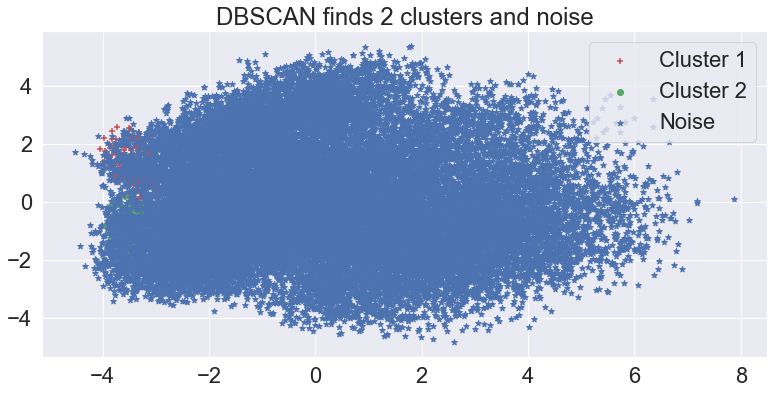

In [143]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_scaled)
pca_2d = pca.transform(X_scaled)
for i in range(0, pca_2d.shape[0]):
    if clt.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif clt.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif clt.labels_[i] == -1:
            c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

### Przy innych wartościach eps i samples, wyniki także nie były dobre, także ta metoda nie nadaje się do zastosowania przy tych danych

# 4.2 Modelowanie

### Zbiór nie jest zbalansowany, więc użyję metody smote, aby go zbalansować i otrzymać bardziej miarodajne wyniki

In [144]:
SMOTE = SMOTE()

### Regresja logistyczna

In [145]:
df1.loan_status.value_counts()

1    35945
0     6306
Name: loan_status, dtype: int64

In [146]:
X=df1.drop(['loan_status'],axis=1)

In [147]:
y=df1.loan_status

In [148]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [149]:
X_SMOTE, y_SMOTE = SMOTE.fit_resample(X,y)

In [150]:
#from sklearn.model_selection import train_test_split
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)

In [151]:
print("After oversampling: ",Counter(y_SMOTE_train))

After oversampling:  Counter({0: 25212, 1: 25111})


In [152]:
logisticRegr = LogisticRegression(solver = 'lbfgs',max_iter=100000)

In [153]:
logisticRegr.fit(X_SMOTE_train, y_SMOTE_train)

LogisticRegression(max_iter=100000)

In [154]:
score = logisticRegr.score(X_SMOTE_test, y_SMOTE_test)
print(score)

0.6316131126257708


In [155]:
predictions_lg = logisticRegr.predict(X_SMOTE_test)

In [156]:
predictions_lg

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [157]:
cm = metrics.confusion_matrix(y_SMOTE_test, predictions_lg)
print(cm)

[[7054 3679]
 [4266 6568]]


In [158]:
accuracy = metrics.accuracy_score(predictions_lg, y_SMOTE_test)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 63.161%


In [159]:
log_auroc=metrics.roc_auc_score(y_SMOTE_test,predictions_lg)
print(log_auroc)

0.6317324978469028


In [160]:
metrics.f1_score(y_SMOTE_test,predictions_lg)

0.6231203453346617

In [161]:
results = pd.DataFrame({'Method':['LogisticRegression'], 'auroc': log_auroc},index={'1'})
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732


### Drzewo decyzyjne

In [162]:
dtree = DecisionTreeClassifier()
dtree.fit(X_SMOTE_train,y_SMOTE_train)

DecisionTreeClassifier()

In [163]:
def evaluate(predictions_dt,y_SMOTE_test): 
    result = classification_report(y_SMOTE_test,predictions_dt,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [164]:
predictions_dt = dtree.predict(X_SMOTE_test)

In [165]:
print(classification_report(y_SMOTE_test,predictions_dt))

dtree_pr= evaluate(predictions_dt,y_SMOTE_test)
dtree_pr

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     10733
           1       0.86      0.84      0.85     10834

    accuracy                           0.85     21567
   macro avg       0.85      0.85      0.85     21567
weighted avg       0.85      0.85      0.85     21567



{'f1-score': 0.85, 'accuracy': 0.85}

In [166]:
cm1 = metrics.confusion_matrix(y_SMOTE_test, predictions_dt)
print(cm1)

[[9217 1516]
 [1731 9103]]


In [167]:
dt_auroc=metrics.roc_auc_score(y_SMOTE_test,predictions_dt)
print(dt_auroc)

0.8494892971719054


In [168]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'auroc': [dt_auroc]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732
2,Decision Tree,0.849489


### Random forest

In [169]:
#from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X_SMOTE_train, y_SMOTE_train)

RandomForestClassifier(n_estimators=2)

In [170]:
prediction_rf = rf.predict(X_SMOTE_test)

In [171]:
print(classification_report(y_SMOTE_test,prediction_rf))
rf_pr = evaluate(prediction_rf,y_SMOTE_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.74      0.90      0.81     10733
           1       0.87      0.69      0.77     10834

    accuracy                           0.80     21567
   macro avg       0.81      0.80      0.79     21567
weighted avg       0.81      0.80      0.79     21567

{'f1-score': 0.77, 'accuracy': 0.8}


In [172]:
cm_rf = metrics.confusion_matrix(y_SMOTE_test, prediction_rf)
print(cm_rf)

[[9660 1073]
 [3328 7506]]


In [173]:
rf_auroc=metrics.roc_auc_score(y_SMOTE_test,prediction_rf)
print(rf_auroc)

0.7964234273153517


In [174]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'auroc': [rf_auroc]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732
2,Decision Tree,0.849489
3,Random Forest,0.796423


### XGB

In [175]:
xgb = XGBClassifier(n_estimators=100)

In [176]:
model_xgb=xgb.fit(X_SMOTE_train,y_SMOTE_train)

prediction_xgb = xgb.predict(X_SMOTE_test)

In [177]:
cm_xgb = metrics.confusion_matrix(y_SMOTE_test, prediction_xgb)
print(cm_xgb)

[[ 8918  1815]
 [  145 10689]]


In [178]:
print(classification_report(y_SMOTE_test,prediction_xgb))
xgb_pr = evaluate(prediction_xgb,y_SMOTE_test)
xgb_pr

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     10733
           1       0.85      0.99      0.92     10834

    accuracy                           0.91     21567
   macro avg       0.92      0.91      0.91     21567
weighted avg       0.92      0.91      0.91     21567



{'f1-score': 0.92, 'accuracy': 0.91}

In [179]:
xgb_auroc=metrics.roc_auc_score(y_SMOTE_test,prediction_xgb)
print(xgb_auroc)

0.9087557888273751


In [180]:
tempResultsDf = pd.DataFrame({'Method':['XGB'], 'auroc': [xgb_auroc]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732
2,Decision Tree,0.849489
3,Random Forest,0.796423
4,XGB,0.908756


In [181]:
### Wyniki tego modelu wyglądają dobrze. Wyświetlę dla niego krzywą ROC

In [182]:
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [183]:
ns_probs = [0 for _ in range(len(y_SMOTE_test))]

No Skill: ROC AUC=0.500
XGB: ROC AUC=0.945


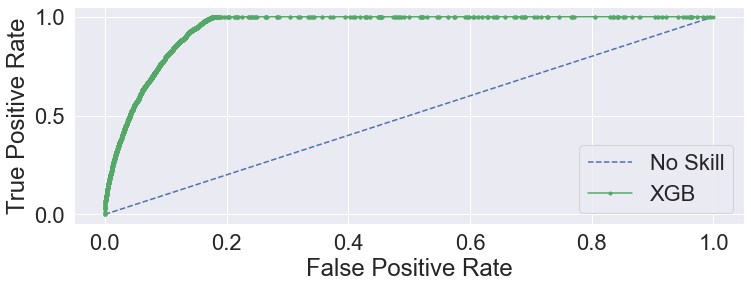

In [184]:
# predict probabilities
lr_probs = xgb.predict_proba(X_SMOTE_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_SMOTE_test, ns_probs)
lr_auc = roc_auc_score(y_SMOTE_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_SMOTE_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_SMOTE_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(12,4))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Gradient Boost

In [185]:
#from sklearn.ensemble import GradientBoostingClassifier

In [186]:
model_gb =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
model_gb.fit(X_SMOTE_train, y_SMOTE_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [187]:
prediction_gb = model_gb.predict(X_SMOTE_test)

In [188]:
print(classification_report(y_SMOTE_test,prediction_gb))
gb_pr = evaluate(prediction_gb,y_SMOTE_test)
gb_pr

              precision    recall  f1-score   support

           0       0.99      0.80      0.89     10733
           1       0.83      0.99      0.91     10834

    accuracy                           0.90     21567
   macro avg       0.91      0.90      0.90     21567
weighted avg       0.91      0.90      0.90     21567



{'f1-score': 0.91, 'accuracy': 0.9}

In [189]:
cm_gb = metrics.confusion_matrix(y_SMOTE_test, prediction_gb)
print(cm_gb)

[[ 8601  2132]
 [   58 10776]]


In [190]:
gb_auroc=metrics.roc_auc_score(y_SMOTE_test,prediction_gb)
print(gb_auroc)

0.8980033869927968


In [191]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'auroc': [gb_auroc]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732
2,Decision Tree,0.849489
3,Random Forest,0.796423
4,XGB,0.908756
5,Gradient Boost,0.898003


## Wyniki XGB, GRADIENT BOOST I DECSION TREE WYGLĄDAJA BARDZO DOBRZE. RANDOM FOREST TROCHĘ BRAKUJE DO CELU, A REGRESJA LOGISTYCZNA ZDECYDOWANIE SIĘ NIE SPRAWDZA

## Zrobię teraz redukcję wymariowości i sprawdzę jaki ma ona wypływ na wynik

## PCA

In [192]:
from scipy import stats

z = np.abs(stats.zscore(df1))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

       loan_amnt  funded_amnt      term  int_rate  emp_length  annual_inc  \
0       0.825906     0.818813  0.592557  0.407325    1.454411    0.704875   
1       1.163254     1.168631  1.687601  0.838174    1.306754    0.611271   
2       1.176748     1.182623  0.592557  1.024190    1.454411    0.888153   
3       0.151211     0.119178  0.592557  0.358306    1.454411    0.311737   
4       1.095785     1.098667  1.687601  0.142635    1.161430    0.168766   
...          ...          ...       ...       ...         ...         ...   
42444   1.298193     1.308558  0.592557  0.081123    0.001166    0.642473   
42445   1.095785     1.098667  0.592557  1.019291    1.306754    0.767278   
42446   0.893376     0.888777  0.592557  1.102863    1.306754    0.794736   
42448   0.523484     0.580457  0.592557  0.002449    1.161430    0.218688   
42449   0.825906     0.818813  0.592557  0.337232    1.306754    0.416262   

       loan_status       dti  fico_range_high   pub_rec  ...  \
0         0

In [193]:
#Usuwam ouliers-y
df1_removed_outliers= df1[(z<3).all(axis=1)]

In [194]:
Xp=df1_removed_outliers.drop(['loan_status'],axis=1)

In [195]:
yp=df1_removed_outliers['loan_status']

In [196]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xp)

In [197]:
X_scaled[:5,:5]

array([[-7.98615751e-01, -7.98615751e-01, -4.90446753e-01,
        -2.04397144e-01,  1.51027353e+00],
       [-1.19854492e+00, -1.19854492e+00,  2.03895733e+00,
         1.29580048e+00, -1.28204832e+00],
       [-1.21454209e+00, -1.21454209e+00, -4.90446753e-01,
         1.51985597e+00,  1.51027353e+00],
       [ 1.24258870e-03,  1.24258870e-03, -4.90446753e-01,
         7.17802262e-01,  1.51027353e+00],
       [-1.11855909e+00, -1.11855909e+00,  2.03895733e+00,
         4.58027781e-01, -1.13508401e+00]])

In [198]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [199]:
X_scaled_df.head()

,loan_amnt,funded_amnt,term,int_rate,emp_length,annual_inc,dti,fico_range_high,pub_rec,revol_bal,...,home_ownership_RENT,funded_lev_high_loan,funded_lev_low_loan,emp_lev_experienced,emp_lev_not_experineced,inc_lev_high,inc_lev_low,inc_lev_medium,issue_dy,earliest_cr_y
0,-0.798616,-0.798616,-0.490447,-0.204397,1.510274,-1.163663,2.147566,0.492025,0.0,0.133187,...,0.929713,-0.743426,0.743426,1.042315,-1.042315,-0.536314,1.689250,-1.034844,0.798797,-2.014867
1,-1.198545,-1.198545,2.038957,1.295800,-1.282048,-0.988545,-1.839636,0.635878,0.0,-0.831005,...,0.929713,-0.743426,0.743426,-0.959403,0.959403,-0.536314,1.689250,-1.034844,0.798797,0.290498
2,-1.214542,-1.214542,-0.490447,1.519856,1.510274,-1.506542,-0.684619,0.492025,0.0,-0.728709,...,0.929713,-0.743426,0.743426,1.042315,-1.042315,-0.536314,1.689250,-1.034844,0.798797,0.619836
3,0.001243,0.001243,-0.490447,0.717802,1.510274,-0.428170,1.003022,-0.802655,0.0,-0.515734,...,0.929713,-0.743426,0.743426,1.042315,-1.042315,-0.536314,-0.591979,0.966329,0.798797,-0.203509
4,-1.118559,-1.118559,2.038957,0.458028,-1.135084,0.470765,0.694818,-0.658802,0.0,1.272627,...,0.929713,-0.743426,0.743426,-0.959403,0.959403,-0.536314,-0.591979,0.966329,0.798797,-0.203509


In [200]:
#from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [201]:
pca.components_[0]

array([ 3.55279120e-01,  3.55279120e-01,  1.38430523e-01,  4.81624286e-02,
        2.12878818e-01,  2.76894942e-01,  2.48000055e-02,  9.83067337e-02,
       -1.35525272e-20,  2.16052102e-01,  2.64953202e-02,  3.30872245e-24,
       -2.06795153e-25, -4.64040677e-02,  2.62163734e-02,  1.02080731e-03,
        2.23523014e-02,  9.86076132e-32,  1.23259516e-32,  0.00000000e+00,
        0.00000000e+00,  2.15356483e-01,  0.00000000e+00,  0.00000000e+00,
       -2.15356483e-01,  3.35847197e-01, -3.35847197e-01,  1.97869809e-01,
       -1.97869809e-01,  2.20154990e-01, -2.33619478e-01,  2.14372429e-02,
        6.19827437e-02, -1.97700450e-01])

In [202]:
pca.explained_variance_ratio_

array([2.05687862e-01, 1.46169242e-01, 1.07105631e-01, 8.10949353e-02,
       6.69048375e-02, 5.79038815e-02, 5.57642569e-02, 5.15098351e-02,
       4.95313637e-02, 4.32378492e-02, 3.45196913e-02, 2.52192115e-02,
       2.32433356e-02, 1.58234043e-02, 1.37401694e-02, 7.19155979e-03,
       6.82872680e-03, 6.24444156e-03, 2.27976634e-03, 7.12683456e-33,
       4.07667003e-33, 3.91341695e-33, 1.23262969e-33, 1.23262969e-33,
       1.23262969e-33, 1.23262969e-33, 1.23262969e-33, 1.23262969e-33,
       1.23262969e-33, 1.23262969e-33, 1.23262969e-33, 1.18424991e-33,
       3.88247909e-34, 8.86751784e-35])

In [203]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.20568786, 0.3518571 , 0.45896273, 0.54005767, 0.60696251,
       0.66486639, 0.72063065, 0.77214048, 0.82167184, 0.86490969,
       0.89942938, 0.9246486 , 0.94789193, 0.96371534, 0.97745551,
       0.98464707, 0.99147579, 0.99772023, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

### Przy trzynastym komponencie osiągamy 95%, więc najpierw spróbuję z tą ilością komponentów

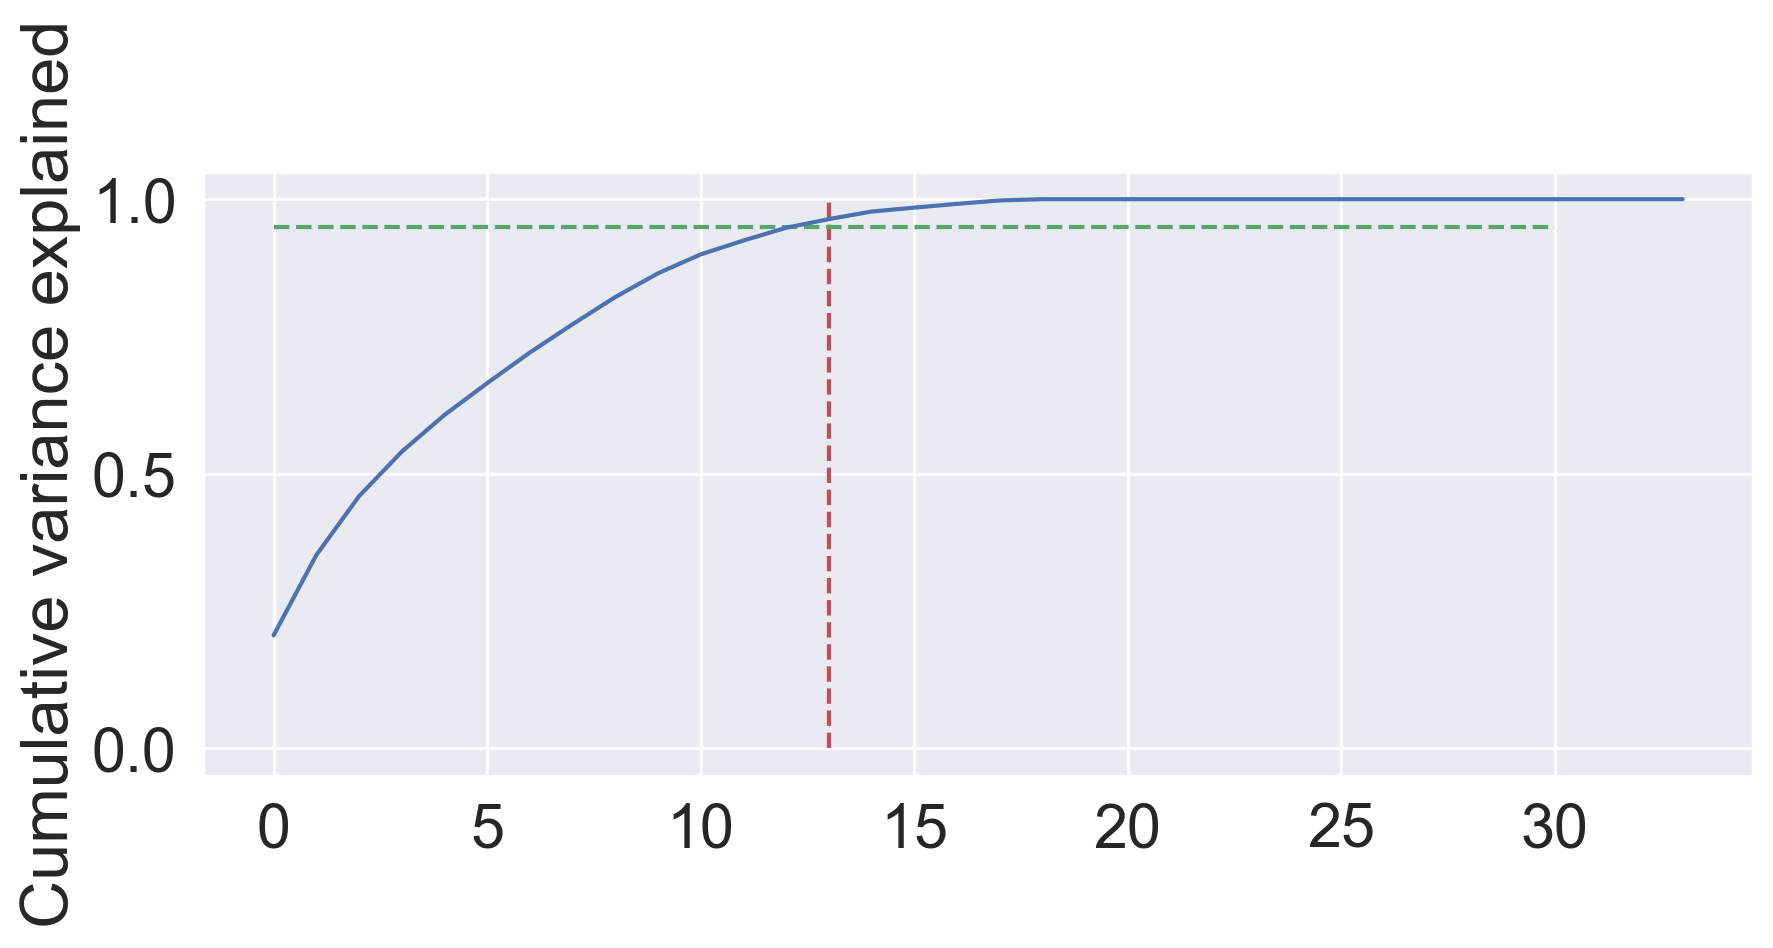

In [204]:
fig = plt.figure(figsize=[10,4],dpi=200)
plt.vlines(x=13, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [205]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=13)
X_pca_final = pca_final.fit_transform(X_scaled)

In [206]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [207]:
corrmat.shape

(13, 13)

<AxesSubplot:>

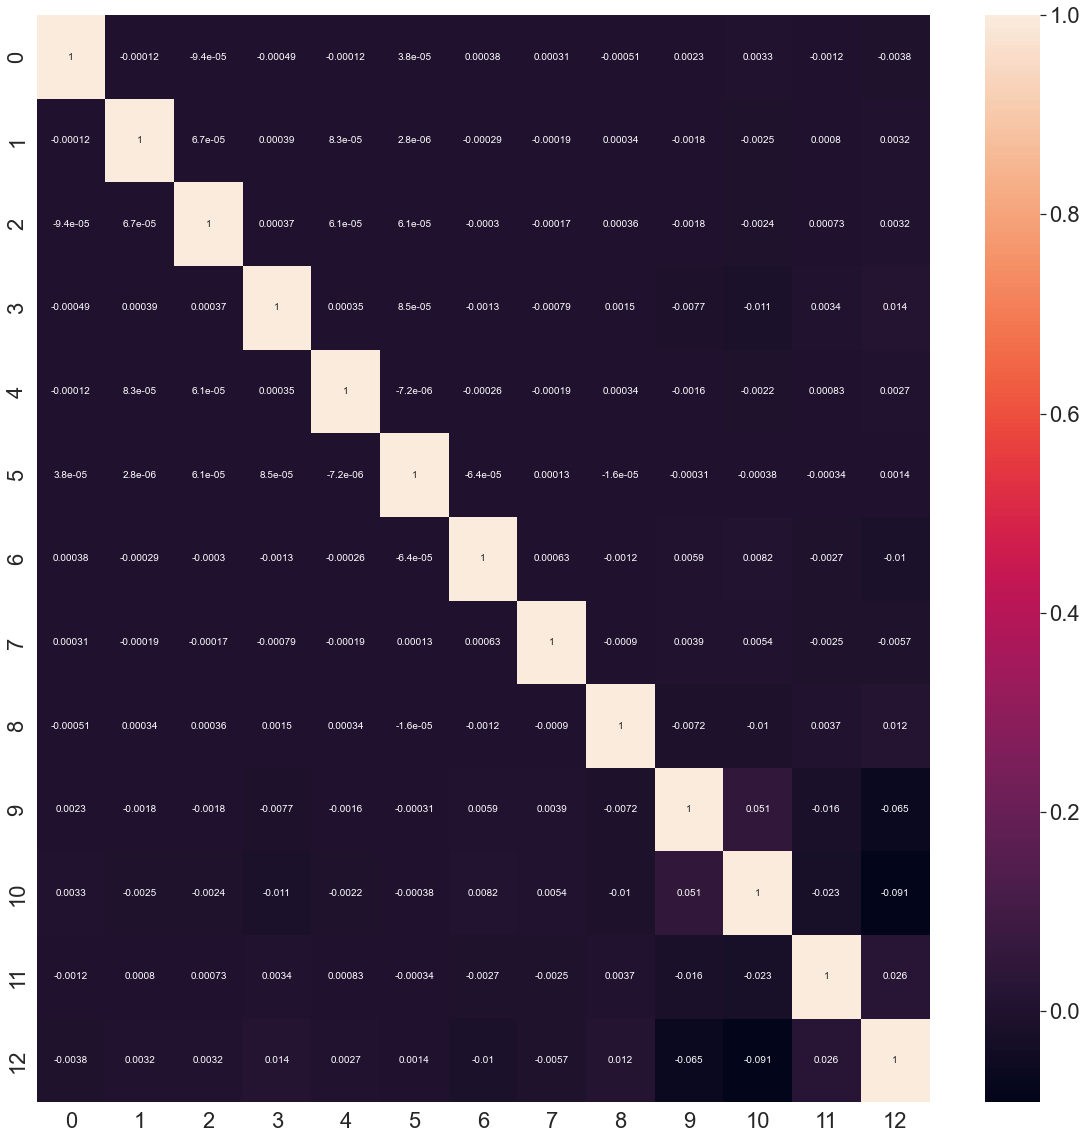

In [208]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True,annot_kws={"size": 10})

# Korelacja między komponentami jest bardzo mała, więc wygląda to prawidłowo

## Sprawdzę teraz jak działają modele po PCA

### Regresja logistyczna, PCA

In [209]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [211]:
X_SMOTE_p, y_SMOTE_p = SMOTE.fit_resample(X_pca_final,yp)

In [212]:
from sklearn.model_selection import train_test_split
X_SMOTE_p_train, X_SMOTE_p_test, y_SMOTE_p_train, y_SMOTE_p_test = train_test_split(X_SMOTE_p, y_SMOTE_p, test_size=0.3)

In [213]:
logisticRegr.fit(X_SMOTE_p_train, y_SMOTE_p_train)

LogisticRegression()

In [214]:
score = logisticRegr.score(X_SMOTE_p_test, y_SMOTE_p_test)
print(score)

0.6218798751950078


In [215]:
predictions_lgp = logisticRegr.predict(X_SMOTE_p_test)

In [216]:
cm_lgp = metrics.confusion_matrix(y_SMOTE_p_test, predictions_lgp)
print(cm)

[[7054 3679]
 [4266 6568]]


In [217]:
lgp_auroc=metrics.roc_auc_score(y_SMOTE_p_test,predictions_lgp)
print(lgp_auroc)

0.621943718993401


In [218]:
metrics.f1_score(y_SMOTE_p_test,predictions_lgp)

0.6095711121551782

In [219]:
tempResultsDf = pd.DataFrame({'Method':['LogisticRegression_PCA'], 'auroc': [lgp_auroc]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732
2,Decision Tree,0.849489
3,Random Forest,0.796423
4,XGB,0.908756
5,Gradient Boost,0.898003
6,LogisticRegression_PCA,0.621944


### Drzewo decyzyjne, PCA

In [220]:
#from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_SMOTE_p_train,y_SMOTE_p_train)

DecisionTreeClassifier()

In [221]:
def evaluate(predictions_dtp,y_SMOTE_p_test): 
    result = classification_report(y_SMOTE_p_test,predictions_dtp,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [222]:
predictions_dtp = dtree.predict(X_SMOTE_p_test)

In [223]:
print(classification_report(y_SMOTE_p_test,predictions_dtp))

dtree_prp= evaluate(predictions_dtp,y_SMOTE_p_test)
dtree_prp

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      7677
           1       0.80      0.73      0.76      7707

    accuracy                           0.77     15384
   macro avg       0.77      0.77      0.77     15384
weighted avg       0.77      0.77      0.77     15384



{'f1-score': 0.76, 'accuracy': 0.77}

In [224]:
cm_dtp = metrics.confusion_matrix(y_SMOTE_p_test, predictions_dtp)
print(cm_dtp)

[[6262 1415]
 [2096 5611]]


In [225]:
dtp_auroc=metrics.roc_auc_score(y_SMOTE_p_test,predictions_dtp)
print(dtp_auroc)

0.7718613271238881


In [226]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree PCA'], 'auroc': [dtp_auroc]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732
2,Decision Tree,0.849489
3,Random Forest,0.796423
4,XGB,0.908756
5,Gradient Boost,0.898003
6,LogisticRegression_PCA,0.621944
7,Decision Tree PCA,0.771861


## Random Forest PCA

In [227]:
rfp = RandomForestClassifier(n_estimators=3)
rfp.fit(X_SMOTE_p_train,y_SMOTE_p_train)

RandomForestClassifier(n_estimators=3)

In [228]:
prediction_rfp = rfp.predict(X_SMOTE_p_test)

In [229]:
print(classification_report(y_SMOTE_p_test,prediction_rfp))
rfp_pr = evaluate(prediction_rfp,y_SMOTE_p_test)
print(rfp_pr)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      7677
           1       0.80      0.72      0.76      7707

    accuracy                           0.77     15384
   macro avg       0.78      0.77      0.77     15384
weighted avg       0.78      0.77      0.77     15384

{'f1-score': 0.76, 'accuracy': 0.77}


In [230]:
cm_rfp = metrics.confusion_matrix(y_SMOTE_p_test, prediction_rfp)
print(cm_rfp)

[[6322 1355]
 [2136 5571]]


In [231]:
rfp_auroc=metrics.roc_auc_score(y_SMOTE_p_test,prediction_rfp)
print(rfp_auroc)

0.7731740601320958


In [232]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest PCA'], 'auroc': [rfp_auroc]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732
2,Decision Tree,0.849489
3,Random Forest,0.796423
4,XGB,0.908756
5,Gradient Boost,0.898003
6,LogisticRegression_PCA,0.621944
7,Decision Tree PCA,0.771861
8,Random Forest PCA,0.773174


### XGB PCA

In [233]:
xgbp = XGBClassifier(n_estimators=100)

In [234]:
model_xgbp=xgb.fit(X_SMOTE_p_train,y_SMOTE_p_train)

prediction_xgbp = xgb.predict(X_SMOTE_p_test)

In [235]:
cm_xgbp = metrics.confusion_matrix(y_SMOTE_p_test, prediction_xgbp)
print(cm_xgbp)

[[6058 1619]
 [2414 5293]]


In [236]:
print(classification_report(y_SMOTE_p_test,prediction_xgbp))
xgbp_pr = evaluate(prediction_xgbp,y_SMOTE_p_test)
xgbp_pr

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      7677
           1       0.77      0.69      0.72      7707

    accuracy                           0.74     15384
   macro avg       0.74      0.74      0.74     15384
weighted avg       0.74      0.74      0.74     15384



{'f1-score': 0.72, 'accuracy': 0.74}

In [237]:
xgbp_auroc=metrics.roc_auc_score(y_SMOTE_p_test,prediction_xgbp)
print(xgbp_auroc)

0.7379442915457815


In [238]:
tempResultsDf = pd.DataFrame({'Method':['XGB PCA'], 'auroc': [xgbp_auroc]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732
2,Decision Tree,0.849489
3,Random Forest,0.796423
4,XGB,0.908756
5,Gradient Boost,0.898003
6,LogisticRegression_PCA,0.621944
7,Decision Tree PCA,0.771861
8,Random Forest PCA,0.773174
9,XGB PCA,0.737944


### Gradient boost PCA

In [239]:
model_gbp =GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1)
model_gbp.fit(X_SMOTE_p_train,y_SMOTE_p_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1)

In [240]:
prediction_gbp = model_gbp.predict(X_SMOTE_p_test)

In [241]:
print(classification_report(y_SMOTE_p_test,prediction_gbp))
gbp_pr = evaluate(prediction_gbp,y_SMOTE_p_test)
gbp_pr

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      7677
           1       0.65      0.60      0.62      7707

    accuracy                           0.64     15384
   macro avg       0.64      0.64      0.64     15384
weighted avg       0.64      0.64      0.64     15384



{'f1-score': 0.62, 'accuracy': 0.64}

In [242]:
cm_gbp = metrics.confusion_matrix(y_SMOTE_p_test, prediction_gbp)
print(cm_gbp)

[[5151 2526]
 [3070 4637]]


In [243]:
gbp_auroc=metrics.roc_auc_score(y_SMOTE_p_test,prediction_gbp)
print(gbp_auroc)

0.6363130243041184


In [244]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost PCA'], 'auroc': [gbp_auroc]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732
2,Decision Tree,0.849489
3,Random Forest,0.796423
4,XGB,0.908756
5,Gradient Boost,0.898003
6,LogisticRegression_PCA,0.621944
7,Decision Tree PCA,0.771861
8,Random Forest PCA,0.773174
9,XGB PCA,0.737944
10,Gradient Boost PCA,0.636313


## Zestawienia wynika, że lepsze wyniki udało się osiągnąć na danych przed PCA i usunięciem outliers-ów wskazanych przez zscore

## Teraz sprawdzę, czy można poprawić wyniki Random Forest oraz XGB

### Użyję najpierw GridSearch dla Random Forest

In [245]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier

In [246]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [247]:
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_SMOTE_train, y_SMOTE_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [248]:
CV_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

### Zmodyfikuję model o otrzymane parametry

In [249]:
rfg = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=8,max_features='sqrt')
rfg.fit(X_SMOTE_train, y_SMOTE_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=200)

In [250]:
prediction_rfg = rfg.predict(X_SMOTE_test)

In [251]:
print(classification_report(y_SMOTE_test,prediction_rfg))
rfg_pr = evaluate(prediction_rfg,y_SMOTE_test)
print(rfg_pr)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     10733
           1       0.84      0.93      0.88     10834

    accuracy                           0.88     21567
   macro avg       0.88      0.88      0.88     21567
weighted avg       0.88      0.88      0.88     21567

{'f1-score': 0.88, 'accuracy': 0.88}


In [252]:
cm_rfg = metrics.confusion_matrix(y_SMOTE_test, prediction_rfg)
print(cm_rfg)

[[ 8823  1910]
 [  753 10081]]


In [253]:
rfg_auroc=metrics.roc_auc_score(y_SMOTE_test,prediction_rfg)
print(rfg_auroc)

0.876270373843875


In [254]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest GR'], 'auroc': [rfg_auroc]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'auroc']]
results

,Method,auroc
1,LogisticRegression,0.631732
2,Decision Tree,0.849489
3,Random Forest,0.796423
4,XGB,0.908756
5,Gradient Boost,0.898003
6,LogisticRegression_PCA,0.621944
7,Decision Tree PCA,0.771861
8,Random Forest PCA,0.773174
9,XGB PCA,0.737944
10,Gradient Boost PCA,0.636313


### Wynik znacznie się poprawił i spełnia teraz założenia projektu

### Teraz użyję learning dla XGB. Modyfikując parametry sprawdzę, czy wartość AUROC się poprawia

In [255]:
model = XGBClassifier(n_estimators=100)

In [262]:
from matplotlib import pyplot

[0]	validation_0-logloss:0.59021	validation_1-logloss:0.61615
[1]	validation_0-logloss:0.52382	validation_1-logloss:0.56446
[2]	validation_0-logloss:0.46963	validation_1-logloss:0.52574


C:\Users\michn\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-logloss:0.42425	validation_1-logloss:0.49081
[4]	validation_0-logloss:0.39188	validation_1-logloss:0.46806
[5]	validation_0-logloss:0.36184	validation_1-logloss:0.44761
[6]	validation_0-logloss:0.33200	validation_1-logloss:0.42560
[7]	validation_0-logloss:0.30288	validation_1-logloss:0.40641
[8]	validation_0-logloss:0.28796	validation_1-logloss:0.39655
[9]	validation_0-logloss:0.26606	validation_1-logloss:0.37989
[10]	validation_0-logloss:0.24865	validation_1-logloss:0.36891
[11]	validation_0-logloss:0.23401	validation_1-logloss:0.35894
[12]	validation_0-logloss:0.22218	validation_1-logloss:0.35024
[13]	validation_0-logloss:0.21338	validation_1-logloss:0.34318
[14]	validation_0-logloss:0.19903	validation_1-logloss:0.33140
[15]	validation_0-logloss:0.18850	validation_1-logloss:0.32548
[16]	validation_0-logloss:0.17522	validation_1-logloss:0.31341
[17]	validation_0-logloss:0.16540	validation_1-logloss:0.30609
[18]	validation_0-logloss:0.16050	validation_1-logloss:0.30252

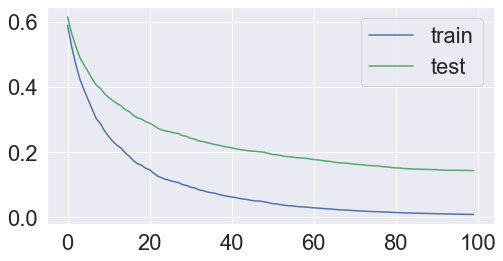

In [274]:
plt.subplots(figsize=(8, 4))
# define dataset
X_SMOTE, y_SMOTE = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0)
# split data into train and test sets
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)
# define the model
model = XGBClassifier(n_estimators=100)
# define the datasets to evaluate each iteration
evalset = [(X_SMOTE_train, y_SMOTE_train), (X_SMOTE_test,y_SMOTE_test)]
# fit the model
model.fit(X_SMOTE_train, y_SMOTE_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_SMOTE_test)
score = roc_auc_score(y_SMOTE_test, yhat)
print('Auroc: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [264]:
model = XGBClassifier(n_estimators=1000, eta=0.05)

[0]	validation_0-logloss:0.67784	validation_1-logloss:0.68067
[1]	validation_0-logloss:0.66383	validation_1-logloss:0.66980
[2]	validation_0-logloss:0.64932	validation_1-logloss:0.65775
[3]	validation_0-logloss:0.63617	validation_1-logloss:0.64644
[4]	validation_0-logloss:0.62382	validation_1-logloss:0.63615
[5]	validation_0-logloss:0.61235	validation_1-logloss:0.62703


C:\Users\michn\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.60181	validation_1-logloss:0.61908
[7]	validation_0-logloss:0.59267	validation_1-logloss:0.61245
[8]	validation_0-logloss:0.58190	validation_1-logloss:0.60334
[9]	validation_0-logloss:0.57183	validation_1-logloss:0.59553
[10]	validation_0-logloss:0.56331	validation_1-logloss:0.58867
[11]	validation_0-logloss:0.55305	validation_1-logloss:0.58016
[12]	validation_0-logloss:0.54502	validation_1-logloss:0.57390
[13]	validation_0-logloss:0.53611	validation_1-logloss:0.56714
[14]	validation_0-logloss:0.52679	validation_1-logloss:0.55911
[15]	validation_0-logloss:0.51813	validation_1-logloss:0.55151
[16]	validation_0-logloss:0.51029	validation_1-logloss:0.54506
[17]	validation_0-logloss:0.50253	validation_1-logloss:0.53867
[18]	validation_0-logloss:0.49497	validation_1-logloss:0.53318
[19]	validation_0-logloss:0.48855	validation_1-logloss:0.52775
[20]	validation_0-logloss:0.48149	validation_1-logloss:0.52216
[21]	validation_0-logloss:0.47451	validation_1-logloss:0.51

[136]	validation_0-logloss:0.16206	validation_1-logloss:0.26281
[137]	validation_0-logloss:0.16122	validation_1-logloss:0.26202
[138]	validation_0-logloss:0.15987	validation_1-logloss:0.26074
[139]	validation_0-logloss:0.15884	validation_1-logloss:0.26001
[140]	validation_0-logloss:0.15771	validation_1-logloss:0.25895
[141]	validation_0-logloss:0.15647	validation_1-logloss:0.25784
[142]	validation_0-logloss:0.15539	validation_1-logloss:0.25731
[143]	validation_0-logloss:0.15424	validation_1-logloss:0.25654
[144]	validation_0-logloss:0.15309	validation_1-logloss:0.25550
[145]	validation_0-logloss:0.15173	validation_1-logloss:0.25431
[146]	validation_0-logloss:0.15062	validation_1-logloss:0.25308
[147]	validation_0-logloss:0.14935	validation_1-logloss:0.25179
[148]	validation_0-logloss:0.14829	validation_1-logloss:0.25090
[149]	validation_0-logloss:0.14755	validation_1-logloss:0.25002
[150]	validation_0-logloss:0.14638	validation_1-logloss:0.24903
[151]	validation_0-logloss:0.14552	valid

[265]	validation_0-logloss:0.07363	validation_1-logloss:0.18606
[266]	validation_0-logloss:0.07313	validation_1-logloss:0.18565
[267]	validation_0-logloss:0.07290	validation_1-logloss:0.18563
[268]	validation_0-logloss:0.07263	validation_1-logloss:0.18537
[269]	validation_0-logloss:0.07240	validation_1-logloss:0.18509
[270]	validation_0-logloss:0.07201	validation_1-logloss:0.18464
[271]	validation_0-logloss:0.07169	validation_1-logloss:0.18423
[272]	validation_0-logloss:0.07125	validation_1-logloss:0.18379
[273]	validation_0-logloss:0.07094	validation_1-logloss:0.18338
[274]	validation_0-logloss:0.07062	validation_1-logloss:0.18318
[275]	validation_0-logloss:0.07011	validation_1-logloss:0.18269
[276]	validation_0-logloss:0.06971	validation_1-logloss:0.18221
[277]	validation_0-logloss:0.06929	validation_1-logloss:0.18181
[278]	validation_0-logloss:0.06887	validation_1-logloss:0.18131
[279]	validation_0-logloss:0.06867	validation_1-logloss:0.18108
[280]	validation_0-logloss:0.06814	valid

[394]	validation_0-logloss:0.03901	validation_1-logloss:0.15026
[395]	validation_0-logloss:0.03881	validation_1-logloss:0.15005
[396]	validation_0-logloss:0.03862	validation_1-logloss:0.14974
[397]	validation_0-logloss:0.03839	validation_1-logloss:0.14944
[398]	validation_0-logloss:0.03819	validation_1-logloss:0.14912
[399]	validation_0-logloss:0.03796	validation_1-logloss:0.14877
[400]	validation_0-logloss:0.03780	validation_1-logloss:0.14871
[401]	validation_0-logloss:0.03761	validation_1-logloss:0.14850
[402]	validation_0-logloss:0.03744	validation_1-logloss:0.14818
[403]	validation_0-logloss:0.03731	validation_1-logloss:0.14815
[404]	validation_0-logloss:0.03713	validation_1-logloss:0.14797
[405]	validation_0-logloss:0.03693	validation_1-logloss:0.14778
[406]	validation_0-logloss:0.03673	validation_1-logloss:0.14748
[407]	validation_0-logloss:0.03647	validation_1-logloss:0.14717
[408]	validation_0-logloss:0.03628	validation_1-logloss:0.14688
[409]	validation_0-logloss:0.03614	valid

[523]	validation_0-logloss:0.02269	validation_1-logloss:0.12934
[524]	validation_0-logloss:0.02260	validation_1-logloss:0.12921
[525]	validation_0-logloss:0.02251	validation_1-logloss:0.12903
[526]	validation_0-logloss:0.02244	validation_1-logloss:0.12897
[527]	validation_0-logloss:0.02234	validation_1-logloss:0.12868
[528]	validation_0-logloss:0.02228	validation_1-logloss:0.12862
[529]	validation_0-logloss:0.02218	validation_1-logloss:0.12842
[530]	validation_0-logloss:0.02207	validation_1-logloss:0.12823
[531]	validation_0-logloss:0.02196	validation_1-logloss:0.12804
[532]	validation_0-logloss:0.02189	validation_1-logloss:0.12790
[533]	validation_0-logloss:0.02178	validation_1-logloss:0.12780
[534]	validation_0-logloss:0.02169	validation_1-logloss:0.12771
[535]	validation_0-logloss:0.02163	validation_1-logloss:0.12757
[536]	validation_0-logloss:0.02154	validation_1-logloss:0.12748
[537]	validation_0-logloss:0.02145	validation_1-logloss:0.12732
[538]	validation_0-logloss:0.02136	valid

[652]	validation_0-logloss:0.01447	validation_1-logloss:0.11664
[653]	validation_0-logloss:0.01443	validation_1-logloss:0.11661
[654]	validation_0-logloss:0.01438	validation_1-logloss:0.11651
[655]	validation_0-logloss:0.01434	validation_1-logloss:0.11642
[656]	validation_0-logloss:0.01430	validation_1-logloss:0.11636
[657]	validation_0-logloss:0.01425	validation_1-logloss:0.11628
[658]	validation_0-logloss:0.01420	validation_1-logloss:0.11613
[659]	validation_0-logloss:0.01418	validation_1-logloss:0.11607
[660]	validation_0-logloss:0.01415	validation_1-logloss:0.11602
[661]	validation_0-logloss:0.01410	validation_1-logloss:0.11596
[662]	validation_0-logloss:0.01406	validation_1-logloss:0.11591
[663]	validation_0-logloss:0.01401	validation_1-logloss:0.11583
[664]	validation_0-logloss:0.01399	validation_1-logloss:0.11582
[665]	validation_0-logloss:0.01395	validation_1-logloss:0.11576
[666]	validation_0-logloss:0.01391	validation_1-logloss:0.11574
[667]	validation_0-logloss:0.01387	valid

[781]	validation_0-logloss:0.01019	validation_1-logloss:0.10919
[782]	validation_0-logloss:0.01016	validation_1-logloss:0.10921
[783]	validation_0-logloss:0.01013	validation_1-logloss:0.10910
[784]	validation_0-logloss:0.01011	validation_1-logloss:0.10900
[785]	validation_0-logloss:0.01009	validation_1-logloss:0.10899
[786]	validation_0-logloss:0.01008	validation_1-logloss:0.10897
[787]	validation_0-logloss:0.01006	validation_1-logloss:0.10892
[788]	validation_0-logloss:0.01004	validation_1-logloss:0.10890
[789]	validation_0-logloss:0.01003	validation_1-logloss:0.10886
[790]	validation_0-logloss:0.01001	validation_1-logloss:0.10887
[791]	validation_0-logloss:0.00999	validation_1-logloss:0.10879
[792]	validation_0-logloss:0.00997	validation_1-logloss:0.10879
[793]	validation_0-logloss:0.00994	validation_1-logloss:0.10882
[794]	validation_0-logloss:0.00992	validation_1-logloss:0.10879
[795]	validation_0-logloss:0.00989	validation_1-logloss:0.10869
[796]	validation_0-logloss:0.00987	valid

[910]	validation_0-logloss:0.00771	validation_1-logloss:0.10539
[911]	validation_0-logloss:0.00769	validation_1-logloss:0.10533
[912]	validation_0-logloss:0.00767	validation_1-logloss:0.10522
[913]	validation_0-logloss:0.00766	validation_1-logloss:0.10519
[914]	validation_0-logloss:0.00765	validation_1-logloss:0.10519
[915]	validation_0-logloss:0.00763	validation_1-logloss:0.10516
[916]	validation_0-logloss:0.00762	validation_1-logloss:0.10509
[917]	validation_0-logloss:0.00760	validation_1-logloss:0.10510
[918]	validation_0-logloss:0.00759	validation_1-logloss:0.10500
[919]	validation_0-logloss:0.00757	validation_1-logloss:0.10497
[920]	validation_0-logloss:0.00756	validation_1-logloss:0.10498
[921]	validation_0-logloss:0.00754	validation_1-logloss:0.10490
[922]	validation_0-logloss:0.00753	validation_1-logloss:0.10483
[923]	validation_0-logloss:0.00751	validation_1-logloss:0.10479
[924]	validation_0-logloss:0.00749	validation_1-logloss:0.10475
[925]	validation_0-logloss:0.00748	valid

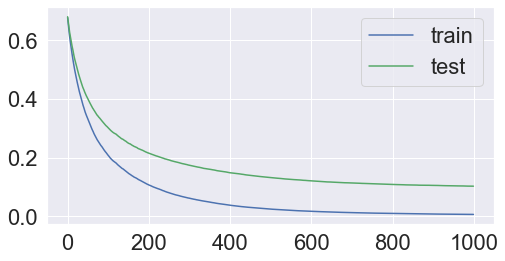

In [277]:
plt.subplots(figsize=(8, 4))
X_SMOTE, y_SMOTE = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0)
# split data into train and test sets
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)
# define the model
model = model = XGBClassifier(n_estimators=1000, eta=0.05, subsample=0.5, colsample_bytree=0.5)
# define the datasets to evaluate each iteration
evalset = [(X_SMOTE_train, y_SMOTE_train), (X_SMOTE_test,y_SMOTE_test)]
# fit the model
model.fit(X_SMOTE_train, y_SMOTE_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_SMOTE_test)
score = roc_auc_score(y_SMOTE_test, yhat)
print('Auroc: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [266]:
model = XGBClassifier(n_estimators=2000, eta=0.02, subsample=0.5, colsample_bytree=0.5)

[0]	validation_0-logloss:0.68208	validation_1-logloss:0.68492


C:\Users\michn\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.66963	validation_1-logloss:0.67454
[2]	validation_0-logloss:0.65883	validation_1-logloss:0.66673
[3]	validation_0-logloss:0.64669	validation_1-logloss:0.65609
[4]	validation_0-logloss:0.63519	validation_1-logloss:0.64653
[5]	validation_0-logloss:0.62180	validation_1-logloss:0.63588
[6]	validation_0-logloss:0.61090	validation_1-logloss:0.62764
[7]	validation_0-logloss:0.60165	validation_1-logloss:0.62126
[8]	validation_0-logloss:0.59006	validation_1-logloss:0.61161
[9]	validation_0-logloss:0.58155	validation_1-logloss:0.60435
[10]	validation_0-logloss:0.57227	validation_1-logloss:0.59709
[11]	validation_0-logloss:0.56290	validation_1-logloss:0.58903
[12]	validation_0-logloss:0.55280	validation_1-logloss:0.58151
[13]	validation_0-logloss:0.54578	validation_1-logloss:0.57648
[14]	validation_0-logloss:0.53770	validation_1-logloss:0.57092
[15]	validation_0-logloss:0.52795	validation_1-logloss:0.56268
[16]	validation_0-logloss:0.52024	validation_1-logloss:0.55684
[

[131]	validation_0-logloss:0.18204	validation_1-logloss:0.29097
[132]	validation_0-logloss:0.18083	validation_1-logloss:0.29004
[133]	validation_0-logloss:0.17970	validation_1-logloss:0.28904
[134]	validation_0-logloss:0.17834	validation_1-logloss:0.28757
[135]	validation_0-logloss:0.17727	validation_1-logloss:0.28656
[136]	validation_0-logloss:0.17628	validation_1-logloss:0.28597
[137]	validation_0-logloss:0.17564	validation_1-logloss:0.28546
[138]	validation_0-logloss:0.17481	validation_1-logloss:0.28466
[139]	validation_0-logloss:0.17431	validation_1-logloss:0.28424
[140]	validation_0-logloss:0.17349	validation_1-logloss:0.28357
[141]	validation_0-logloss:0.17260	validation_1-logloss:0.28287
[142]	validation_0-logloss:0.17144	validation_1-logloss:0.28177
[143]	validation_0-logloss:0.17019	validation_1-logloss:0.28072
[144]	validation_0-logloss:0.16911	validation_1-logloss:0.27979
[145]	validation_0-logloss:0.16808	validation_1-logloss:0.27898
[146]	validation_0-logloss:0.16652	valid

[260]	validation_0-logloss:0.08757	validation_1-logloss:0.21135
[261]	validation_0-logloss:0.08689	validation_1-logloss:0.21079
[262]	validation_0-logloss:0.08648	validation_1-logloss:0.21039
[263]	validation_0-logloss:0.08587	validation_1-logloss:0.20964
[264]	validation_0-logloss:0.08525	validation_1-logloss:0.20912
[265]	validation_0-logloss:0.08491	validation_1-logloss:0.20887
[266]	validation_0-logloss:0.08436	validation_1-logloss:0.20834
[267]	validation_0-logloss:0.08386	validation_1-logloss:0.20773
[268]	validation_0-logloss:0.08329	validation_1-logloss:0.20718
[269]	validation_0-logloss:0.08286	validation_1-logloss:0.20677
[270]	validation_0-logloss:0.08260	validation_1-logloss:0.20665
[271]	validation_0-logloss:0.08250	validation_1-logloss:0.20661
[272]	validation_0-logloss:0.08217	validation_1-logloss:0.20624
[273]	validation_0-logloss:0.08150	validation_1-logloss:0.20544
[274]	validation_0-logloss:0.08098	validation_1-logloss:0.20478
[275]	validation_0-logloss:0.08047	valid

[389]	validation_0-logloss:0.04433	validation_1-logloss:0.16621
[390]	validation_0-logloss:0.04417	validation_1-logloss:0.16588
[391]	validation_0-logloss:0.04395	validation_1-logloss:0.16558
[392]	validation_0-logloss:0.04369	validation_1-logloss:0.16527
[393]	validation_0-logloss:0.04345	validation_1-logloss:0.16498
[394]	validation_0-logloss:0.04321	validation_1-logloss:0.16459
[395]	validation_0-logloss:0.04294	validation_1-logloss:0.16429
[396]	validation_0-logloss:0.04283	validation_1-logloss:0.16417
[397]	validation_0-logloss:0.04273	validation_1-logloss:0.16413
[398]	validation_0-logloss:0.04253	validation_1-logloss:0.16377
[399]	validation_0-logloss:0.04228	validation_1-logloss:0.16344
[400]	validation_0-logloss:0.04216	validation_1-logloss:0.16337
[401]	validation_0-logloss:0.04198	validation_1-logloss:0.16316
[402]	validation_0-logloss:0.04183	validation_1-logloss:0.16294
[403]	validation_0-logloss:0.04159	validation_1-logloss:0.16250
[404]	validation_0-logloss:0.04142	valid

[518]	validation_0-logloss:0.02561	validation_1-logloss:0.14216
[519]	validation_0-logloss:0.02551	validation_1-logloss:0.14211
[520]	validation_0-logloss:0.02540	validation_1-logloss:0.14209
[521]	validation_0-logloss:0.02530	validation_1-logloss:0.14189
[522]	validation_0-logloss:0.02522	validation_1-logloss:0.14180
[523]	validation_0-logloss:0.02512	validation_1-logloss:0.14161
[524]	validation_0-logloss:0.02507	validation_1-logloss:0.14158
[525]	validation_0-logloss:0.02495	validation_1-logloss:0.14163
[526]	validation_0-logloss:0.02488	validation_1-logloss:0.14150
[527]	validation_0-logloss:0.02481	validation_1-logloss:0.14149
[528]	validation_0-logloss:0.02473	validation_1-logloss:0.14138
[529]	validation_0-logloss:0.02466	validation_1-logloss:0.14130
[530]	validation_0-logloss:0.02455	validation_1-logloss:0.14106
[531]	validation_0-logloss:0.02445	validation_1-logloss:0.14098
[532]	validation_0-logloss:0.02433	validation_1-logloss:0.14079
[533]	validation_0-logloss:0.02422	valid

[647]	validation_0-logloss:0.01619	validation_1-logloss:0.12888
[648]	validation_0-logloss:0.01613	validation_1-logloss:0.12872
[649]	validation_0-logloss:0.01609	validation_1-logloss:0.12858
[650]	validation_0-logloss:0.01603	validation_1-logloss:0.12842
[651]	validation_0-logloss:0.01598	validation_1-logloss:0.12836
[652]	validation_0-logloss:0.01591	validation_1-logloss:0.12827
[653]	validation_0-logloss:0.01586	validation_1-logloss:0.12826
[654]	validation_0-logloss:0.01582	validation_1-logloss:0.12813
[655]	validation_0-logloss:0.01576	validation_1-logloss:0.12803
[656]	validation_0-logloss:0.01572	validation_1-logloss:0.12801
[657]	validation_0-logloss:0.01566	validation_1-logloss:0.12794
[658]	validation_0-logloss:0.01564	validation_1-logloss:0.12793
[659]	validation_0-logloss:0.01559	validation_1-logloss:0.12797
[660]	validation_0-logloss:0.01556	validation_1-logloss:0.12791
[661]	validation_0-logloss:0.01551	validation_1-logloss:0.12779
[662]	validation_0-logloss:0.01547	valid

[776]	validation_0-logloss:0.01121	validation_1-logloss:0.12057
[777]	validation_0-logloss:0.01118	validation_1-logloss:0.12056
[778]	validation_0-logloss:0.01116	validation_1-logloss:0.12053
[779]	validation_0-logloss:0.01113	validation_1-logloss:0.12042
[780]	validation_0-logloss:0.01110	validation_1-logloss:0.12030
[781]	validation_0-logloss:0.01108	validation_1-logloss:0.12024
[782]	validation_0-logloss:0.01104	validation_1-logloss:0.12009
[783]	validation_0-logloss:0.01101	validation_1-logloss:0.12009
[784]	validation_0-logloss:0.01100	validation_1-logloss:0.12004
[785]	validation_0-logloss:0.01097	validation_1-logloss:0.12005
[786]	validation_0-logloss:0.01094	validation_1-logloss:0.12001
[787]	validation_0-logloss:0.01091	validation_1-logloss:0.11986
[788]	validation_0-logloss:0.01089	validation_1-logloss:0.11988
[789]	validation_0-logloss:0.01086	validation_1-logloss:0.11978
[790]	validation_0-logloss:0.01083	validation_1-logloss:0.11971
[791]	validation_0-logloss:0.01080	valid

[905]	validation_0-logloss:0.00841	validation_1-logloss:0.11504
[906]	validation_0-logloss:0.00840	validation_1-logloss:0.11506
[907]	validation_0-logloss:0.00838	validation_1-logloss:0.11505
[908]	validation_0-logloss:0.00836	validation_1-logloss:0.11502
[909]	validation_0-logloss:0.00835	validation_1-logloss:0.11499
[910]	validation_0-logloss:0.00833	validation_1-logloss:0.11494
[911]	validation_0-logloss:0.00831	validation_1-logloss:0.11488
[912]	validation_0-logloss:0.00830	validation_1-logloss:0.11483
[913]	validation_0-logloss:0.00828	validation_1-logloss:0.11479
[914]	validation_0-logloss:0.00826	validation_1-logloss:0.11484
[915]	validation_0-logloss:0.00825	validation_1-logloss:0.11476
[916]	validation_0-logloss:0.00823	validation_1-logloss:0.11473
[917]	validation_0-logloss:0.00822	validation_1-logloss:0.11470
[918]	validation_0-logloss:0.00820	validation_1-logloss:0.11463
[919]	validation_0-logloss:0.00818	validation_1-logloss:0.11458
[920]	validation_0-logloss:0.00816	valid

[1033]	validation_0-logloss:0.00667	validation_1-logloss:0.11121
[1034]	validation_0-logloss:0.00665	validation_1-logloss:0.11122
[1035]	validation_0-logloss:0.00664	validation_1-logloss:0.11118
[1036]	validation_0-logloss:0.00663	validation_1-logloss:0.11109
[1037]	validation_0-logloss:0.00662	validation_1-logloss:0.11108
[1038]	validation_0-logloss:0.00661	validation_1-logloss:0.11106
[1039]	validation_0-logloss:0.00660	validation_1-logloss:0.11102
[1040]	validation_0-logloss:0.00659	validation_1-logloss:0.11096
[1041]	validation_0-logloss:0.00658	validation_1-logloss:0.11097
[1042]	validation_0-logloss:0.00657	validation_1-logloss:0.11104
[1043]	validation_0-logloss:0.00657	validation_1-logloss:0.11101
[1044]	validation_0-logloss:0.00655	validation_1-logloss:0.11102
[1045]	validation_0-logloss:0.00654	validation_1-logloss:0.11096
[1046]	validation_0-logloss:0.00653	validation_1-logloss:0.11090
[1047]	validation_0-logloss:0.00652	validation_1-logloss:0.11087
[1048]	validation_0-loglo

[1159]	validation_0-logloss:0.00552	validation_1-logloss:0.10927
[1160]	validation_0-logloss:0.00552	validation_1-logloss:0.10917
[1161]	validation_0-logloss:0.00551	validation_1-logloss:0.10913
[1162]	validation_0-logloss:0.00550	validation_1-logloss:0.10917
[1163]	validation_0-logloss:0.00549	validation_1-logloss:0.10917
[1164]	validation_0-logloss:0.00548	validation_1-logloss:0.10916
[1165]	validation_0-logloss:0.00548	validation_1-logloss:0.10912
[1166]	validation_0-logloss:0.00547	validation_1-logloss:0.10913
[1167]	validation_0-logloss:0.00546	validation_1-logloss:0.10915
[1168]	validation_0-logloss:0.00545	validation_1-logloss:0.10913
[1169]	validation_0-logloss:0.00544	validation_1-logloss:0.10910
[1170]	validation_0-logloss:0.00544	validation_1-logloss:0.10910
[1171]	validation_0-logloss:0.00543	validation_1-logloss:0.10910
[1172]	validation_0-logloss:0.00542	validation_1-logloss:0.10913
[1173]	validation_0-logloss:0.00542	validation_1-logloss:0.10915
[1174]	validation_0-loglo

[1285]	validation_0-logloss:0.00471	validation_1-logloss:0.10692
[1286]	validation_0-logloss:0.00470	validation_1-logloss:0.10689
[1287]	validation_0-logloss:0.00469	validation_1-logloss:0.10686
[1288]	validation_0-logloss:0.00469	validation_1-logloss:0.10689
[1289]	validation_0-logloss:0.00468	validation_1-logloss:0.10687
[1290]	validation_0-logloss:0.00468	validation_1-logloss:0.10685
[1291]	validation_0-logloss:0.00468	validation_1-logloss:0.10686
[1292]	validation_0-logloss:0.00467	validation_1-logloss:0.10678
[1293]	validation_0-logloss:0.00466	validation_1-logloss:0.10676
[1294]	validation_0-logloss:0.00466	validation_1-logloss:0.10671
[1295]	validation_0-logloss:0.00465	validation_1-logloss:0.10675
[1296]	validation_0-logloss:0.00465	validation_1-logloss:0.10674
[1297]	validation_0-logloss:0.00464	validation_1-logloss:0.10675
[1298]	validation_0-logloss:0.00464	validation_1-logloss:0.10673
[1299]	validation_0-logloss:0.00463	validation_1-logloss:0.10671
[1300]	validation_0-loglo

[1412]	validation_0-logloss:0.00411	validation_1-logloss:0.10513
[1413]	validation_0-logloss:0.00411	validation_1-logloss:0.10511
[1414]	validation_0-logloss:0.00411	validation_1-logloss:0.10512
[1415]	validation_0-logloss:0.00410	validation_1-logloss:0.10513
[1416]	validation_0-logloss:0.00410	validation_1-logloss:0.10512
[1417]	validation_0-logloss:0.00409	validation_1-logloss:0.10508
[1418]	validation_0-logloss:0.00409	validation_1-logloss:0.10511
[1419]	validation_0-logloss:0.00409	validation_1-logloss:0.10515
[1420]	validation_0-logloss:0.00408	validation_1-logloss:0.10510
[1421]	validation_0-logloss:0.00408	validation_1-logloss:0.10512
[1422]	validation_0-logloss:0.00408	validation_1-logloss:0.10516
[1423]	validation_0-logloss:0.00407	validation_1-logloss:0.10517
[1424]	validation_0-logloss:0.00407	validation_1-logloss:0.10516
[1425]	validation_0-logloss:0.00407	validation_1-logloss:0.10513
[1426]	validation_0-logloss:0.00406	validation_1-logloss:0.10512
[1427]	validation_0-loglo

[1538]	validation_0-logloss:0.00368	validation_1-logloss:0.10379
[1539]	validation_0-logloss:0.00368	validation_1-logloss:0.10381
[1540]	validation_0-logloss:0.00367	validation_1-logloss:0.10379
[1541]	validation_0-logloss:0.00367	validation_1-logloss:0.10375
[1542]	validation_0-logloss:0.00367	validation_1-logloss:0.10374
[1543]	validation_0-logloss:0.00367	validation_1-logloss:0.10377
[1544]	validation_0-logloss:0.00366	validation_1-logloss:0.10370
[1545]	validation_0-logloss:0.00366	validation_1-logloss:0.10367
[1546]	validation_0-logloss:0.00366	validation_1-logloss:0.10362
[1547]	validation_0-logloss:0.00365	validation_1-logloss:0.10360
[1548]	validation_0-logloss:0.00365	validation_1-logloss:0.10355
[1549]	validation_0-logloss:0.00365	validation_1-logloss:0.10357
[1550]	validation_0-logloss:0.00364	validation_1-logloss:0.10359
[1551]	validation_0-logloss:0.00364	validation_1-logloss:0.10356
[1552]	validation_0-logloss:0.00364	validation_1-logloss:0.10361
[1553]	validation_0-loglo

[1665]	validation_0-logloss:0.00333	validation_1-logloss:0.10238
[1666]	validation_0-logloss:0.00333	validation_1-logloss:0.10238
[1667]	validation_0-logloss:0.00333	validation_1-logloss:0.10236
[1668]	validation_0-logloss:0.00332	validation_1-logloss:0.10233
[1669]	validation_0-logloss:0.00332	validation_1-logloss:0.10239
[1670]	validation_0-logloss:0.00332	validation_1-logloss:0.10239
[1671]	validation_0-logloss:0.00331	validation_1-logloss:0.10237
[1672]	validation_0-logloss:0.00331	validation_1-logloss:0.10239
[1673]	validation_0-logloss:0.00331	validation_1-logloss:0.10233
[1674]	validation_0-logloss:0.00331	validation_1-logloss:0.10229
[1675]	validation_0-logloss:0.00331	validation_1-logloss:0.10231
[1676]	validation_0-logloss:0.00330	validation_1-logloss:0.10230
[1677]	validation_0-logloss:0.00330	validation_1-logloss:0.10233
[1678]	validation_0-logloss:0.00330	validation_1-logloss:0.10237
[1679]	validation_0-logloss:0.00330	validation_1-logloss:0.10235
[1680]	validation_0-loglo

[1791]	validation_0-logloss:0.00305	validation_1-logloss:0.10174
[1792]	validation_0-logloss:0.00305	validation_1-logloss:0.10174
[1793]	validation_0-logloss:0.00304	validation_1-logloss:0.10173
[1794]	validation_0-logloss:0.00304	validation_1-logloss:0.10174
[1795]	validation_0-logloss:0.00304	validation_1-logloss:0.10173
[1796]	validation_0-logloss:0.00304	validation_1-logloss:0.10174
[1797]	validation_0-logloss:0.00304	validation_1-logloss:0.10172
[1798]	validation_0-logloss:0.00303	validation_1-logloss:0.10174
[1799]	validation_0-logloss:0.00303	validation_1-logloss:0.10173
[1800]	validation_0-logloss:0.00303	validation_1-logloss:0.10174
[1801]	validation_0-logloss:0.00303	validation_1-logloss:0.10174
[1802]	validation_0-logloss:0.00303	validation_1-logloss:0.10170
[1803]	validation_0-logloss:0.00302	validation_1-logloss:0.10172
[1804]	validation_0-logloss:0.00302	validation_1-logloss:0.10174
[1805]	validation_0-logloss:0.00302	validation_1-logloss:0.10171
[1806]	validation_0-loglo

[1918]	validation_0-logloss:0.00282	validation_1-logloss:0.10158
[1919]	validation_0-logloss:0.00282	validation_1-logloss:0.10159
[1920]	validation_0-logloss:0.00282	validation_1-logloss:0.10161
[1921]	validation_0-logloss:0.00282	validation_1-logloss:0.10158
[1922]	validation_0-logloss:0.00282	validation_1-logloss:0.10156
[1923]	validation_0-logloss:0.00281	validation_1-logloss:0.10153
[1924]	validation_0-logloss:0.00281	validation_1-logloss:0.10152
[1925]	validation_0-logloss:0.00281	validation_1-logloss:0.10148
[1926]	validation_0-logloss:0.00281	validation_1-logloss:0.10142
[1927]	validation_0-logloss:0.00281	validation_1-logloss:0.10140
[1928]	validation_0-logloss:0.00280	validation_1-logloss:0.10142
[1929]	validation_0-logloss:0.00280	validation_1-logloss:0.10143
[1930]	validation_0-logloss:0.00280	validation_1-logloss:0.10144
[1931]	validation_0-logloss:0.00280	validation_1-logloss:0.10143
[1932]	validation_0-logloss:0.00280	validation_1-logloss:0.10141
[1933]	validation_0-loglo

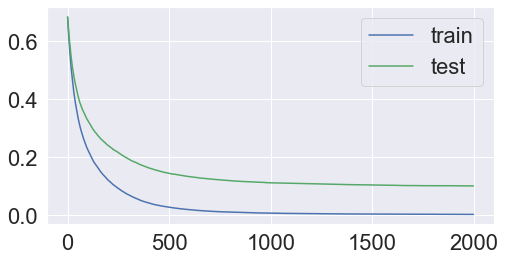

In [279]:
plt.subplots(figsize=(8, 4))
X_SMOTE, y_SMOTE = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0)
# split data into train and test sets
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)
# define the model
model = XGBClassifier(n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)
# define the datasets to evaluate each iteration
evalset = [(X_SMOTE_train, y_SMOTE_train), (X_SMOTE_test,y_SMOTE_test)]
# fit the model
model.fit(X_SMOTE_train, y_SMOTE_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_SMOTE_test)
score = roc_auc_score(y_SMOTE_test, yhat)
print('Auroc: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [268]:
model = XGBClassifier(n_estimators=5000, eta=0.02, subsample=0.5, colsample_bytree=0.5)

[0]	validation_0-logloss:0.67941	validation_1-logloss:0.68178
[1]	validation_0-logloss:0.66642	validation_1-logloss:0.67148
[2]	validation_0-logloss:0.65235	validation_1-logloss:0.65921
[3]	validation_0-logloss:0.63962	validation_1-logloss:0.64858
[4]	validation_0-logloss:0.62689	validation_1-logloss:0.63738


C:\Users\michn\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-logloss:0.61571	validation_1-logloss:0.62939
[6]	validation_0-logloss:0.60462	validation_1-logloss:0.62092
[7]	validation_0-logloss:0.59311	validation_1-logloss:0.61238
[8]	validation_0-logloss:0.58340	validation_1-logloss:0.60412
[9]	validation_0-logloss:0.57206	validation_1-logloss:0.59426
[10]	validation_0-logloss:0.56020	validation_1-logloss:0.58468
[11]	validation_0-logloss:0.55000	validation_1-logloss:0.57602
[12]	validation_0-logloss:0.54075	validation_1-logloss:0.56809
[13]	validation_0-logloss:0.53155	validation_1-logloss:0.56061
[14]	validation_0-logloss:0.52298	validation_1-logloss:0.55385
[15]	validation_0-logloss:0.51426	validation_1-logloss:0.54619
[16]	validation_0-logloss:0.50714	validation_1-logloss:0.54058
[17]	validation_0-logloss:0.49857	validation_1-logloss:0.53369
[18]	validation_0-logloss:0.49117	validation_1-logloss:0.52785
[19]	validation_0-logloss:0.48224	validation_1-logloss:0.51977
[20]	validation_0-logloss:0.47549	validation_1-logloss:0.514

[135]	validation_0-logloss:0.15428	validation_1-logloss:0.24904
[136]	validation_0-logloss:0.15299	validation_1-logloss:0.24799
[137]	validation_0-logloss:0.15207	validation_1-logloss:0.24746
[138]	validation_0-logloss:0.15146	validation_1-logloss:0.24696
[139]	validation_0-logloss:0.15006	validation_1-logloss:0.24588
[140]	validation_0-logloss:0.14869	validation_1-logloss:0.24452
[141]	validation_0-logloss:0.14804	validation_1-logloss:0.24390
[142]	validation_0-logloss:0.14718	validation_1-logloss:0.24322
[143]	validation_0-logloss:0.14614	validation_1-logloss:0.24237
[144]	validation_0-logloss:0.14473	validation_1-logloss:0.24141
[145]	validation_0-logloss:0.14387	validation_1-logloss:0.24078
[146]	validation_0-logloss:0.14247	validation_1-logloss:0.23956
[147]	validation_0-logloss:0.14151	validation_1-logloss:0.23871
[148]	validation_0-logloss:0.14053	validation_1-logloss:0.23766
[149]	validation_0-logloss:0.13965	validation_1-logloss:0.23703
[150]	validation_0-logloss:0.13835	valid

[263]	validation_0-logloss:0.07230	validation_1-logloss:0.17864
[264]	validation_0-logloss:0.07205	validation_1-logloss:0.17837
[265]	validation_0-logloss:0.07171	validation_1-logloss:0.17800
[266]	validation_0-logloss:0.07140	validation_1-logloss:0.17761
[267]	validation_0-logloss:0.07106	validation_1-logloss:0.17722
[268]	validation_0-logloss:0.07078	validation_1-logloss:0.17698
[269]	validation_0-logloss:0.07053	validation_1-logloss:0.17678
[270]	validation_0-logloss:0.07022	validation_1-logloss:0.17645
[271]	validation_0-logloss:0.06996	validation_1-logloss:0.17611
[272]	validation_0-logloss:0.06959	validation_1-logloss:0.17568
[273]	validation_0-logloss:0.06935	validation_1-logloss:0.17546
[274]	validation_0-logloss:0.06898	validation_1-logloss:0.17525
[275]	validation_0-logloss:0.06852	validation_1-logloss:0.17486
[276]	validation_0-logloss:0.06813	validation_1-logloss:0.17443
[277]	validation_0-logloss:0.06764	validation_1-logloss:0.17392
[278]	validation_0-logloss:0.06739	valid

[392]	validation_0-logloss:0.03787	validation_1-logloss:0.14408
[393]	validation_0-logloss:0.03762	validation_1-logloss:0.14387
[394]	validation_0-logloss:0.03750	validation_1-logloss:0.14382
[395]	validation_0-logloss:0.03732	validation_1-logloss:0.14371
[396]	validation_0-logloss:0.03720	validation_1-logloss:0.14371
[397]	validation_0-logloss:0.03712	validation_1-logloss:0.14357
[398]	validation_0-logloss:0.03697	validation_1-logloss:0.14345
[399]	validation_0-logloss:0.03682	validation_1-logloss:0.14333
[400]	validation_0-logloss:0.03670	validation_1-logloss:0.14309
[401]	validation_0-logloss:0.03660	validation_1-logloss:0.14303
[402]	validation_0-logloss:0.03643	validation_1-logloss:0.14289
[403]	validation_0-logloss:0.03627	validation_1-logloss:0.14277
[404]	validation_0-logloss:0.03613	validation_1-logloss:0.14255
[405]	validation_0-logloss:0.03605	validation_1-logloss:0.14248
[406]	validation_0-logloss:0.03596	validation_1-logloss:0.14236
[407]	validation_0-logloss:0.03578	valid

[521]	validation_0-logloss:0.02186	validation_1-logloss:0.12621
[522]	validation_0-logloss:0.02181	validation_1-logloss:0.12612
[523]	validation_0-logloss:0.02170	validation_1-logloss:0.12595
[524]	validation_0-logloss:0.02159	validation_1-logloss:0.12577
[525]	validation_0-logloss:0.02148	validation_1-logloss:0.12568
[526]	validation_0-logloss:0.02141	validation_1-logloss:0.12550
[527]	validation_0-logloss:0.02136	validation_1-logloss:0.12552
[528]	validation_0-logloss:0.02128	validation_1-logloss:0.12551
[529]	validation_0-logloss:0.02123	validation_1-logloss:0.12551
[530]	validation_0-logloss:0.02116	validation_1-logloss:0.12549
[531]	validation_0-logloss:0.02106	validation_1-logloss:0.12545
[532]	validation_0-logloss:0.02097	validation_1-logloss:0.12534
[533]	validation_0-logloss:0.02088	validation_1-logloss:0.12523
[534]	validation_0-logloss:0.02078	validation_1-logloss:0.12509
[535]	validation_0-logloss:0.02067	validation_1-logloss:0.12488
[536]	validation_0-logloss:0.02063	valid

[650]	validation_0-logloss:0.01402	validation_1-logloss:0.11539
[651]	validation_0-logloss:0.01399	validation_1-logloss:0.11545
[652]	validation_0-logloss:0.01395	validation_1-logloss:0.11533
[653]	validation_0-logloss:0.01390	validation_1-logloss:0.11519
[654]	validation_0-logloss:0.01385	validation_1-logloss:0.11510
[655]	validation_0-logloss:0.01382	validation_1-logloss:0.11499
[656]	validation_0-logloss:0.01377	validation_1-logloss:0.11482
[657]	validation_0-logloss:0.01372	validation_1-logloss:0.11471
[658]	validation_0-logloss:0.01368	validation_1-logloss:0.11466
[659]	validation_0-logloss:0.01363	validation_1-logloss:0.11460
[660]	validation_0-logloss:0.01360	validation_1-logloss:0.11456
[661]	validation_0-logloss:0.01356	validation_1-logloss:0.11452
[662]	validation_0-logloss:0.01353	validation_1-logloss:0.11444
[663]	validation_0-logloss:0.01348	validation_1-logloss:0.11433
[664]	validation_0-logloss:0.01343	validation_1-logloss:0.11429
[665]	validation_0-logloss:0.01339	valid

[778]	validation_0-logloss:0.00980	validation_1-logloss:0.10966
[779]	validation_0-logloss:0.00978	validation_1-logloss:0.10966
[780]	validation_0-logloss:0.00975	validation_1-logloss:0.10963
[781]	validation_0-logloss:0.00973	validation_1-logloss:0.10953
[782]	validation_0-logloss:0.00970	validation_1-logloss:0.10942
[783]	validation_0-logloss:0.00967	validation_1-logloss:0.10934
[784]	validation_0-logloss:0.00965	validation_1-logloss:0.10933
[785]	validation_0-logloss:0.00963	validation_1-logloss:0.10923
[786]	validation_0-logloss:0.00961	validation_1-logloss:0.10923
[787]	validation_0-logloss:0.00959	validation_1-logloss:0.10916
[788]	validation_0-logloss:0.00957	validation_1-logloss:0.10914
[789]	validation_0-logloss:0.00954	validation_1-logloss:0.10911
[790]	validation_0-logloss:0.00952	validation_1-logloss:0.10904
[791]	validation_0-logloss:0.00950	validation_1-logloss:0.10906
[792]	validation_0-logloss:0.00948	validation_1-logloss:0.10905
[793]	validation_0-logloss:0.00945	valid

[907]	validation_0-logloss:0.00732	validation_1-logloss:0.10565
[908]	validation_0-logloss:0.00730	validation_1-logloss:0.10559
[909]	validation_0-logloss:0.00729	validation_1-logloss:0.10560
[910]	validation_0-logloss:0.00727	validation_1-logloss:0.10552
[911]	validation_0-logloss:0.00725	validation_1-logloss:0.10553
[912]	validation_0-logloss:0.00724	validation_1-logloss:0.10544
[913]	validation_0-logloss:0.00722	validation_1-logloss:0.10539
[914]	validation_0-logloss:0.00721	validation_1-logloss:0.10529
[915]	validation_0-logloss:0.00720	validation_1-logloss:0.10519
[916]	validation_0-logloss:0.00718	validation_1-logloss:0.10521
[917]	validation_0-logloss:0.00717	validation_1-logloss:0.10518
[918]	validation_0-logloss:0.00715	validation_1-logloss:0.10515
[919]	validation_0-logloss:0.00713	validation_1-logloss:0.10516
[920]	validation_0-logloss:0.00712	validation_1-logloss:0.10514
[921]	validation_0-logloss:0.00710	validation_1-logloss:0.10517
[922]	validation_0-logloss:0.00709	valid

[1035]	validation_0-logloss:0.00578	validation_1-logloss:0.10335
[1036]	validation_0-logloss:0.00577	validation_1-logloss:0.10330
[1037]	validation_0-logloss:0.00576	validation_1-logloss:0.10338
[1038]	validation_0-logloss:0.00576	validation_1-logloss:0.10339
[1039]	validation_0-logloss:0.00574	validation_1-logloss:0.10332
[1040]	validation_0-logloss:0.00573	validation_1-logloss:0.10334
[1041]	validation_0-logloss:0.00573	validation_1-logloss:0.10336
[1042]	validation_0-logloss:0.00572	validation_1-logloss:0.10329
[1043]	validation_0-logloss:0.00571	validation_1-logloss:0.10330
[1044]	validation_0-logloss:0.00570	validation_1-logloss:0.10328
[1045]	validation_0-logloss:0.00569	validation_1-logloss:0.10332
[1046]	validation_0-logloss:0.00569	validation_1-logloss:0.10336
[1047]	validation_0-logloss:0.00568	validation_1-logloss:0.10333
[1048]	validation_0-logloss:0.00567	validation_1-logloss:0.10336
[1049]	validation_0-logloss:0.00566	validation_1-logloss:0.10339
[1050]	validation_0-loglo

[1161]	validation_0-logloss:0.00482	validation_1-logloss:0.10249
[1162]	validation_0-logloss:0.00481	validation_1-logloss:0.10248
[1163]	validation_0-logloss:0.00480	validation_1-logloss:0.10244
[1164]	validation_0-logloss:0.00480	validation_1-logloss:0.10248
[1165]	validation_0-logloss:0.00479	validation_1-logloss:0.10251
[1166]	validation_0-logloss:0.00479	validation_1-logloss:0.10256
[1167]	validation_0-logloss:0.00478	validation_1-logloss:0.10260
[1168]	validation_0-logloss:0.00477	validation_1-logloss:0.10262
[1169]	validation_0-logloss:0.00477	validation_1-logloss:0.10259
[1170]	validation_0-logloss:0.00476	validation_1-logloss:0.10258
[1171]	validation_0-logloss:0.00476	validation_1-logloss:0.10256
[1172]	validation_0-logloss:0.00475	validation_1-logloss:0.10256
[1173]	validation_0-logloss:0.00474	validation_1-logloss:0.10255
[1174]	validation_0-logloss:0.00474	validation_1-logloss:0.10254
[1175]	validation_0-logloss:0.00473	validation_1-logloss:0.10253
[1176]	validation_0-loglo

[1287]	validation_0-logloss:0.00414	validation_1-logloss:0.10142
[1288]	validation_0-logloss:0.00414	validation_1-logloss:0.10140
[1289]	validation_0-logloss:0.00413	validation_1-logloss:0.10140
[1290]	validation_0-logloss:0.00413	validation_1-logloss:0.10139
[1291]	validation_0-logloss:0.00412	validation_1-logloss:0.10138
[1292]	validation_0-logloss:0.00412	validation_1-logloss:0.10137
[1293]	validation_0-logloss:0.00412	validation_1-logloss:0.10142
[1294]	validation_0-logloss:0.00412	validation_1-logloss:0.10141
[1295]	validation_0-logloss:0.00411	validation_1-logloss:0.10138
[1296]	validation_0-logloss:0.00411	validation_1-logloss:0.10133
[1297]	validation_0-logloss:0.00410	validation_1-logloss:0.10132
[1298]	validation_0-logloss:0.00410	validation_1-logloss:0.10133
[1299]	validation_0-logloss:0.00409	validation_1-logloss:0.10133
[1300]	validation_0-logloss:0.00409	validation_1-logloss:0.10130
[1301]	validation_0-logloss:0.00408	validation_1-logloss:0.10132
[1302]	validation_0-loglo

[1414]	validation_0-logloss:0.00364	validation_1-logloss:0.10037
[1415]	validation_0-logloss:0.00364	validation_1-logloss:0.10036
[1416]	validation_0-logloss:0.00364	validation_1-logloss:0.10032
[1417]	validation_0-logloss:0.00363	validation_1-logloss:0.10037
[1418]	validation_0-logloss:0.00363	validation_1-logloss:0.10040
[1419]	validation_0-logloss:0.00363	validation_1-logloss:0.10039
[1420]	validation_0-logloss:0.00362	validation_1-logloss:0.10041
[1421]	validation_0-logloss:0.00362	validation_1-logloss:0.10044
[1422]	validation_0-logloss:0.00362	validation_1-logloss:0.10039
[1423]	validation_0-logloss:0.00361	validation_1-logloss:0.10038
[1424]	validation_0-logloss:0.00361	validation_1-logloss:0.10037
[1425]	validation_0-logloss:0.00361	validation_1-logloss:0.10038
[1426]	validation_0-logloss:0.00360	validation_1-logloss:0.10037
[1427]	validation_0-logloss:0.00360	validation_1-logloss:0.10036
[1428]	validation_0-logloss:0.00360	validation_1-logloss:0.10034
[1429]	validation_0-loglo

[1541]	validation_0-logloss:0.00327	validation_1-logloss:0.09990
[1542]	validation_0-logloss:0.00326	validation_1-logloss:0.09989
[1543]	validation_0-logloss:0.00326	validation_1-logloss:0.09988
[1544]	validation_0-logloss:0.00326	validation_1-logloss:0.09991
[1545]	validation_0-logloss:0.00326	validation_1-logloss:0.09992
[1546]	validation_0-logloss:0.00325	validation_1-logloss:0.09995
[1547]	validation_0-logloss:0.00325	validation_1-logloss:0.09995
[1548]	validation_0-logloss:0.00325	validation_1-logloss:0.09995
[1549]	validation_0-logloss:0.00324	validation_1-logloss:0.09997
[1550]	validation_0-logloss:0.00324	validation_1-logloss:0.09994
[1551]	validation_0-logloss:0.00324	validation_1-logloss:0.09991
[1552]	validation_0-logloss:0.00323	validation_1-logloss:0.09991
[1553]	validation_0-logloss:0.00323	validation_1-logloss:0.09988
[1554]	validation_0-logloss:0.00323	validation_1-logloss:0.09986
[1555]	validation_0-logloss:0.00323	validation_1-logloss:0.09992
[1556]	validation_0-loglo

[1668]	validation_0-logloss:0.00297	validation_1-logloss:0.09974
[1669]	validation_0-logloss:0.00297	validation_1-logloss:0.09972
[1670]	validation_0-logloss:0.00297	validation_1-logloss:0.09972
[1671]	validation_0-logloss:0.00297	validation_1-logloss:0.09972
[1672]	validation_0-logloss:0.00296	validation_1-logloss:0.09968
[1673]	validation_0-logloss:0.00296	validation_1-logloss:0.09966
[1674]	validation_0-logloss:0.00296	validation_1-logloss:0.09969
[1675]	validation_0-logloss:0.00296	validation_1-logloss:0.09969
[1676]	validation_0-logloss:0.00296	validation_1-logloss:0.09970
[1677]	validation_0-logloss:0.00295	validation_1-logloss:0.09970
[1678]	validation_0-logloss:0.00295	validation_1-logloss:0.09968
[1679]	validation_0-logloss:0.00295	validation_1-logloss:0.09968
[1680]	validation_0-logloss:0.00295	validation_1-logloss:0.09971
[1681]	validation_0-logloss:0.00295	validation_1-logloss:0.09973
[1682]	validation_0-logloss:0.00294	validation_1-logloss:0.09977
[1683]	validation_0-loglo

[1795]	validation_0-logloss:0.00274	validation_1-logloss:0.09984
[1796]	validation_0-logloss:0.00274	validation_1-logloss:0.09982
[1797]	validation_0-logloss:0.00274	validation_1-logloss:0.09981
[1798]	validation_0-logloss:0.00273	validation_1-logloss:0.09979
[1799]	validation_0-logloss:0.00273	validation_1-logloss:0.09981
[1800]	validation_0-logloss:0.00273	validation_1-logloss:0.09983
[1801]	validation_0-logloss:0.00273	validation_1-logloss:0.09981
[1802]	validation_0-logloss:0.00273	validation_1-logloss:0.09983
[1803]	validation_0-logloss:0.00273	validation_1-logloss:0.09983
[1804]	validation_0-logloss:0.00272	validation_1-logloss:0.09985
[1805]	validation_0-logloss:0.00272	validation_1-logloss:0.09985
[1806]	validation_0-logloss:0.00272	validation_1-logloss:0.09987
[1807]	validation_0-logloss:0.00272	validation_1-logloss:0.09987
[1808]	validation_0-logloss:0.00272	validation_1-logloss:0.09987
[1809]	validation_0-logloss:0.00272	validation_1-logloss:0.09987
[1810]	validation_0-loglo

[1921]	validation_0-logloss:0.00254	validation_1-logloss:0.09938
[1922]	validation_0-logloss:0.00254	validation_1-logloss:0.09938
[1923]	validation_0-logloss:0.00254	validation_1-logloss:0.09938
[1924]	validation_0-logloss:0.00253	validation_1-logloss:0.09935
[1925]	validation_0-logloss:0.00253	validation_1-logloss:0.09935
[1926]	validation_0-logloss:0.00253	validation_1-logloss:0.09931
[1927]	validation_0-logloss:0.00253	validation_1-logloss:0.09932
[1928]	validation_0-logloss:0.00253	validation_1-logloss:0.09932
[1929]	validation_0-logloss:0.00253	validation_1-logloss:0.09932
[1930]	validation_0-logloss:0.00253	validation_1-logloss:0.09931
[1931]	validation_0-logloss:0.00253	validation_1-logloss:0.09932
[1932]	validation_0-logloss:0.00252	validation_1-logloss:0.09933
[1933]	validation_0-logloss:0.00252	validation_1-logloss:0.09932
[1934]	validation_0-logloss:0.00252	validation_1-logloss:0.09933
[1935]	validation_0-logloss:0.00252	validation_1-logloss:0.09933
[1936]	validation_0-loglo

[2047]	validation_0-logloss:0.00238	validation_1-logloss:0.09892
[2048]	validation_0-logloss:0.00237	validation_1-logloss:0.09891
[2049]	validation_0-logloss:0.00237	validation_1-logloss:0.09890
[2050]	validation_0-logloss:0.00237	validation_1-logloss:0.09890
[2051]	validation_0-logloss:0.00237	validation_1-logloss:0.09890
[2052]	validation_0-logloss:0.00237	validation_1-logloss:0.09888
[2053]	validation_0-logloss:0.00237	validation_1-logloss:0.09885
[2054]	validation_0-logloss:0.00237	validation_1-logloss:0.09884
[2055]	validation_0-logloss:0.00237	validation_1-logloss:0.09884
[2056]	validation_0-logloss:0.00236	validation_1-logloss:0.09884
[2057]	validation_0-logloss:0.00236	validation_1-logloss:0.09883
[2058]	validation_0-logloss:0.00236	validation_1-logloss:0.09882
[2059]	validation_0-logloss:0.00236	validation_1-logloss:0.09880
[2060]	validation_0-logloss:0.00236	validation_1-logloss:0.09877
[2061]	validation_0-logloss:0.00236	validation_1-logloss:0.09875
[2062]	validation_0-loglo

[2174]	validation_0-logloss:0.00223	validation_1-logloss:0.09854
[2175]	validation_0-logloss:0.00223	validation_1-logloss:0.09857
[2176]	validation_0-logloss:0.00223	validation_1-logloss:0.09855
[2177]	validation_0-logloss:0.00223	validation_1-logloss:0.09854
[2178]	validation_0-logloss:0.00223	validation_1-logloss:0.09857
[2179]	validation_0-logloss:0.00223	validation_1-logloss:0.09857
[2180]	validation_0-logloss:0.00223	validation_1-logloss:0.09853
[2181]	validation_0-logloss:0.00223	validation_1-logloss:0.09856
[2182]	validation_0-logloss:0.00223	validation_1-logloss:0.09859
[2183]	validation_0-logloss:0.00223	validation_1-logloss:0.09857
[2184]	validation_0-logloss:0.00222	validation_1-logloss:0.09857
[2185]	validation_0-logloss:0.00222	validation_1-logloss:0.09857
[2186]	validation_0-logloss:0.00222	validation_1-logloss:0.09856
[2187]	validation_0-logloss:0.00222	validation_1-logloss:0.09860
[2188]	validation_0-logloss:0.00222	validation_1-logloss:0.09861
[2189]	validation_0-loglo

[2300]	validation_0-logloss:0.00212	validation_1-logloss:0.09850
[2301]	validation_0-logloss:0.00212	validation_1-logloss:0.09847
[2302]	validation_0-logloss:0.00212	validation_1-logloss:0.09851
[2303]	validation_0-logloss:0.00212	validation_1-logloss:0.09852
[2304]	validation_0-logloss:0.00212	validation_1-logloss:0.09851
[2305]	validation_0-logloss:0.00212	validation_1-logloss:0.09851
[2306]	validation_0-logloss:0.00212	validation_1-logloss:0.09849
[2307]	validation_0-logloss:0.00211	validation_1-logloss:0.09846
[2308]	validation_0-logloss:0.00211	validation_1-logloss:0.09845
[2309]	validation_0-logloss:0.00211	validation_1-logloss:0.09846
[2310]	validation_0-logloss:0.00211	validation_1-logloss:0.09844
[2311]	validation_0-logloss:0.00211	validation_1-logloss:0.09845
[2312]	validation_0-logloss:0.00211	validation_1-logloss:0.09847
[2313]	validation_0-logloss:0.00211	validation_1-logloss:0.09850
[2314]	validation_0-logloss:0.00211	validation_1-logloss:0.09848
[2315]	validation_0-loglo

[2427]	validation_0-logloss:0.00202	validation_1-logloss:0.09843
[2428]	validation_0-logloss:0.00202	validation_1-logloss:0.09841
[2429]	validation_0-logloss:0.00202	validation_1-logloss:0.09843
[2430]	validation_0-logloss:0.00202	validation_1-logloss:0.09843
[2431]	validation_0-logloss:0.00201	validation_1-logloss:0.09843
[2432]	validation_0-logloss:0.00201	validation_1-logloss:0.09843
[2433]	validation_0-logloss:0.00201	validation_1-logloss:0.09843
[2434]	validation_0-logloss:0.00201	validation_1-logloss:0.09841
[2435]	validation_0-logloss:0.00201	validation_1-logloss:0.09840
[2436]	validation_0-logloss:0.00201	validation_1-logloss:0.09840
[2437]	validation_0-logloss:0.00201	validation_1-logloss:0.09840
[2438]	validation_0-logloss:0.00201	validation_1-logloss:0.09840
[2439]	validation_0-logloss:0.00201	validation_1-logloss:0.09839
[2440]	validation_0-logloss:0.00201	validation_1-logloss:0.09840
[2441]	validation_0-logloss:0.00201	validation_1-logloss:0.09840
[2442]	validation_0-loglo

[2554]	validation_0-logloss:0.00193	validation_1-logloss:0.09840
[2555]	validation_0-logloss:0.00193	validation_1-logloss:0.09840
[2556]	validation_0-logloss:0.00193	validation_1-logloss:0.09842
[2557]	validation_0-logloss:0.00193	validation_1-logloss:0.09842
[2558]	validation_0-logloss:0.00193	validation_1-logloss:0.09842
[2559]	validation_0-logloss:0.00193	validation_1-logloss:0.09840
[2560]	validation_0-logloss:0.00193	validation_1-logloss:0.09839
[2561]	validation_0-logloss:0.00193	validation_1-logloss:0.09839
[2562]	validation_0-logloss:0.00192	validation_1-logloss:0.09842
[2563]	validation_0-logloss:0.00192	validation_1-logloss:0.09840
[2564]	validation_0-logloss:0.00192	validation_1-logloss:0.09839
[2565]	validation_0-logloss:0.00192	validation_1-logloss:0.09839
[2566]	validation_0-logloss:0.00192	validation_1-logloss:0.09838
[2567]	validation_0-logloss:0.00192	validation_1-logloss:0.09837
[2568]	validation_0-logloss:0.00192	validation_1-logloss:0.09838
[2569]	validation_0-loglo

[2681]	validation_0-logloss:0.00185	validation_1-logloss:0.09838
[2682]	validation_0-logloss:0.00185	validation_1-logloss:0.09837
[2683]	validation_0-logloss:0.00185	validation_1-logloss:0.09839
[2684]	validation_0-logloss:0.00185	validation_1-logloss:0.09839
[2685]	validation_0-logloss:0.00185	validation_1-logloss:0.09840
[2686]	validation_0-logloss:0.00185	validation_1-logloss:0.09836
[2687]	validation_0-logloss:0.00185	validation_1-logloss:0.09834
[2688]	validation_0-logloss:0.00185	validation_1-logloss:0.09831
[2689]	validation_0-logloss:0.00185	validation_1-logloss:0.09833
[2690]	validation_0-logloss:0.00185	validation_1-logloss:0.09832
[2691]	validation_0-logloss:0.00185	validation_1-logloss:0.09834
[2692]	validation_0-logloss:0.00185	validation_1-logloss:0.09836
[2693]	validation_0-logloss:0.00185	validation_1-logloss:0.09837
[2694]	validation_0-logloss:0.00185	validation_1-logloss:0.09837
[2695]	validation_0-logloss:0.00185	validation_1-logloss:0.09838
[2696]	validation_0-loglo

[2808]	validation_0-logloss:0.00179	validation_1-logloss:0.09840
[2809]	validation_0-logloss:0.00179	validation_1-logloss:0.09841
[2810]	validation_0-logloss:0.00179	validation_1-logloss:0.09842
[2811]	validation_0-logloss:0.00179	validation_1-logloss:0.09842
[2812]	validation_0-logloss:0.00178	validation_1-logloss:0.09842
[2813]	validation_0-logloss:0.00178	validation_1-logloss:0.09840
[2814]	validation_0-logloss:0.00178	validation_1-logloss:0.09841
[2815]	validation_0-logloss:0.00178	validation_1-logloss:0.09842
[2816]	validation_0-logloss:0.00178	validation_1-logloss:0.09839
[2817]	validation_0-logloss:0.00178	validation_1-logloss:0.09838
[2818]	validation_0-logloss:0.00178	validation_1-logloss:0.09840
[2819]	validation_0-logloss:0.00178	validation_1-logloss:0.09842
[2820]	validation_0-logloss:0.00178	validation_1-logloss:0.09845
[2821]	validation_0-logloss:0.00178	validation_1-logloss:0.09845
[2822]	validation_0-logloss:0.00178	validation_1-logloss:0.09846
[2823]	validation_0-loglo

[2935]	validation_0-logloss:0.00172	validation_1-logloss:0.09829
[2936]	validation_0-logloss:0.00172	validation_1-logloss:0.09831
[2937]	validation_0-logloss:0.00172	validation_1-logloss:0.09832
[2938]	validation_0-logloss:0.00172	validation_1-logloss:0.09831
[2939]	validation_0-logloss:0.00172	validation_1-logloss:0.09829
[2940]	validation_0-logloss:0.00172	validation_1-logloss:0.09832
[2941]	validation_0-logloss:0.00172	validation_1-logloss:0.09832
[2942]	validation_0-logloss:0.00172	validation_1-logloss:0.09830
[2943]	validation_0-logloss:0.00172	validation_1-logloss:0.09830
[2944]	validation_0-logloss:0.00172	validation_1-logloss:0.09828
[2945]	validation_0-logloss:0.00172	validation_1-logloss:0.09829
[2946]	validation_0-logloss:0.00172	validation_1-logloss:0.09830
[2947]	validation_0-logloss:0.00172	validation_1-logloss:0.09831
[2948]	validation_0-logloss:0.00172	validation_1-logloss:0.09832
[2949]	validation_0-logloss:0.00172	validation_1-logloss:0.09834
[2950]	validation_0-loglo

[3061]	validation_0-logloss:0.00167	validation_1-logloss:0.09842
[3062]	validation_0-logloss:0.00167	validation_1-logloss:0.09842
[3063]	validation_0-logloss:0.00167	validation_1-logloss:0.09841
[3064]	validation_0-logloss:0.00167	validation_1-logloss:0.09842
[3065]	validation_0-logloss:0.00167	validation_1-logloss:0.09841
[3066]	validation_0-logloss:0.00167	validation_1-logloss:0.09841
[3067]	validation_0-logloss:0.00167	validation_1-logloss:0.09840
[3068]	validation_0-logloss:0.00167	validation_1-logloss:0.09841
[3069]	validation_0-logloss:0.00167	validation_1-logloss:0.09842
[3070]	validation_0-logloss:0.00166	validation_1-logloss:0.09847
[3071]	validation_0-logloss:0.00166	validation_1-logloss:0.09844
[3072]	validation_0-logloss:0.00166	validation_1-logloss:0.09843
[3073]	validation_0-logloss:0.00166	validation_1-logloss:0.09845
[3074]	validation_0-logloss:0.00166	validation_1-logloss:0.09845
[3075]	validation_0-logloss:0.00166	validation_1-logloss:0.09847
[3076]	validation_0-loglo

[3187]	validation_0-logloss:0.00162	validation_1-logloss:0.09854
[3188]	validation_0-logloss:0.00162	validation_1-logloss:0.09853
[3189]	validation_0-logloss:0.00162	validation_1-logloss:0.09854
[3190]	validation_0-logloss:0.00162	validation_1-logloss:0.09851
[3191]	validation_0-logloss:0.00162	validation_1-logloss:0.09852
[3192]	validation_0-logloss:0.00162	validation_1-logloss:0.09852
[3193]	validation_0-logloss:0.00162	validation_1-logloss:0.09853
[3194]	validation_0-logloss:0.00161	validation_1-logloss:0.09852
[3195]	validation_0-logloss:0.00161	validation_1-logloss:0.09850
[3196]	validation_0-logloss:0.00161	validation_1-logloss:0.09847
[3197]	validation_0-logloss:0.00161	validation_1-logloss:0.09847
[3198]	validation_0-logloss:0.00161	validation_1-logloss:0.09847
[3199]	validation_0-logloss:0.00161	validation_1-logloss:0.09847
[3200]	validation_0-logloss:0.00161	validation_1-logloss:0.09847
[3201]	validation_0-logloss:0.00161	validation_1-logloss:0.09848
[3202]	validation_0-loglo

[3313]	validation_0-logloss:0.00157	validation_1-logloss:0.09857
[3314]	validation_0-logloss:0.00157	validation_1-logloss:0.09855
[3315]	validation_0-logloss:0.00157	validation_1-logloss:0.09857
[3316]	validation_0-logloss:0.00157	validation_1-logloss:0.09860
[3317]	validation_0-logloss:0.00157	validation_1-logloss:0.09859
[3318]	validation_0-logloss:0.00157	validation_1-logloss:0.09859
[3319]	validation_0-logloss:0.00157	validation_1-logloss:0.09861
[3320]	validation_0-logloss:0.00157	validation_1-logloss:0.09861
[3321]	validation_0-logloss:0.00157	validation_1-logloss:0.09862
[3322]	validation_0-logloss:0.00157	validation_1-logloss:0.09862
[3323]	validation_0-logloss:0.00157	validation_1-logloss:0.09861
[3324]	validation_0-logloss:0.00157	validation_1-logloss:0.09860
[3325]	validation_0-logloss:0.00157	validation_1-logloss:0.09858
[3326]	validation_0-logloss:0.00157	validation_1-logloss:0.09859
[3327]	validation_0-logloss:0.00157	validation_1-logloss:0.09856
[3328]	validation_0-loglo

[3440]	validation_0-logloss:0.00153	validation_1-logloss:0.09872
[3441]	validation_0-logloss:0.00153	validation_1-logloss:0.09873
[3442]	validation_0-logloss:0.00153	validation_1-logloss:0.09873
[3443]	validation_0-logloss:0.00153	validation_1-logloss:0.09876
[3444]	validation_0-logloss:0.00153	validation_1-logloss:0.09877
[3445]	validation_0-logloss:0.00153	validation_1-logloss:0.09877
[3446]	validation_0-logloss:0.00153	validation_1-logloss:0.09877
[3447]	validation_0-logloss:0.00153	validation_1-logloss:0.09874
[3448]	validation_0-logloss:0.00153	validation_1-logloss:0.09874
[3449]	validation_0-logloss:0.00152	validation_1-logloss:0.09874
[3450]	validation_0-logloss:0.00152	validation_1-logloss:0.09874
[3451]	validation_0-logloss:0.00152	validation_1-logloss:0.09873
[3452]	validation_0-logloss:0.00152	validation_1-logloss:0.09877
[3453]	validation_0-logloss:0.00152	validation_1-logloss:0.09878
[3454]	validation_0-logloss:0.00152	validation_1-logloss:0.09877
[3455]	validation_0-loglo

[3567]	validation_0-logloss:0.00149	validation_1-logloss:0.09869
[3568]	validation_0-logloss:0.00149	validation_1-logloss:0.09871
[3569]	validation_0-logloss:0.00149	validation_1-logloss:0.09871
[3570]	validation_0-logloss:0.00149	validation_1-logloss:0.09871
[3571]	validation_0-logloss:0.00149	validation_1-logloss:0.09870
[3572]	validation_0-logloss:0.00149	validation_1-logloss:0.09868
[3573]	validation_0-logloss:0.00149	validation_1-logloss:0.09868
[3574]	validation_0-logloss:0.00149	validation_1-logloss:0.09865
[3575]	validation_0-logloss:0.00149	validation_1-logloss:0.09865
[3576]	validation_0-logloss:0.00149	validation_1-logloss:0.09864
[3577]	validation_0-logloss:0.00149	validation_1-logloss:0.09863
[3578]	validation_0-logloss:0.00149	validation_1-logloss:0.09862
[3579]	validation_0-logloss:0.00149	validation_1-logloss:0.09864
[3580]	validation_0-logloss:0.00149	validation_1-logloss:0.09864
[3581]	validation_0-logloss:0.00149	validation_1-logloss:0.09862
[3582]	validation_0-loglo

[3693]	validation_0-logloss:0.00146	validation_1-logloss:0.09864
[3694]	validation_0-logloss:0.00146	validation_1-logloss:0.09865
[3695]	validation_0-logloss:0.00146	validation_1-logloss:0.09866
[3696]	validation_0-logloss:0.00146	validation_1-logloss:0.09866
[3697]	validation_0-logloss:0.00146	validation_1-logloss:0.09867
[3698]	validation_0-logloss:0.00146	validation_1-logloss:0.09868
[3699]	validation_0-logloss:0.00146	validation_1-logloss:0.09868
[3700]	validation_0-logloss:0.00146	validation_1-logloss:0.09867
[3701]	validation_0-logloss:0.00146	validation_1-logloss:0.09868
[3702]	validation_0-logloss:0.00146	validation_1-logloss:0.09867
[3703]	validation_0-logloss:0.00146	validation_1-logloss:0.09868
[3704]	validation_0-logloss:0.00146	validation_1-logloss:0.09866
[3705]	validation_0-logloss:0.00145	validation_1-logloss:0.09866
[3706]	validation_0-logloss:0.00145	validation_1-logloss:0.09867
[3707]	validation_0-logloss:0.00145	validation_1-logloss:0.09867
[3708]	validation_0-loglo

[3820]	validation_0-logloss:0.00143	validation_1-logloss:0.09862
[3821]	validation_0-logloss:0.00143	validation_1-logloss:0.09863
[3822]	validation_0-logloss:0.00143	validation_1-logloss:0.09861
[3823]	validation_0-logloss:0.00143	validation_1-logloss:0.09859
[3824]	validation_0-logloss:0.00143	validation_1-logloss:0.09860
[3825]	validation_0-logloss:0.00143	validation_1-logloss:0.09860
[3826]	validation_0-logloss:0.00142	validation_1-logloss:0.09859
[3827]	validation_0-logloss:0.00142	validation_1-logloss:0.09863
[3828]	validation_0-logloss:0.00142	validation_1-logloss:0.09863
[3829]	validation_0-logloss:0.00142	validation_1-logloss:0.09862
[3830]	validation_0-logloss:0.00142	validation_1-logloss:0.09861
[3831]	validation_0-logloss:0.00142	validation_1-logloss:0.09860
[3832]	validation_0-logloss:0.00142	validation_1-logloss:0.09860
[3833]	validation_0-logloss:0.00142	validation_1-logloss:0.09860
[3834]	validation_0-logloss:0.00142	validation_1-logloss:0.09862
[3835]	validation_0-loglo

[3947]	validation_0-logloss:0.00140	validation_1-logloss:0.09854
[3948]	validation_0-logloss:0.00140	validation_1-logloss:0.09853
[3949]	validation_0-logloss:0.00140	validation_1-logloss:0.09851
[3950]	validation_0-logloss:0.00140	validation_1-logloss:0.09852
[3951]	validation_0-logloss:0.00140	validation_1-logloss:0.09853
[3952]	validation_0-logloss:0.00140	validation_1-logloss:0.09855
[3953]	validation_0-logloss:0.00140	validation_1-logloss:0.09856
[3954]	validation_0-logloss:0.00140	validation_1-logloss:0.09859
[3955]	validation_0-logloss:0.00140	validation_1-logloss:0.09859
[3956]	validation_0-logloss:0.00140	validation_1-logloss:0.09858
[3957]	validation_0-logloss:0.00140	validation_1-logloss:0.09859
[3958]	validation_0-logloss:0.00140	validation_1-logloss:0.09860
[3959]	validation_0-logloss:0.00139	validation_1-logloss:0.09859
[3960]	validation_0-logloss:0.00139	validation_1-logloss:0.09859
[3961]	validation_0-logloss:0.00139	validation_1-logloss:0.09856
[3962]	validation_0-loglo

[4074]	validation_0-logloss:0.00137	validation_1-logloss:0.09873
[4075]	validation_0-logloss:0.00137	validation_1-logloss:0.09874
[4076]	validation_0-logloss:0.00137	validation_1-logloss:0.09875
[4077]	validation_0-logloss:0.00137	validation_1-logloss:0.09875
[4078]	validation_0-logloss:0.00137	validation_1-logloss:0.09874
[4079]	validation_0-logloss:0.00137	validation_1-logloss:0.09874
[4080]	validation_0-logloss:0.00137	validation_1-logloss:0.09875
[4081]	validation_0-logloss:0.00137	validation_1-logloss:0.09877
[4082]	validation_0-logloss:0.00137	validation_1-logloss:0.09875
[4083]	validation_0-logloss:0.00137	validation_1-logloss:0.09875
[4084]	validation_0-logloss:0.00137	validation_1-logloss:0.09874
[4085]	validation_0-logloss:0.00137	validation_1-logloss:0.09872
[4086]	validation_0-logloss:0.00137	validation_1-logloss:0.09871
[4087]	validation_0-logloss:0.00137	validation_1-logloss:0.09870
[4088]	validation_0-logloss:0.00137	validation_1-logloss:0.09870
[4089]	validation_0-loglo

[4201]	validation_0-logloss:0.00135	validation_1-logloss:0.09885
[4202]	validation_0-logloss:0.00135	validation_1-logloss:0.09884
[4203]	validation_0-logloss:0.00135	validation_1-logloss:0.09883
[4204]	validation_0-logloss:0.00135	validation_1-logloss:0.09883
[4205]	validation_0-logloss:0.00135	validation_1-logloss:0.09885
[4206]	validation_0-logloss:0.00134	validation_1-logloss:0.09883
[4207]	validation_0-logloss:0.00134	validation_1-logloss:0.09883
[4208]	validation_0-logloss:0.00134	validation_1-logloss:0.09884
[4209]	validation_0-logloss:0.00134	validation_1-logloss:0.09887
[4210]	validation_0-logloss:0.00134	validation_1-logloss:0.09887
[4211]	validation_0-logloss:0.00134	validation_1-logloss:0.09888
[4212]	validation_0-logloss:0.00134	validation_1-logloss:0.09888
[4213]	validation_0-logloss:0.00134	validation_1-logloss:0.09889
[4214]	validation_0-logloss:0.00134	validation_1-logloss:0.09888
[4215]	validation_0-logloss:0.00134	validation_1-logloss:0.09887
[4216]	validation_0-loglo

[4328]	validation_0-logloss:0.00132	validation_1-logloss:0.09902
[4329]	validation_0-logloss:0.00132	validation_1-logloss:0.09902
[4330]	validation_0-logloss:0.00132	validation_1-logloss:0.09902
[4331]	validation_0-logloss:0.00132	validation_1-logloss:0.09904
[4332]	validation_0-logloss:0.00132	validation_1-logloss:0.09903
[4333]	validation_0-logloss:0.00132	validation_1-logloss:0.09903
[4334]	validation_0-logloss:0.00132	validation_1-logloss:0.09902
[4335]	validation_0-logloss:0.00132	validation_1-logloss:0.09901
[4336]	validation_0-logloss:0.00132	validation_1-logloss:0.09901
[4337]	validation_0-logloss:0.00132	validation_1-logloss:0.09902
[4338]	validation_0-logloss:0.00132	validation_1-logloss:0.09903
[4339]	validation_0-logloss:0.00132	validation_1-logloss:0.09902
[4340]	validation_0-logloss:0.00132	validation_1-logloss:0.09903
[4341]	validation_0-logloss:0.00132	validation_1-logloss:0.09902
[4342]	validation_0-logloss:0.00132	validation_1-logloss:0.09902
[4343]	validation_0-loglo

[4455]	validation_0-logloss:0.00130	validation_1-logloss:0.09907
[4456]	validation_0-logloss:0.00130	validation_1-logloss:0.09907
[4457]	validation_0-logloss:0.00130	validation_1-logloss:0.09906
[4458]	validation_0-logloss:0.00130	validation_1-logloss:0.09908
[4459]	validation_0-logloss:0.00130	validation_1-logloss:0.09909
[4460]	validation_0-logloss:0.00130	validation_1-logloss:0.09911
[4461]	validation_0-logloss:0.00130	validation_1-logloss:0.09911
[4462]	validation_0-logloss:0.00130	validation_1-logloss:0.09910
[4463]	validation_0-logloss:0.00130	validation_1-logloss:0.09912
[4464]	validation_0-logloss:0.00130	validation_1-logloss:0.09912
[4465]	validation_0-logloss:0.00130	validation_1-logloss:0.09909
[4466]	validation_0-logloss:0.00130	validation_1-logloss:0.09910
[4467]	validation_0-logloss:0.00130	validation_1-logloss:0.09908
[4468]	validation_0-logloss:0.00130	validation_1-logloss:0.09907
[4469]	validation_0-logloss:0.00130	validation_1-logloss:0.09906
[4470]	validation_0-loglo

[4582]	validation_0-logloss:0.00128	validation_1-logloss:0.09897
[4583]	validation_0-logloss:0.00128	validation_1-logloss:0.09897
[4584]	validation_0-logloss:0.00128	validation_1-logloss:0.09895
[4585]	validation_0-logloss:0.00128	validation_1-logloss:0.09898
[4586]	validation_0-logloss:0.00128	validation_1-logloss:0.09897
[4587]	validation_0-logloss:0.00128	validation_1-logloss:0.09895
[4588]	validation_0-logloss:0.00128	validation_1-logloss:0.09895
[4589]	validation_0-logloss:0.00128	validation_1-logloss:0.09896
[4590]	validation_0-logloss:0.00128	validation_1-logloss:0.09897
[4591]	validation_0-logloss:0.00128	validation_1-logloss:0.09896
[4592]	validation_0-logloss:0.00128	validation_1-logloss:0.09895
[4593]	validation_0-logloss:0.00128	validation_1-logloss:0.09896
[4594]	validation_0-logloss:0.00128	validation_1-logloss:0.09897
[4595]	validation_0-logloss:0.00128	validation_1-logloss:0.09898
[4596]	validation_0-logloss:0.00128	validation_1-logloss:0.09901
[4597]	validation_0-loglo

[4708]	validation_0-logloss:0.00126	validation_1-logloss:0.09905
[4709]	validation_0-logloss:0.00126	validation_1-logloss:0.09904
[4710]	validation_0-logloss:0.00126	validation_1-logloss:0.09907
[4711]	validation_0-logloss:0.00126	validation_1-logloss:0.09905
[4712]	validation_0-logloss:0.00126	validation_1-logloss:0.09905
[4713]	validation_0-logloss:0.00126	validation_1-logloss:0.09906
[4714]	validation_0-logloss:0.00126	validation_1-logloss:0.09904
[4715]	validation_0-logloss:0.00126	validation_1-logloss:0.09903
[4716]	validation_0-logloss:0.00126	validation_1-logloss:0.09902
[4717]	validation_0-logloss:0.00126	validation_1-logloss:0.09902
[4718]	validation_0-logloss:0.00126	validation_1-logloss:0.09904
[4719]	validation_0-logloss:0.00126	validation_1-logloss:0.09902
[4720]	validation_0-logloss:0.00126	validation_1-logloss:0.09901
[4721]	validation_0-logloss:0.00126	validation_1-logloss:0.09900
[4722]	validation_0-logloss:0.00126	validation_1-logloss:0.09900
[4723]	validation_0-loglo

[4835]	validation_0-logloss:0.00124	validation_1-logloss:0.09922
[4836]	validation_0-logloss:0.00124	validation_1-logloss:0.09922
[4837]	validation_0-logloss:0.00124	validation_1-logloss:0.09923
[4838]	validation_0-logloss:0.00124	validation_1-logloss:0.09922
[4839]	validation_0-logloss:0.00124	validation_1-logloss:0.09922
[4840]	validation_0-logloss:0.00124	validation_1-logloss:0.09922
[4841]	validation_0-logloss:0.00124	validation_1-logloss:0.09922
[4842]	validation_0-logloss:0.00124	validation_1-logloss:0.09923
[4843]	validation_0-logloss:0.00124	validation_1-logloss:0.09923
[4844]	validation_0-logloss:0.00124	validation_1-logloss:0.09924
[4845]	validation_0-logloss:0.00124	validation_1-logloss:0.09924
[4846]	validation_0-logloss:0.00124	validation_1-logloss:0.09924
[4847]	validation_0-logloss:0.00124	validation_1-logloss:0.09923
[4848]	validation_0-logloss:0.00124	validation_1-logloss:0.09924
[4849]	validation_0-logloss:0.00124	validation_1-logloss:0.09922
[4850]	validation_0-loglo

[4962]	validation_0-logloss:0.00122	validation_1-logloss:0.09917
[4963]	validation_0-logloss:0.00122	validation_1-logloss:0.09916
[4964]	validation_0-logloss:0.00122	validation_1-logloss:0.09916
[4965]	validation_0-logloss:0.00122	validation_1-logloss:0.09916
[4966]	validation_0-logloss:0.00122	validation_1-logloss:0.09916
[4967]	validation_0-logloss:0.00122	validation_1-logloss:0.09918
[4968]	validation_0-logloss:0.00122	validation_1-logloss:0.09918
[4969]	validation_0-logloss:0.00122	validation_1-logloss:0.09918
[4970]	validation_0-logloss:0.00122	validation_1-logloss:0.09920
[4971]	validation_0-logloss:0.00122	validation_1-logloss:0.09919
[4972]	validation_0-logloss:0.00122	validation_1-logloss:0.09919
[4973]	validation_0-logloss:0.00122	validation_1-logloss:0.09919
[4974]	validation_0-logloss:0.00122	validation_1-logloss:0.09919
[4975]	validation_0-logloss:0.00122	validation_1-logloss:0.09920
[4976]	validation_0-logloss:0.00122	validation_1-logloss:0.09919
[4977]	validation_0-loglo

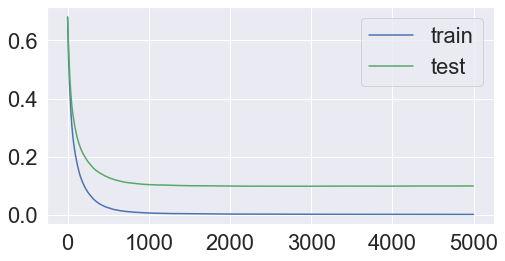

In [280]:
plt.subplots(figsize=(8, 4))
X_SMOTE, y_SMOTE = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0)
# split data into train and test sets
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3)
# define the model
model = XGBClassifier(n_estimators=5000, eta=0.05, subsample=0.5, colsample_bytree=0.5)
# define the datasets to evaluate each iteration
evalset = [(X_SMOTE_train, y_SMOTE_train), (X_SMOTE_test,y_SMOTE_test)]
# fit the model
model.fit(X_SMOTE_train, y_SMOTE_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_SMOTE_test)
score = roc_auc_score(y_SMOTE_test, yhat)
print('Auroc: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Na podstawie otrzymanych danych oraz wykresów, można stwierdzić, że zwiększanie ilości estymatorów poprawia skuteczność modelu. Jednak po przekroczeniu 1000,przyrost jest już niewielki, a możliwy jest też spadek.

# Podsumowanie

## *Najlepszym modelem okazał się XGBOOST. Przy odpowiednich parametrach wartość AUROC mogła osiągnąć nawet 0.976. Dobrymi modelami są także Gradient Boost, Decision Tree oraz Random Forest po dobraniu odpowiednich parametrów. Klasteryzacja nie sprawdziła się w przypadku tego modelu. Użyłem w czasie testów K=-means, ale wyniki były słabe. Klasteryzacja hierarchiczna w przypadku tak dużego zbioru, także nie nadawała się do użycia. Dbscan wykazywał dużo szumów. Zmiana parametrów nie robiła znacznych różnic. Także modelowanie przeprowadziłem na danych bez klasteryzacji. Po przeprowadzeniu PCA, wszystkie wynik się pogorszyły, a najbardziej w przypadku Gradient Boost.*

## *Testowałem też inne metody jak np. SVM. Używałem też Kfold. Nie wszystko pozostawiłem w projekcie, bo i tak wykonywanie, niektórych poleceń trwało bardzo długo*

## Tak więc, cztery modele spełniły założenia projektu: XGBOOST, GRADIENT BOOST, RANDOM FOREST (po ulepszeniu parametrów) ORAZ DECISION TREE